<a href="https://colab.research.google.com/github/Sameersah/rental-recommendation-system/blob/main/CMPE_255_Final_Project_Model_Creation_for_Rental_Recommendation_System_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install Libraries**

In [ ]:
!pip install uv
!uv pip install boto3 --system
!uv pip install hdbscan --system
!uv pip install pycaret --system
!uv pip install sweetviz --system
!uv pip install umap-learn --system

Using Python 3.10.12 environment at: /usr
Audited 1 package in 70ms
Using Python 3.10.12 environment at: /usr
Audited 1 package in 72ms
Using Python 3.10.12 environment at: /usr
Audited 1 package in 91ms
Using Python 3.10.12 environment at: /usr
Audited 1 package in 72ms
Using Python 3.10.12 environment at: /usr
Audited 1 package in 79ms


# **Import Libraries**

In [ ]:
import ipywidgets as widgets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from datetime import datetime
from google.colab import output

output.enable_custom_widget_manager()

# **Download Housing Dataset**

In [ ]:
!rm -rf /content/HouseData_CA_Complete.csv
!gdown --id 1vLVxOZdRUMa9PBzljWE9J-LFPiSOtKft --output /content/HouseData_CA_Complete.csv

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1vLVxOZdRUMa9PBzljWE9J-LFPiSOtKft
From (redirected): https://drive.google.com/uc?id=1vLVxOZdRUMa9PBzljWE9J-LFPiSOtKft&confirm=t&uuid=4f65b38d-85fd-4c08-b88c-7a808867bc9a
To: /content/HouseData_CA_Complete.csv
100% 75.9M/75.9M [00:00<00:00, 266MB/s]


In [ ]:
file_path = '/content/HouseData_CA_Complete.csv'
data = pd.read_csv(file_path)
original_data = data.copy()

# **Exploratory Data Analysis**

**Print first few rows to get a feel of the dataset**

In [ ]:
data.head(5)

property_url  property_id  listing_id  \
0  https://www.realtor.com/rentals/details/55327-...   1804427380  2938212731   
1  https://www.realtor.com/rentals/details/131-Gr...   2453996480  2950818515   
2  https://www.realtor.com/rentals/details/2011-V...   9123013490  2950811324   
3  https://www.realtor.com/rentals/details/Tradan...   9032491360  2950816169   
4  https://www.realtor.com/rentals/details/78341-...   2584873430  2950749756   

    mls     mls_id    status  \
0  TRBO      74707  FOR_RENT   
1  TRBO    1068929  FOR_RENT   
2  AVAL   60601360  FOR_RENT   
3  AVAL   60596209  FOR_RENT   
4  PDCA  219088363  FOR_RENT   

                                                text          style  \
0  Beautiful Lake Views. Fully remodeled Condo in...         CONDOS   
1  Beautiful and spacious, 2-bedroom, 1-bath unit...  SINGLE_FAMILY   
2  Amazing 6 unit Victorian Studio/Junior One All...      APARTMENT   
3  Are you apartment shopping? Move to San Jose a...         CONDOS   
4  Fantastic opportunity to lease a contractors y...  SINGLE_FAMILY   

                      full_street_line            street  ... builder_id  \
0                     55327 Tanglewood  55327 Tanglewood  ...        NaN   
1               131 Granada Ave Unit A   131 Granada Ave  ...        NaN   
2                2011 Vallejo St Apt 3   2011 Vallejo St  ...        NaN   
3  North San Jose 1 Bedroom Unit Large               NaN  ...        NaN   
4                       78341 Darby Rd    78341 Darby Rd  ...        NaN   

  builder_name  office_id  office_mls_set                office_name  \
0          NaN        NaN             NaN                        NaN   
1          NaN        NaN             NaN                        NaN   
2          NaN        NaN             NaN                        NaN   
3          NaN        NaN             NaN                        NaN   
4          NaN  3006629.0   O-PDCA-OD8295  Desert Pacific Properties   

       office_email                                      office_phones  \
0               NaN                                                NaN   
1               NaN                                                NaN   
2               NaN                                                NaN   
3               NaN                                                NaN   
4  paula@dppllc.com  [{'number': '7603608200', 'type': 'Office', 'p...   

                                      nearby_schools  \
0  Desert Sands Unified School District, Riversid...   
1                 Long Beach Unified School District   
2              San Francisco Unified School District   
3  Berryessa Union Elementary School District, Ea...   
4               Desert Sands Unified School District   

                                       primary_photo  \
0  http://ap.rdcpix.com/561df7d971c5c51b45d54645a...   
1  http://ap.rdcpix.com/99985c2425d966206e884303d...   
2  http://ap.rdcpix.com/8dc21d33e81fa4358201e62e4...   
3  http://ap.rdcpix.com/bbd9eb2ffbac762386e9b9057...   
4  http://ap.rdcpix.com/73a65472c9c0963d628352ac5...   

                                          alt_photos  
0  http://ap.rdcpix.com/561df7d971c5c51b45d54645a...  
1  http://ap.rdcpix.com/99985c2425d966206e884303d...  
2  http://ap.rdcpix.com/8dc21d33e81fa4358201e62e4...  
3  http://ap.rdcpix.com/bbd9eb2ffbac762386e9b9057...  
4  http://ap.rdcpix.com/73a65472c9c0963d628352ac5...  

[5 rows x 57 columns]

**Print the shape: (number of rows, number of columns)**

In [ ]:
data.shape

(22418, 57)

**Print the data info, i.e. number of non-null values in each column, and data type of each column**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22418 entries, 0 to 22417
Data columns (total 57 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   property_url      22418 non-null  object 
 1   property_id       22418 non-null  int64  
 2   listing_id        22418 non-null  int64  
 3   mls               22418 non-null  object 
 4   mls_id            22418 non-null  object 
 5   status            22418 non-null  object 
 6   text              17715 non-null  object 
 7   style             22418 non-null  object 
 8   full_street_line  22330 non-null  object 
 9   street            22298 non-null  object 
 10  unit              5213 non-null   object 
 11  city              22416 non-null  object 
 12  state             22418 non-null  object 
 13  zip_code          22415 non-null  float64
 14  beds              12519 non-null  float64
 15  full_baths        12373 non-null  float64
 16  half_baths        2927 non-null   float6

**Print percentage of missing rows in each column**

In [ ]:
missing_percentage = (data.isnull().sum() / len(data)) * 100
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)
print("Missing Value Percentages:")
print(missing_percentage_sorted[missing_percentage_sorted > 0])

Missing Value Percentages:
builder_name        100.000000
builder_id          100.000000
half_baths           86.943528
agent_nrds_id        83.700598
broker_id            81.126773
broker_name          77.981979
unit                 76.746365
parking_garage       74.386654
hoa_fee              74.208226
office_id            72.985993
office_email         68.801856
lot_sqft             65.518780
agent_id             64.849674
stories              60.759211
agent_phones         60.580783
agent_email          60.161477
office_phones        60.023196
agent_name           58.662682
agent_mls_set        58.662682
office_mls_set       58.403961
office_name          58.377197
list_price_max       56.307432
list_price_min       56.124543
year_built           54.193059
estimated_value      48.635025
sold_price           48.215720
price_per_sqft       48.211259
last_sold_date       48.206798
sqft                 48.188955
full_baths           44.807744
beds                 44.156481
list_price  

**Statistics summary for the numerical columns only**

In [ ]:
data.describe()

property_id    listing_id      zip_code          beds    full_baths  \
count  2.241800e+04  2.241800e+04  22415.000000  12519.000000  12373.000000   
mean   4.582752e+09  2.966707e+09  92256.836047      2.619458      2.118080   
std    3.614688e+09  6.055738e+07   1809.072218      1.876246      1.551271   
min    1.000095e+09  5.363770e+08  22760.000000      0.000000      1.000000   
25%    1.715225e+09  2.966594e+09  90602.000000      2.000000      1.000000   
50%    2.529863e+09  2.969256e+09  92118.000000      2.000000      2.000000   
75%    9.278299e+09  2.974001e+09  93514.000000      3.000000      3.000000   
max    9.999877e+09  2.975395e+09  99999.000000    120.000000     61.000000   

        half_baths          sqft    year_built   days_on_mls    list_price  \
count  2927.000000  11615.000000  10269.000000  22418.000000  1.253000e+04   
mean      1.063205   1821.406199   1983.196709    179.310688  8.646176e+03   
std       0.331378   1989.945552     28.672340    175.620012  8.951079e+04   
min       1.000000    100.000000   1880.000000     11.000000  1.990000e+02   
25%       1.000000    934.000000   1964.000000     43.000000  2.700000e+03   
50%       1.000000   1400.000000   1986.000000    146.000000  3.950000e+03   
75%       1.000000   2142.500000   2006.000000    233.000000  6.500000e+03   
max       7.000000  78352.000000   2027.000000    730.000000  7.000000e+06   

       ...     fips_code      stories      hoa_fee  parking_garage  \
count  ...  21908.000000  8797.000000  5782.000000     5742.000000   
mean   ...   6053.130181     2.011595    47.415254        2.015848   
std    ...    177.064770     3.209539   210.781751        2.536326   
min    ...   6001.000000     1.000000     0.000000        1.000000   
25%    ...   6037.000000     1.000000     0.000000        2.000000   
50%    ...   6053.000000     2.000000     0.000000        2.000000   
75%    ...   6073.000000     2.000000     0.000000        2.000000   
max    ...  32023.000000    61.000000  5595.000000      175.000000   

           agent_id  agent_nrds_id     broker_id  builder_id  builder_name  \
count  7.880000e+03   3.654000e+03  4.231000e+03         0.0           0.0   
mean   9.226856e+06   1.895764e+08  5.009337e+06         NaN           NaN   
std    2.555501e+07   4.827094e+07  1.489155e+07         NaN           NaN   
min    9.400000e+02   1.765258e+07  7.110170e+05         NaN           NaN   
25%    1.088335e+06   1.725072e+08  1.620829e+06         NaN           NaN   
50%    1.978684e+06   1.870078e+08  2.983660e+06         NaN           NaN   
75%    3.337386e+06   2.055008e+08  4.048692e+06         NaN           NaN   
max    1.005874e+08   8.690620e+08  1.005861e+08         NaN           NaN   

          office_id  
count  6.056000e+03  
mean   5.685397e+06  
std    1.816057e+07  
min    1.378000e+03  
25%    8.522970e+05  
50%    2.864800e+06  
75%    3.374161e+06  
max    1.005861e+08  

[8 rows x 29 columns]

# **Some insights that were gathered from inital overview of data**
### **Data Completeness**:
Several columns have missing values, such as:
1.   beds (61.2% filled)
2.   full_baths (60.5% filled)
3.   sqft (57.0% filled)
4.   list_price (61.3% filled)
5.   stories (43.0% filled)
6.   hoa_fee, parking_garage have less than 30% data filled.
7.   Columns like builder_id and builder_name have negligible data (14 entries)

### **What we can do in data cleaning after the data overview**:


1.   Convert numerical columns stored as strings (list_price, sold_price, sqft, etc.) to appropriate data types.
2.   Categorical data like style, city, county, neighborhoods can be analyzed for trends or distributions ( done below )
3.   Several columns, such as URLs and IDs (property_url, property_id, listing_id), are likely irrelevant for analysis or modeling.
4.   Columns like builder_id and builder_name have nearly 100% missing
5.   Half baths, agent_nrds_id, and broker_id are also largely incomplete (>80% missing) and we can think about their removal
2.   price_per_sqft appears to have extreme values (maximum $4,559/sq. ft.) so we need to remove the outliers for this column. Beds (maximum 120), baths (maximum 212), and sq. ft. (up to 78,352) are also extreme outliers for the respective columns. These outlier data and can thus be removed or handled


### **Key Descriptive Metrics:**

The average property has:

1.   2.6 beds, 2.2 full baths, and 1.1 half baths.
2.   1,883 sq. ft., with lot sizes varying significantly (mean ~1.66 million sq. ft.).
3.   The average list price is $$8,929, but prices range widely (minimum $7, maximum $5.2M).
4.   Days on MLS (Multiple Listing Service): Average is ~217 days

# **EDA Visualizations**

# **Why these specific visualizations were chosen and what each represents**:

1.  Pairplots and scatterplots help reveal nonlinear trends or outliers.
2.   Boxplots plots highlight variations in prices or sqft across different categories.
3.   Geographical scatterplots uncover spatial trends in property prices.
2.   Time-series analysis identifies trends in the real estate market over time.







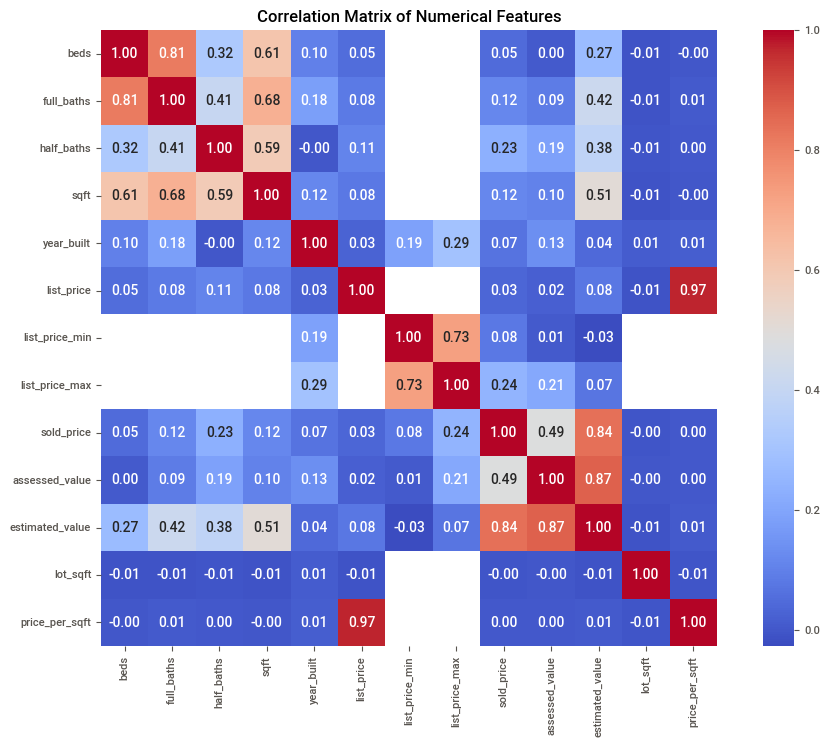

In [ ]:
numeric_columns = ['beds', 'full_baths', 'half_baths', 'sqft', 'year_built',
                   'list_price', 'list_price_min', 'list_price_max', 'sold_price',
                   'assessed_value', 'estimated_value', 'lot_sqft', 'price_per_sqft']

plt.figure(figsize=(12, 8))
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# **Conclusion drawn from Boxplot of price_per_sqft by status**
1) Since beds has weak correlation with list_price, it suggests that features like bathrooms or location might influence pricing more.
2) Negative correlations, such as between year_built and assessed_value, might indicate depreciation over time.

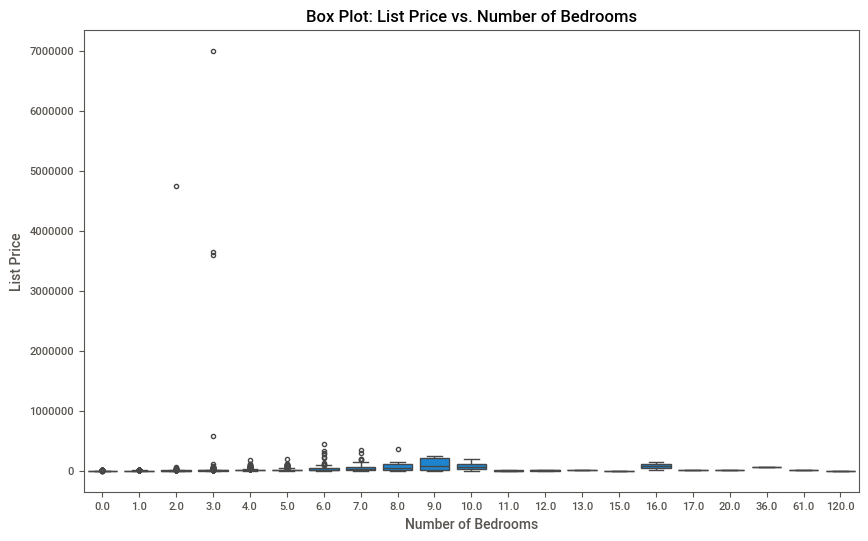

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='beds', y='list_price', data=data)
plt.title("Box Plot: List Price vs. Number of Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("List Price")
plt.show()

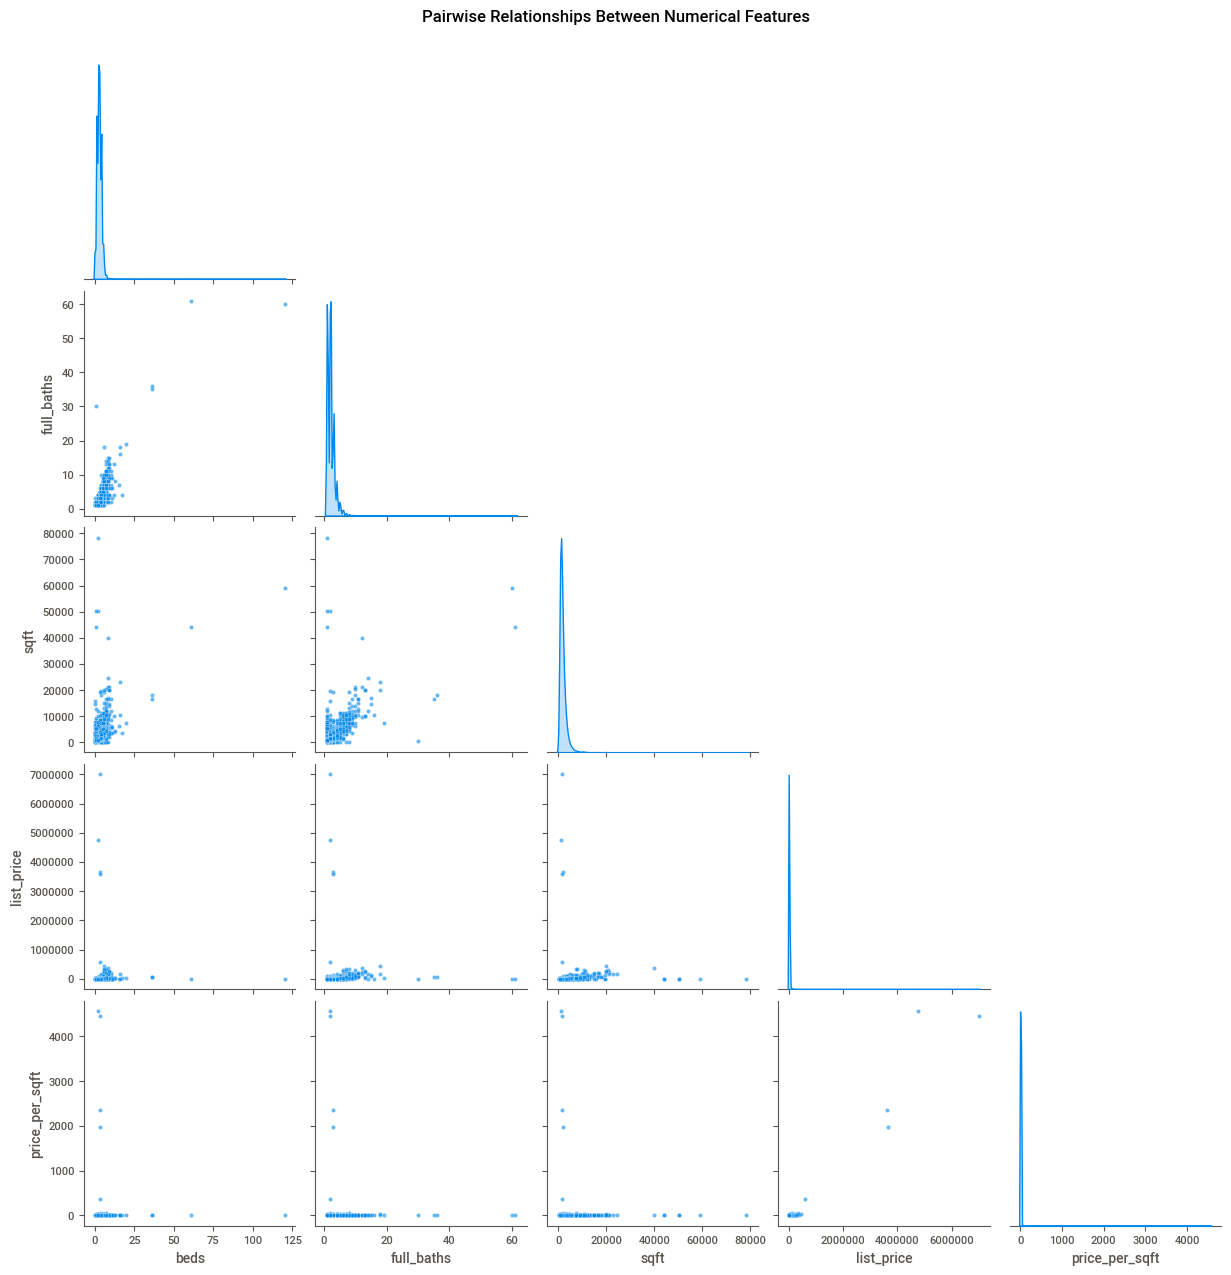

In [ ]:
subset = ['beds', 'full_baths', 'sqft', 'list_price', 'price_per_sqft']

sns.pairplot(data[subset], diag_kind='kde', corner=True, plot_kws={'alpha': 0.6})
plt.suptitle("Pairwise Relationships Between Numerical Features", y=1.02)
plt.show()

# **Conclusions drawn from the pairplot**
1) Since sqft vs. list_price forms a positive trend, larger properties generally command higher prices.
2) beds and sqft could show clusters where small homes have 2-3 bedrooms, while larger homes trend toward more bedrooms.
3) Outliers, like extremely expensive properties with low sqft, might indicate luxury or misreported data.
4) A scatter with no clear trend, e.g., price_per_sqft vs. beds, may suggest other factors (like location) significantly influence price per square foot

<ipython-input-251-04aff4f3f998>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




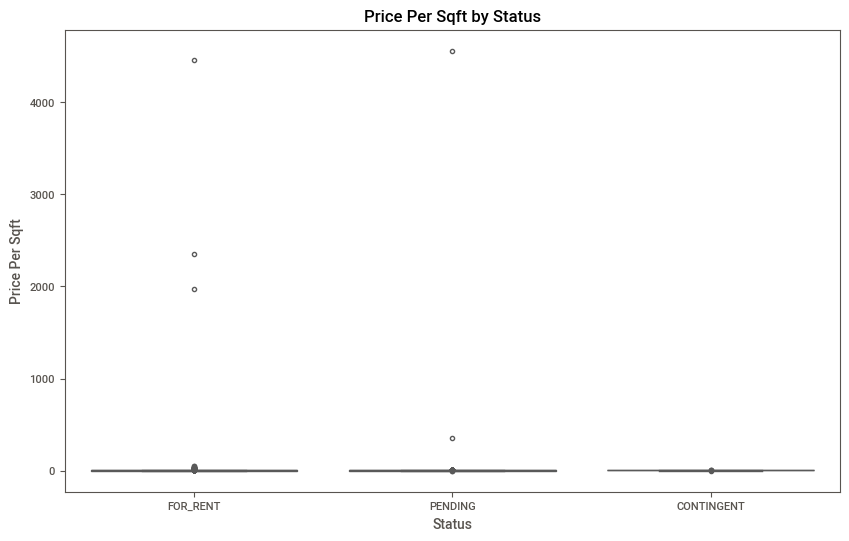

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='price_per_sqft', data=data, palette='Set2')
plt.title("Price Per Sqft by Status")
plt.xlabel("Status")
plt.ylabel("Price Per Sqft")
plt.show()

# **Conclusion drawn from Boxplot of price_per_sqft by status**
1) Higher price_per_sqft for sold properties could indicate premium homes get sold quickly, while lower-priced ones remain active.
2) Since active properties have a wide range of price_per_sqft, it shows the current market offers diverse options.

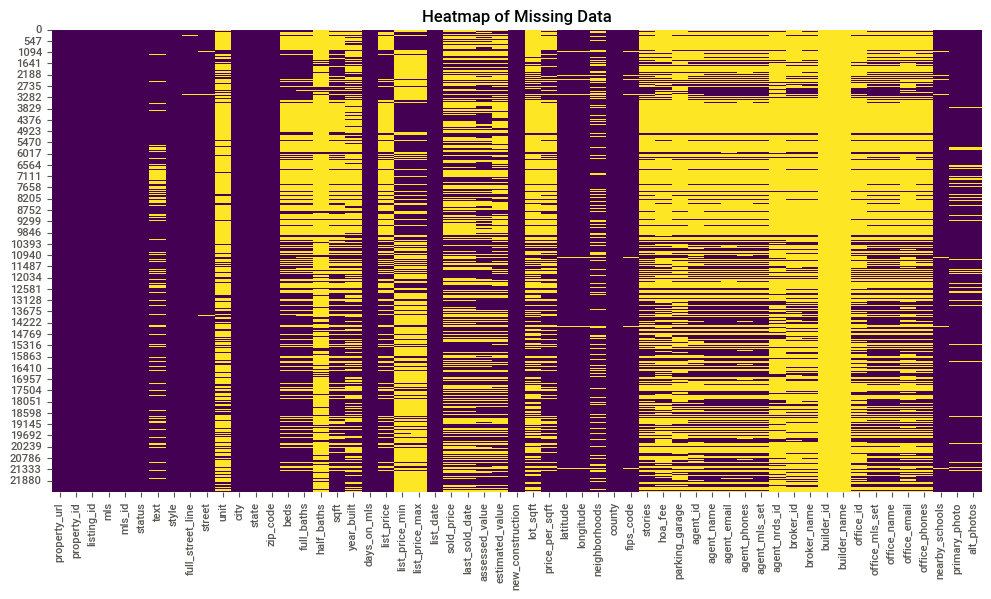

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Data")
plt.show()

# **Conclusions drawn from Missing data Heatmap**
1) Clusters of missing values in beds and sqft alongside list_price could indicate that incomplete property records were entered into the system.
2) The hoa_fee is missing predominantly for certain city entries, it  indicates regions without Homeowners' Associations ( needs to be analysed further though)

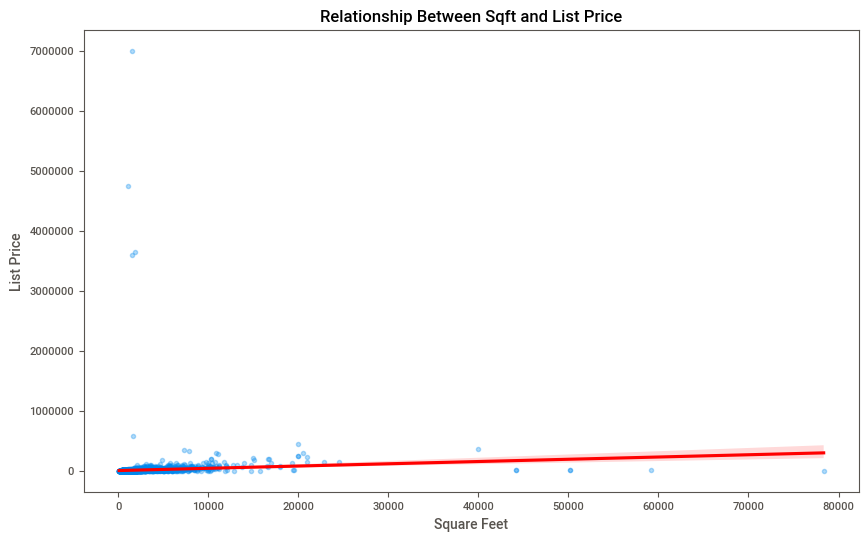

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='sqft', y='list_price', data=data, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title("Relationship Between Sqft and List Price")
plt.xlabel("Square Feet")
plt.ylabel("List Price")
plt.show()

# **Conclusion from Scatter plot for relation between sqft and list price**
1) A linear trend (positive slope) confirms that the larger homes cost more, but deviations (like expensive small homes) may represent luxury properties.
2) A steep slope indicates that small increases in sqft correspond to significant price hikes, while a shallow slope suggests sqft is less influential on price and thus we may need to include other factors as well

# Top 10 cities with the highest number of listings




<ipython-input-254-f9cef25c3447>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




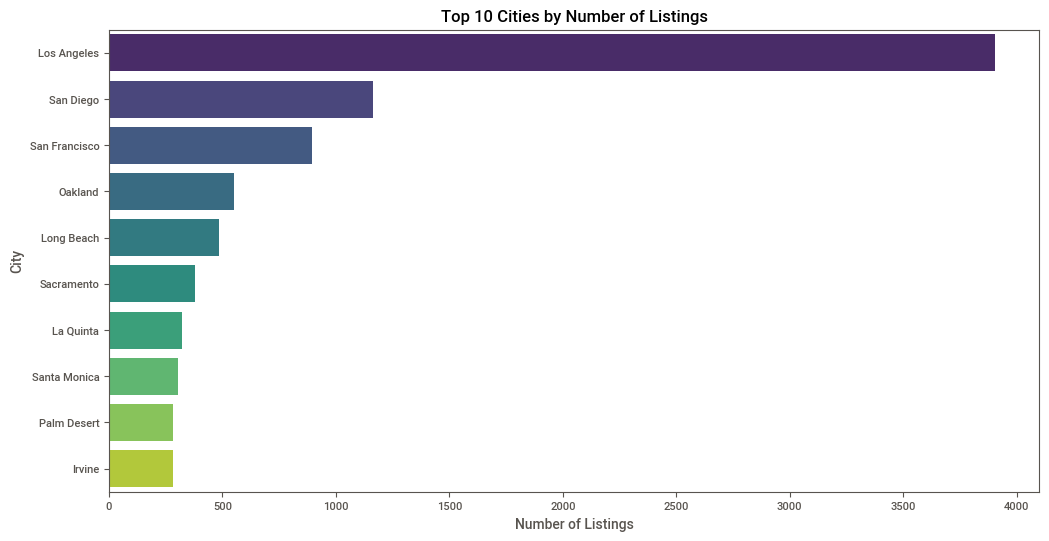

In [ ]:
plt.figure(figsize=(12, 6))
top_cities = data['city'].value_counts().head(10)
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.title("Top 10 Cities by Number of Listings")
plt.xlabel("Number of Listings")
plt.ylabel("City")
plt.show()

# **Conclusion from Count plot of categorical features**
1) Cities with the most listings might indicate real estate hotspots. The most prominent of these cities are San francisco and los angeles.
2) If smaller cities appear among the top 10, it suggests emerging markets.
3) Disproportionate representation in a single city might skew overall trends in the dataset.

# Catplot: Price per Sqft by Style


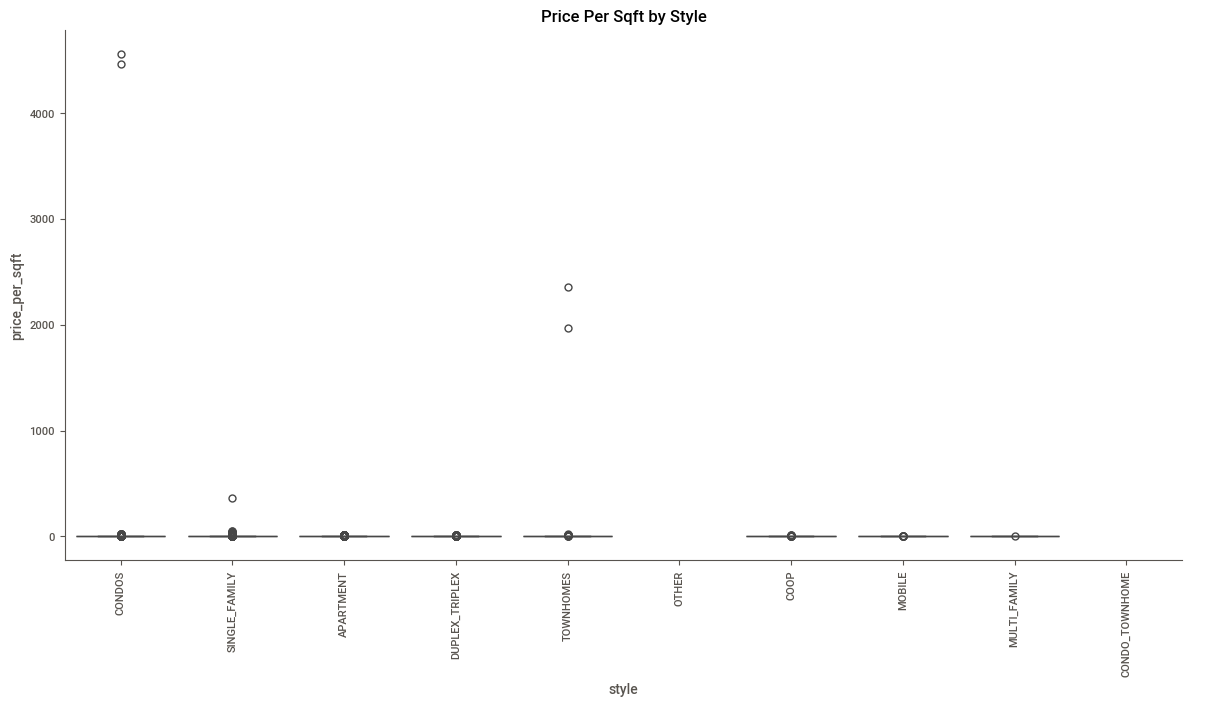

In [ ]:
sns.catplot(data=data, x='style', y='price_per_sqft', kind='box', height=6, aspect=2)
plt.xticks(rotation=90)
plt.title("Price Per Sqft by Style")
plt.show()

# **Conclusion from Correlation Between Categorical and Numerical Features**
1) Higher price_per_sqft for condos or townhouses in urban areas could reflect premium pricing for city locations.
2) The detached homes have lower variance in price_per_sqft, it indicates consistency in suburban markets.
Styles with high variance suggest diverse locations or quality within the same style category.


# Distribution of list_price

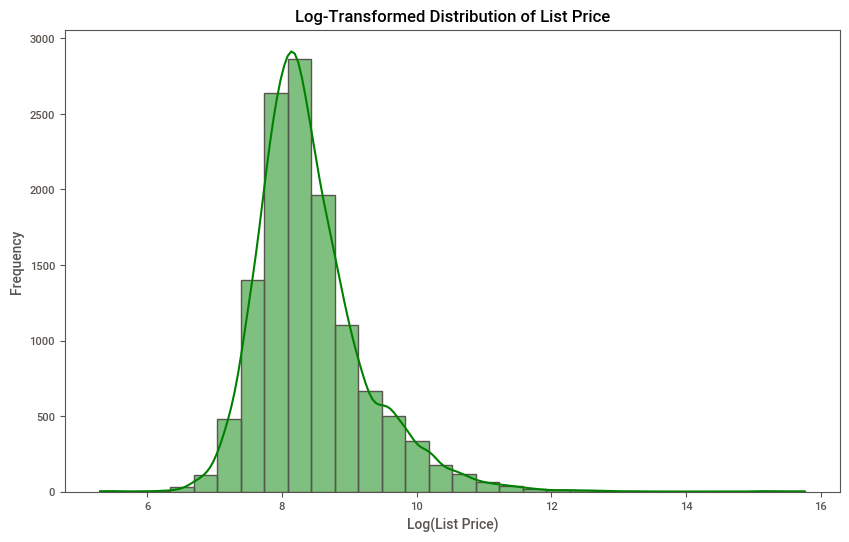

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(data['list_price'].dropna()), kde=True, color='green', bins=30)
plt.title("Log-Transformed Distribution of List Price")
plt.xlabel("Log(List Price)")
plt.ylabel("Frequency")
plt.show()

# **Conclusion from Log Scale for skewed features**
1) A heavy tail in the untransformed distribution indicates luxury properties inflating the mean.
2) Log-transformation reveals whether the majority of properties cluster around a specific price range (e.g., $300,000 to $600,000).

# Geographical Analysis with Lat/Lon (if available)


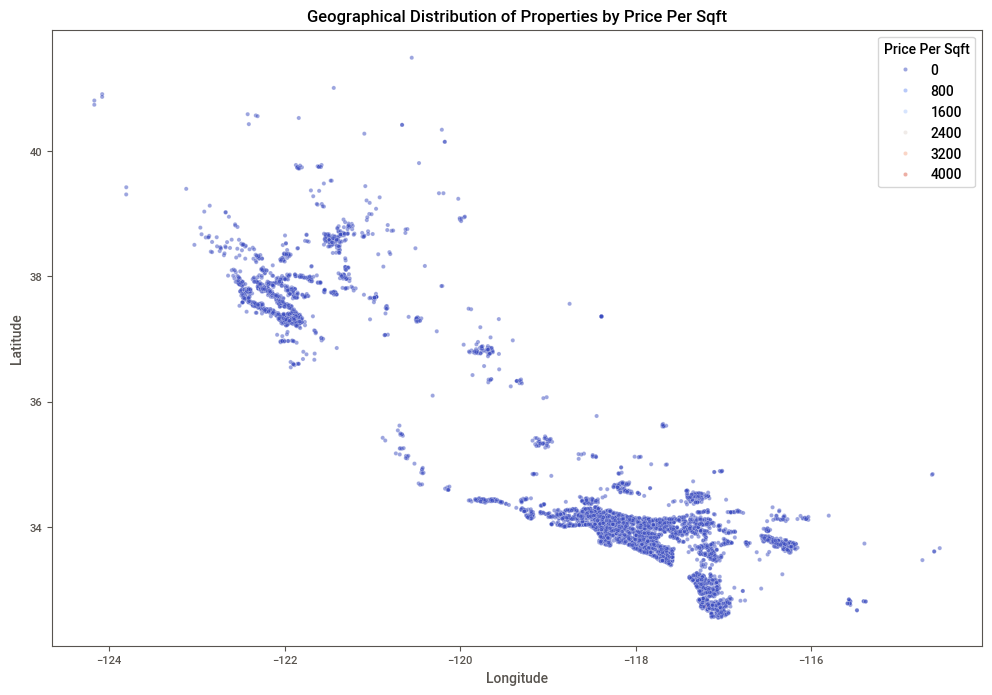

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='price_per_sqft', data=data, palette='coolwarm', alpha=0.5)
plt.title("Geographical Distribution of Properties by Price Per Sqft")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Price Per Sqft")
plt.show()

# **Conclusion from Geographical scatter plot**
1) Clusters of high price_per_sqft in urban centers (e.g., downtown San Francisco) show premium pricing for location.
2) Sparse high-priced properties in remote areas might represent luxury vacation homes.
3) Regions with uniformly low price_per_sqft indicate affordability or low demand.

# Time series data analysis

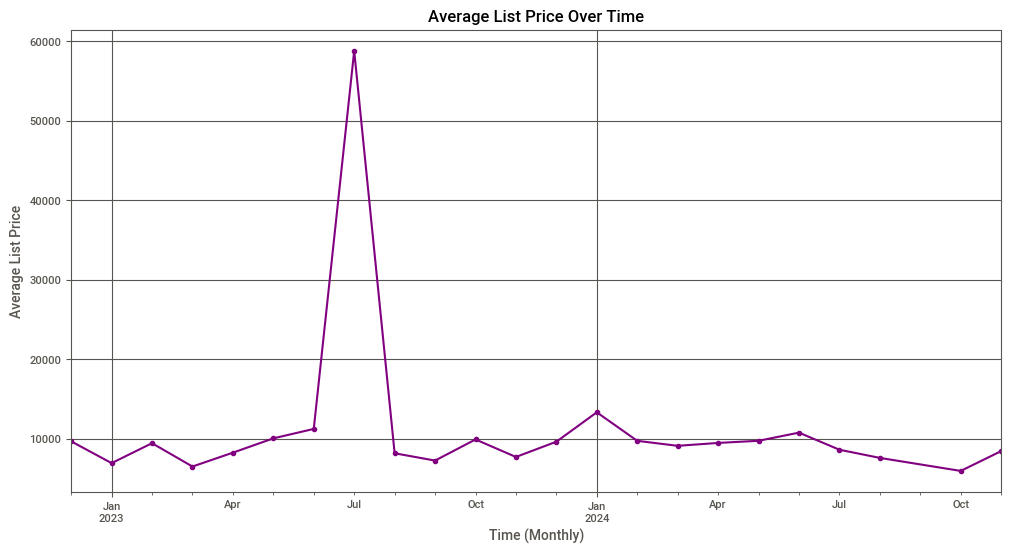

In [ ]:
data['list_date'] = pd.to_datetime(data['list_date'], errors='coerce')

time_trend = data.groupby(data['list_date'].dt.to_period('M'))['list_price'].mean()
time_trend.plot(figsize=(12, 6), marker='o', color='purple')
plt.title("Average List Price Over Time")
plt.xlabel("Time (Monthly)")
plt.ylabel("Average List Price")
plt.grid()
plt.show()

# **Conclusions from Time-series analysis**
1) A steady increase in list_price over time indicates a rising market or inflation.
2) Seasonal fluctuations (e.g., lower prices in winter) reveal typical real estate cycles.
3) Sharp dips or spikes might align with external factors like economic changes or regulatory impacts.

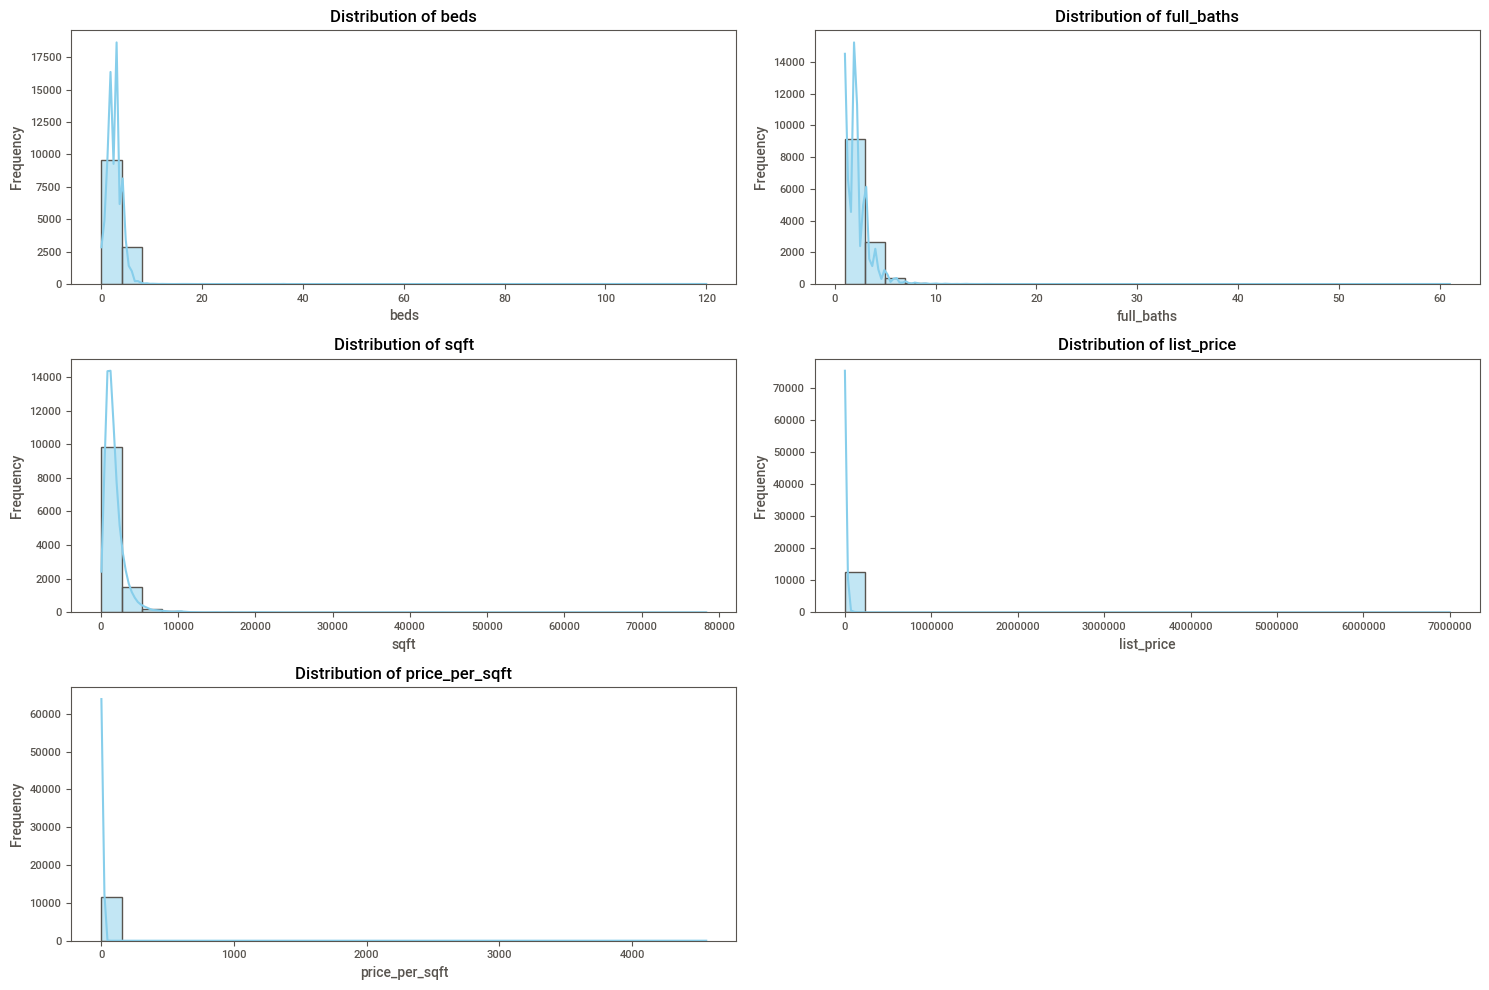

In [ ]:
numerical_subset = ['beds', 'full_baths', 'sqft', 'list_price', 'price_per_sqft']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_subset, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<ipython-input-260-39b2e089b571>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




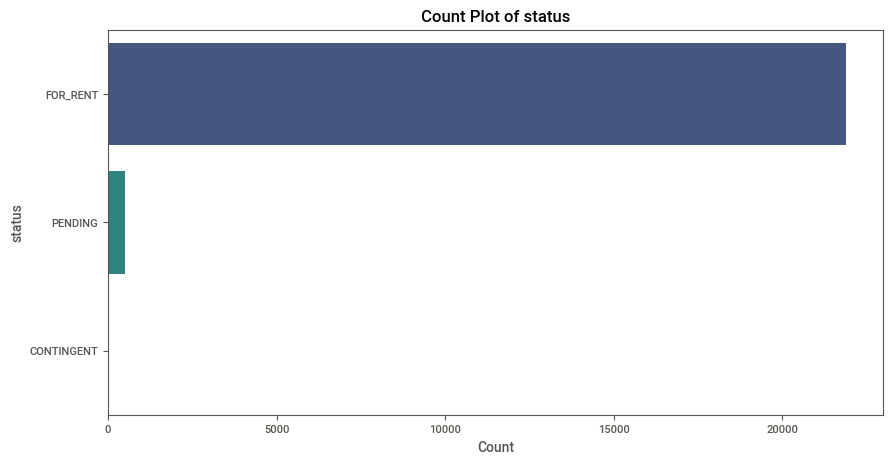

<ipython-input-260-39b2e089b571>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




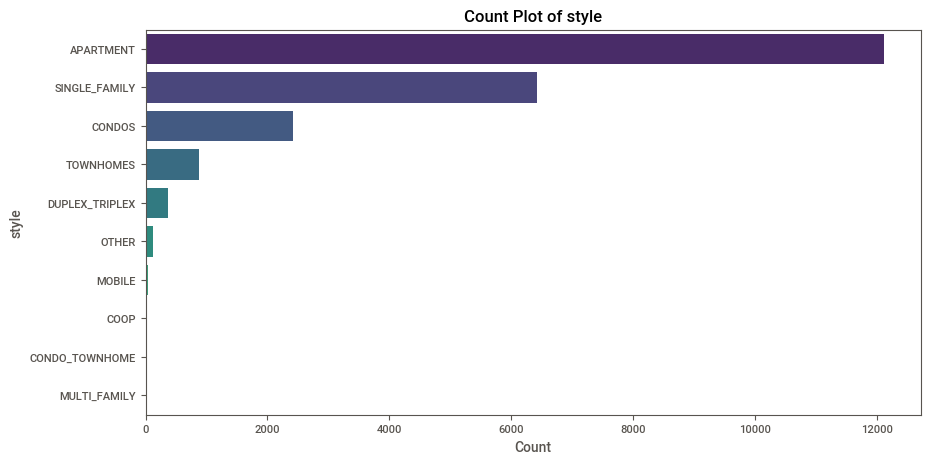

<ipython-input-260-39b2e089b571>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




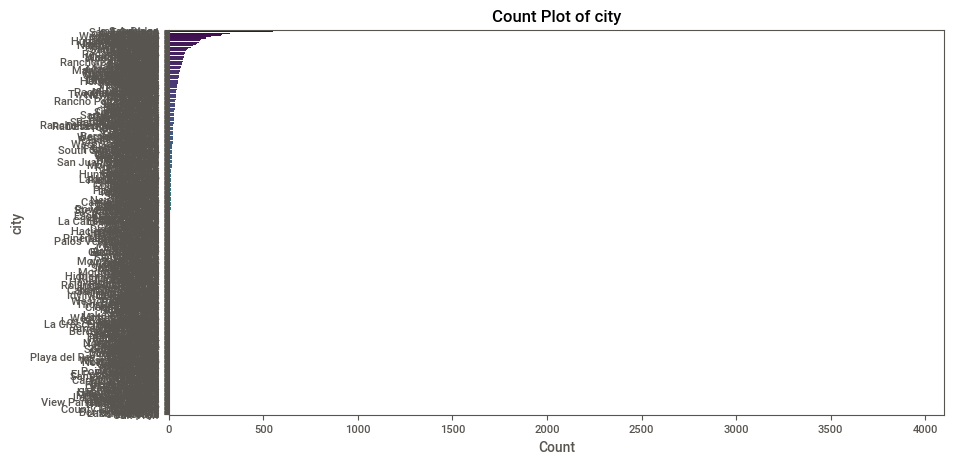

<ipython-input-260-39b2e089b571>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




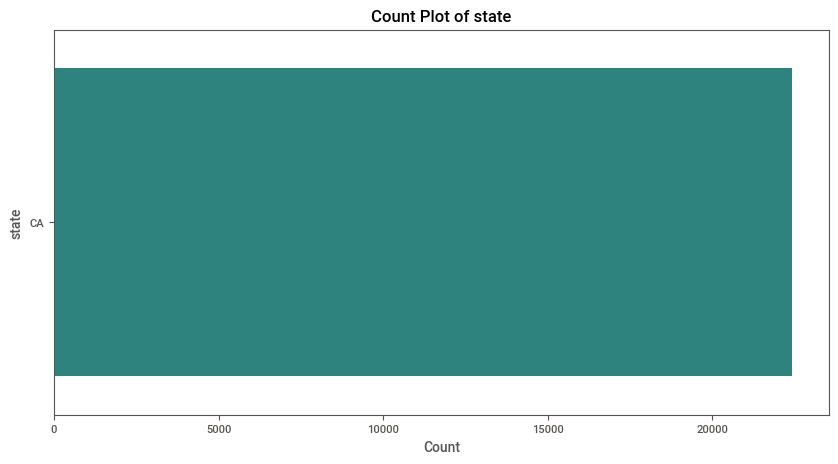

In [ ]:
categorical_subset = ['status', 'style', 'city', 'state']

for col in categorical_subset:
    if col in data.columns:
        plt.figure(figsize=(10, 5))
        sns.countplot(y=data[col], order=data[col].value_counts().index, palette='viridis')
        plt.title(f'Count Plot of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.show()

# Some Insights gathered that may or may not be used for data preprocessing

**( this list is definitely not comprehensive)**



### 1. beds, full_baths, half_baths (Bedrooms and Bathrooms)
*)	Values like beds > 10 or full_baths > 15 are likely unrealistic for residential properties and we can remove such rows
*)	half_baths might have missing values for properties without them (these could be set to 0).

________________________________________
### 2. year_built
*) Some extreme values (year_built < 1800 or year_built > current_year) are likely invalid and can be removed
*)	Missing year_built might indicate unrecorded or old properties. A placeholder like 9999 for unrecorded construction years.
________________________________________
### 3. latitude and longitude
*)	Outliers (coordinates outside the US) may indicate entry errors.Hence we can remove rows with invalid coordinates (latitude > 90, longitude < -180) and use imputation for missing values
________________________________________
### 4. lot_sqft (Lot Size)
*) Outliers (lot_sqft > 1,000,000) might represent agricultural or commercial land. Remove rows with lot_sqft > 1,000,000 unless analyzing specific land types.
________________________________________

### 5. list_date
Missing list_date hinders time-series analysis. And remove an future values using list_date > current_date.
________________________________________

### Columns that can be Merged to to be made into 1 column


•	total_baths (from full_baths and half_baths)
•	price_difference (from list_price and sold_price)
•	location (from latitude and longitude)




                                             |          | [  0%]   00:00 -> (? left)


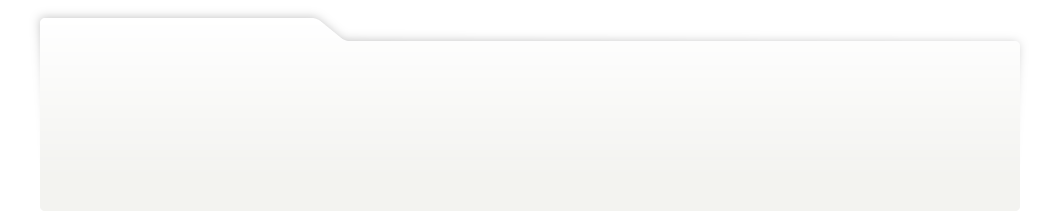
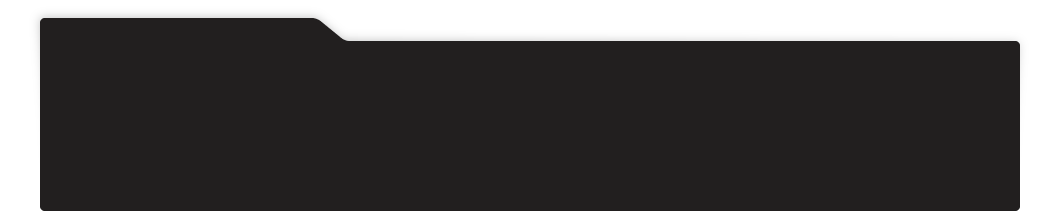
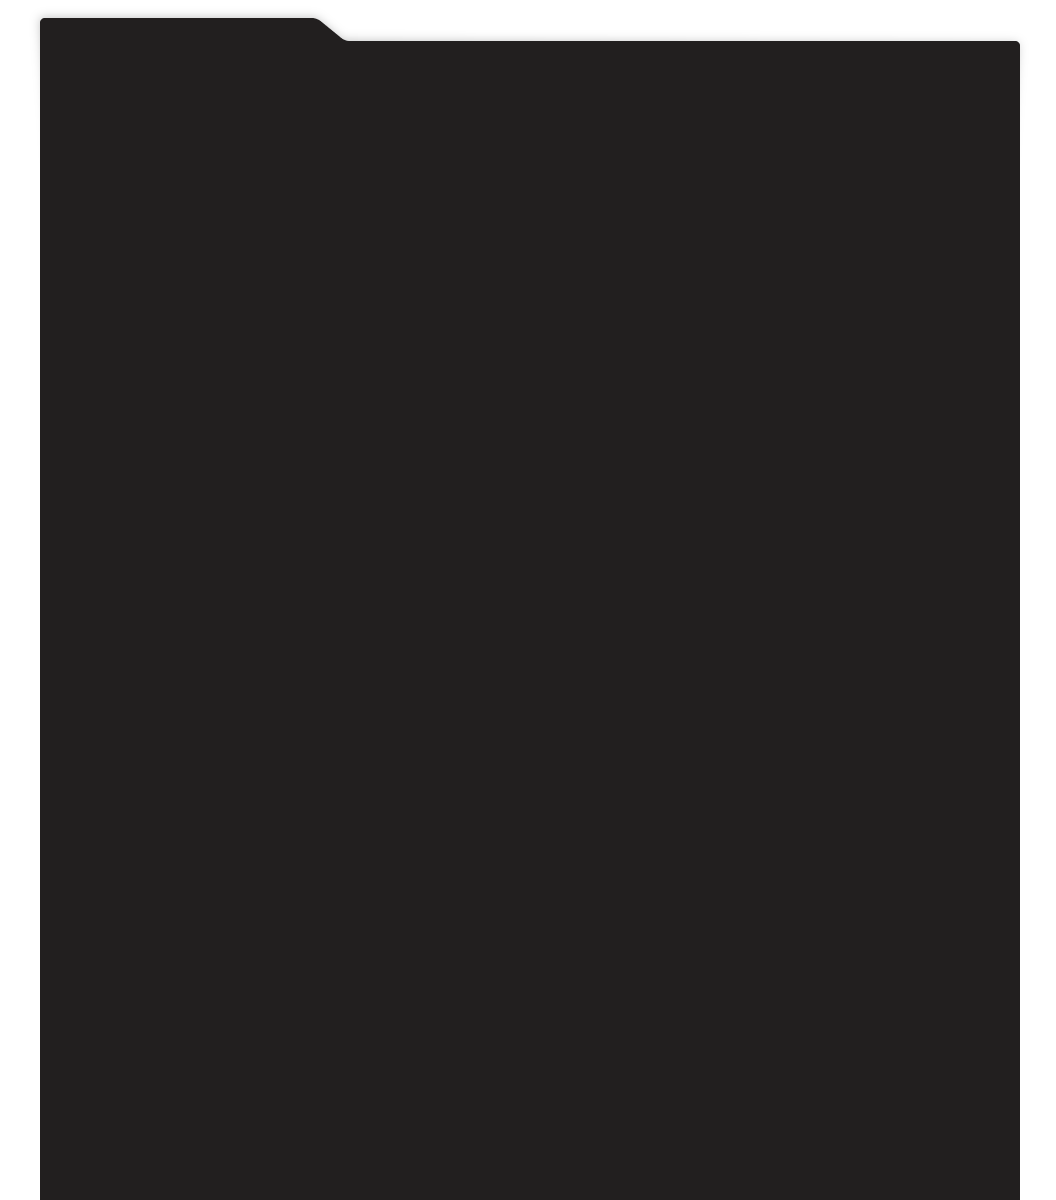
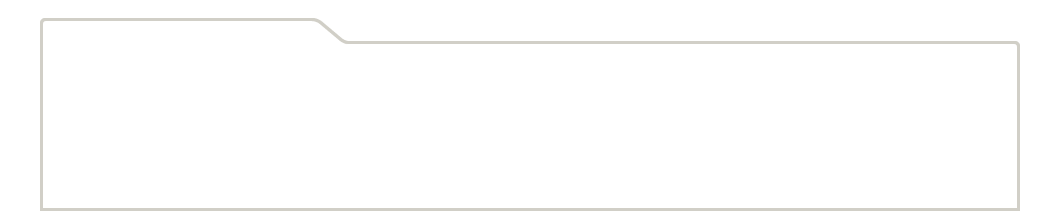
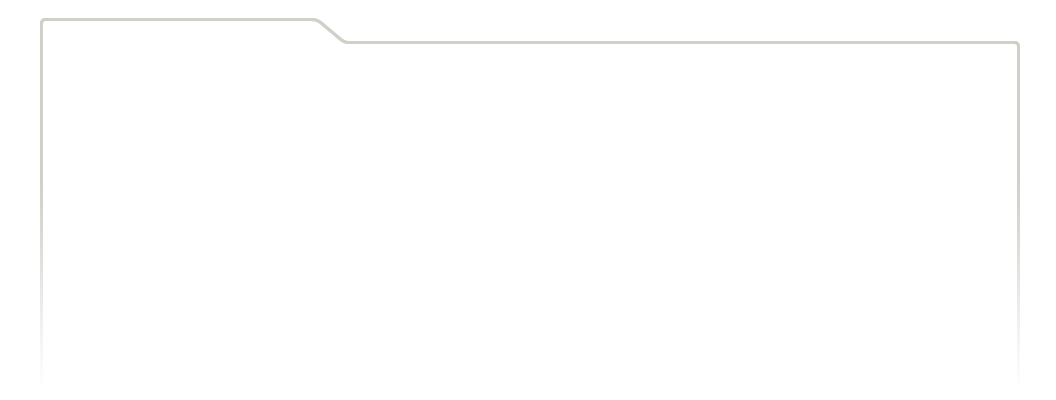
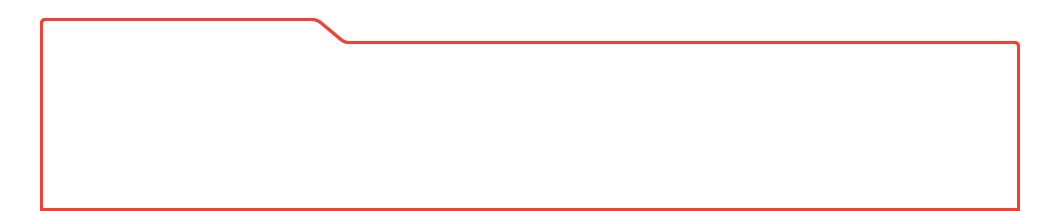
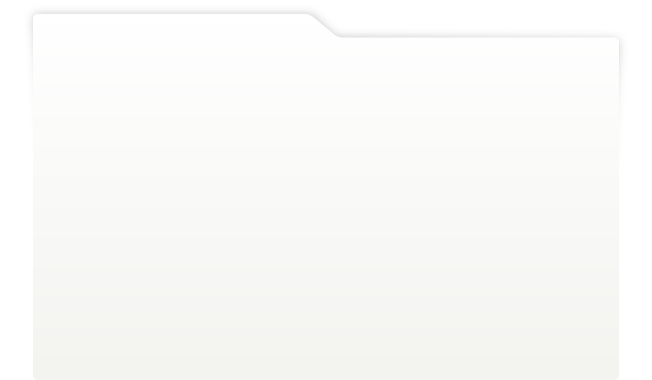
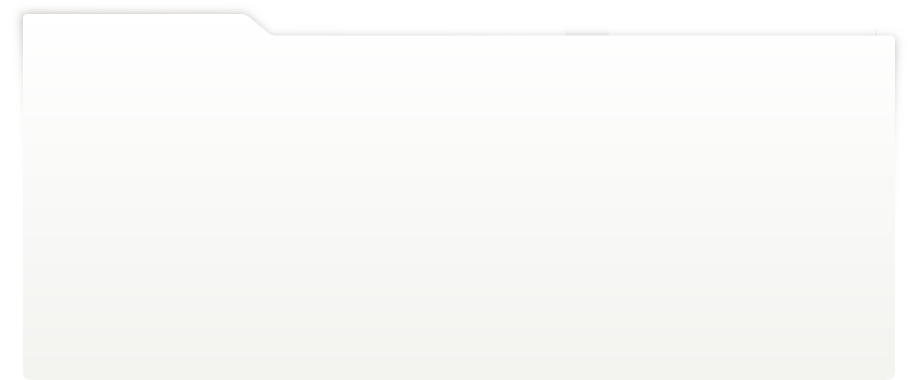
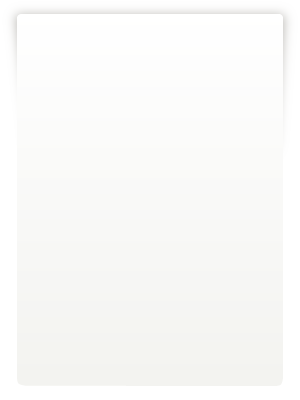
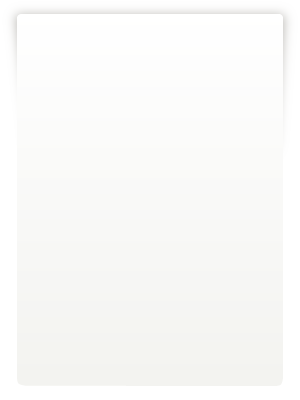
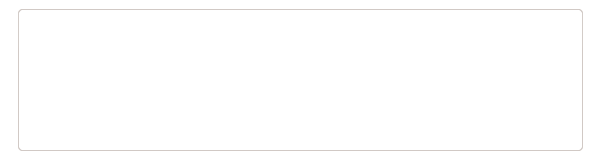
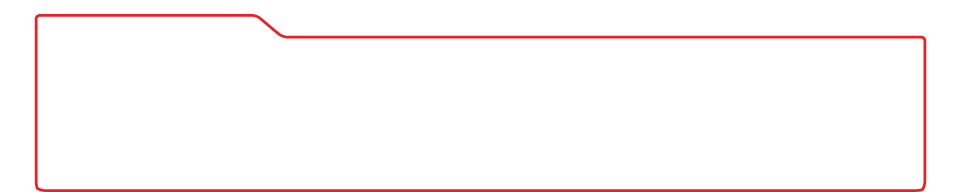
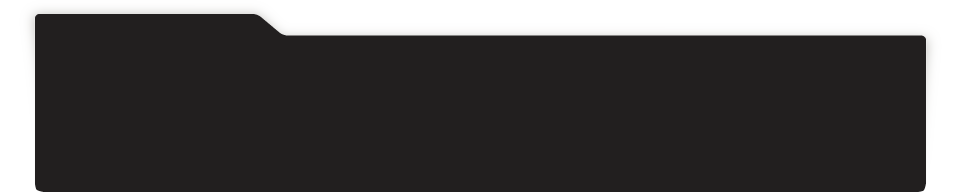
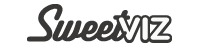
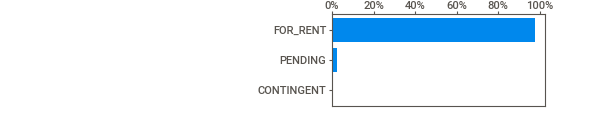
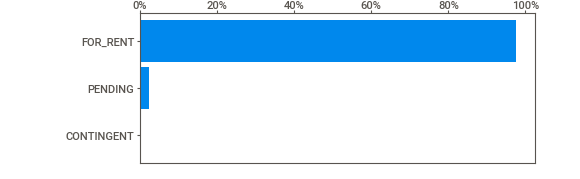
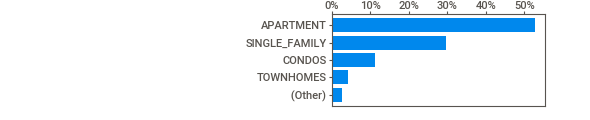
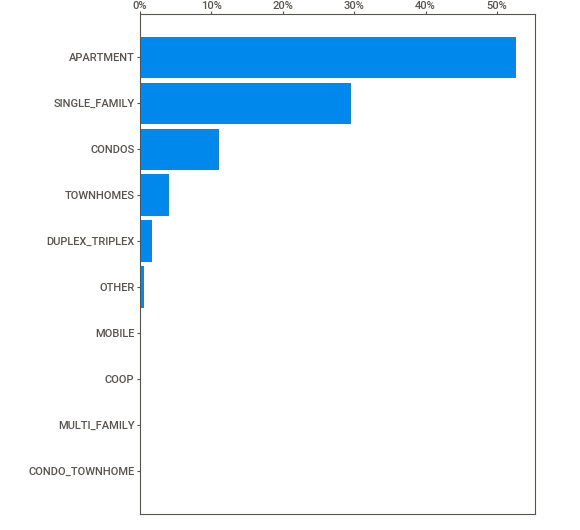
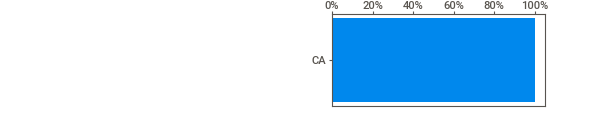
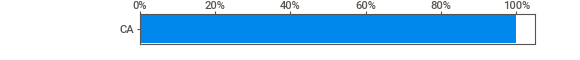
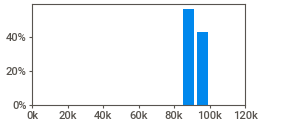
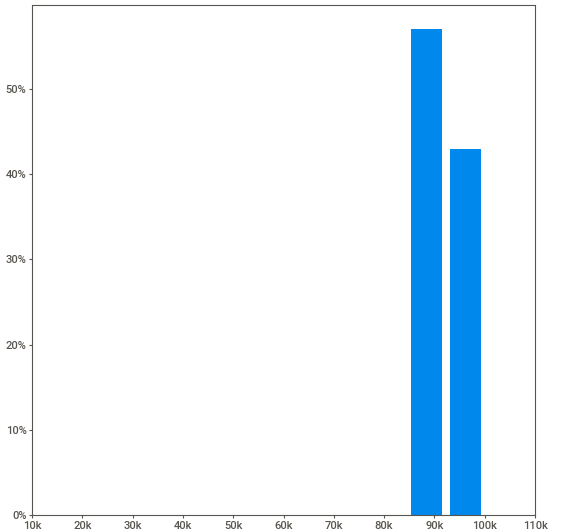
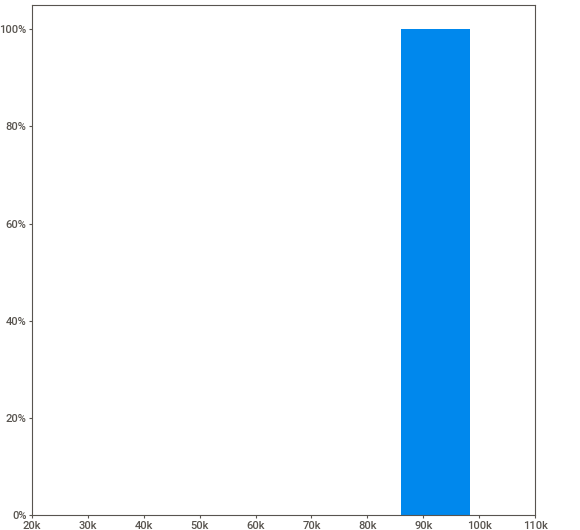
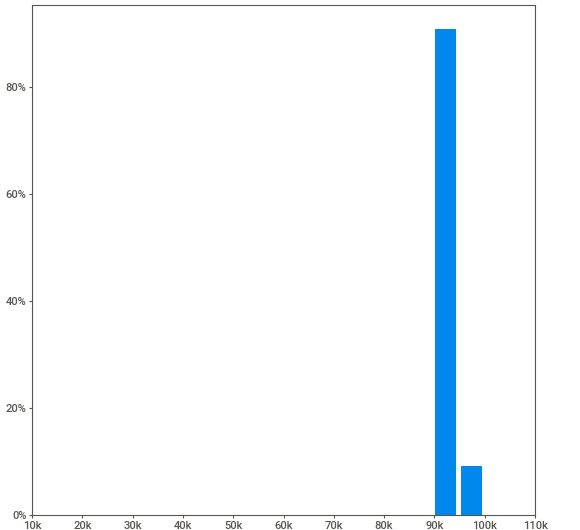
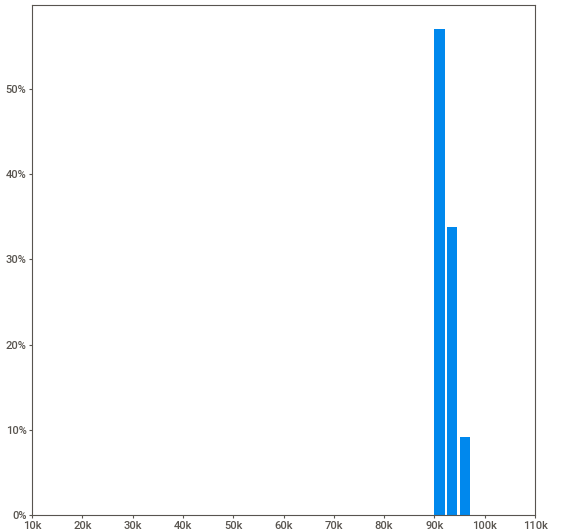
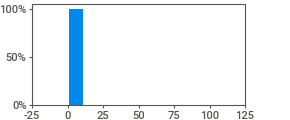
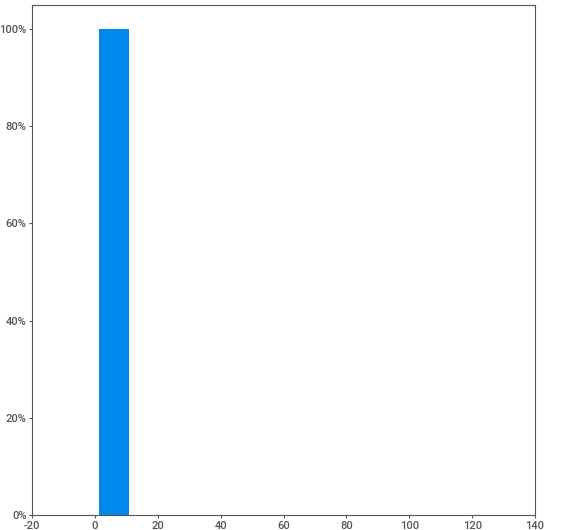
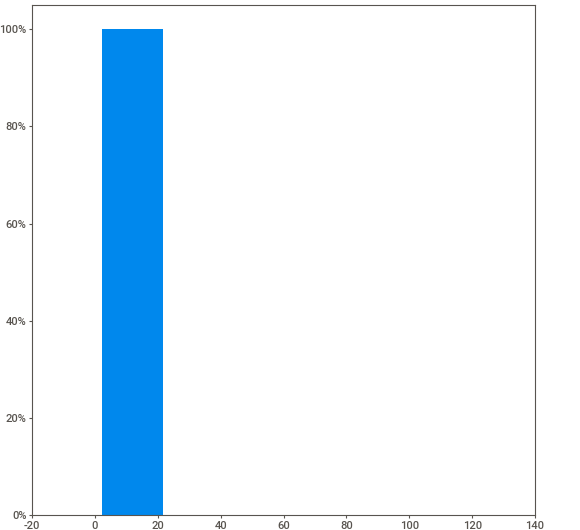
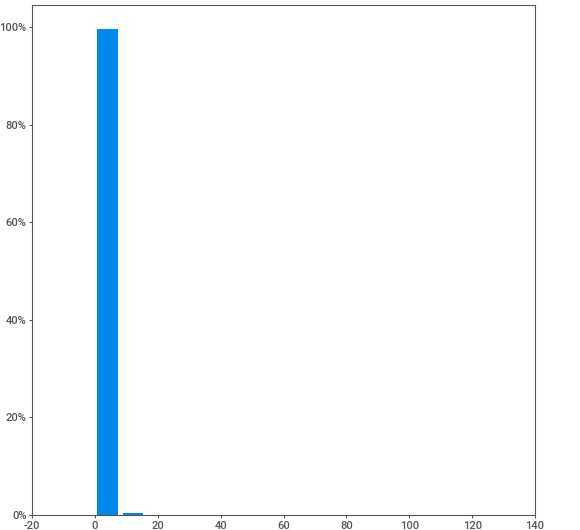
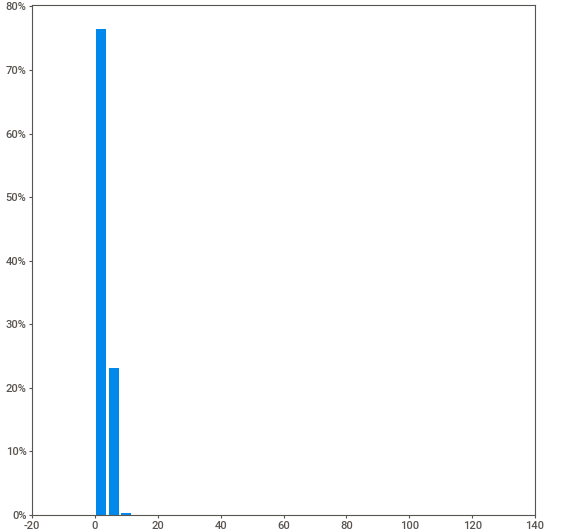
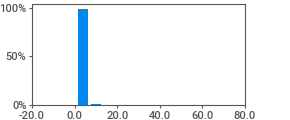
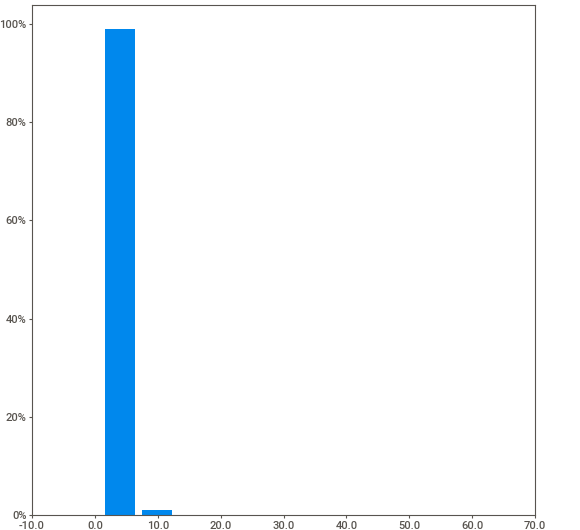
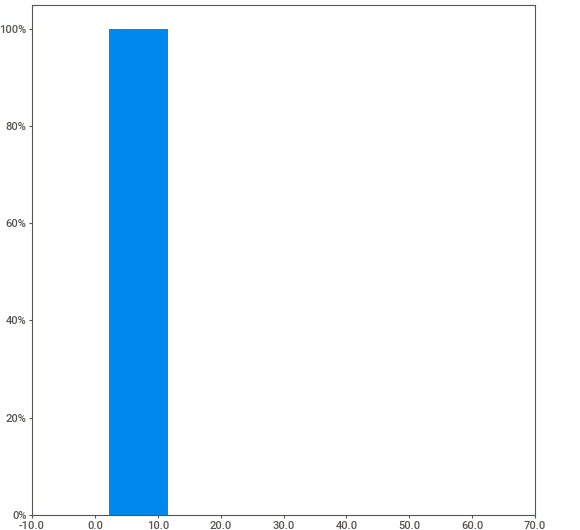
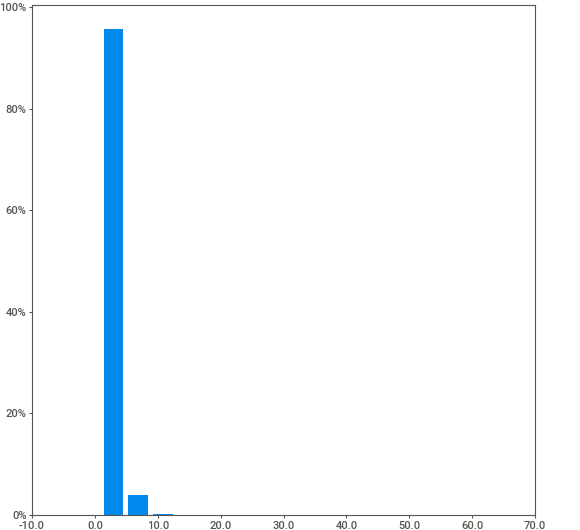
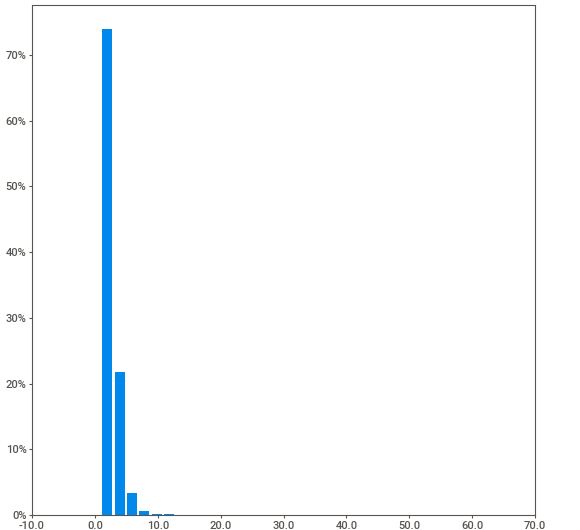
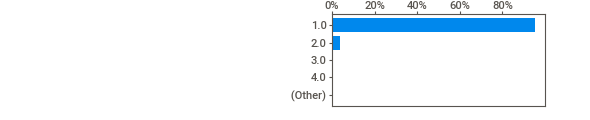
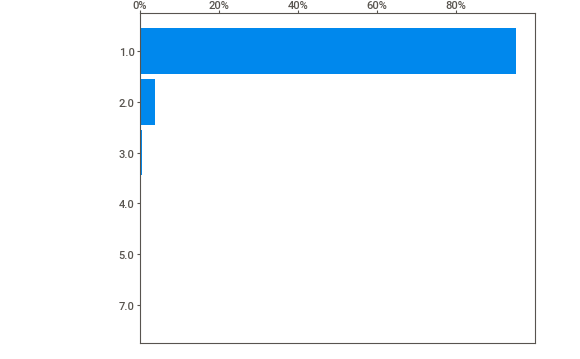
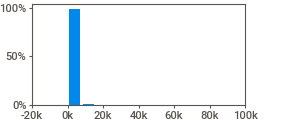
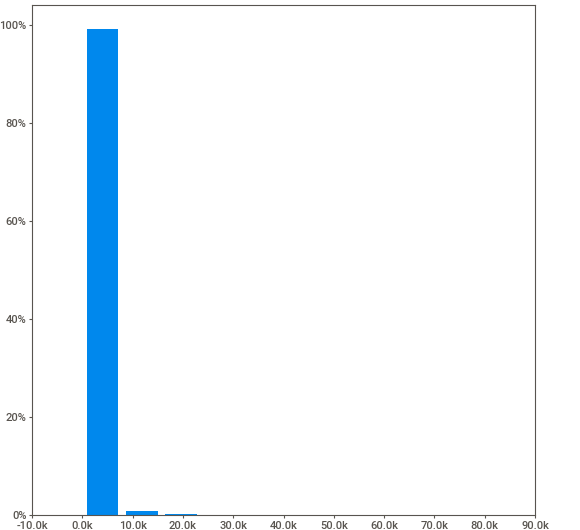
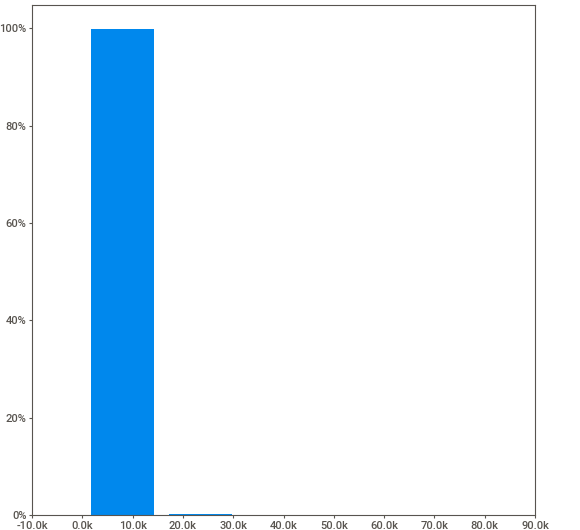
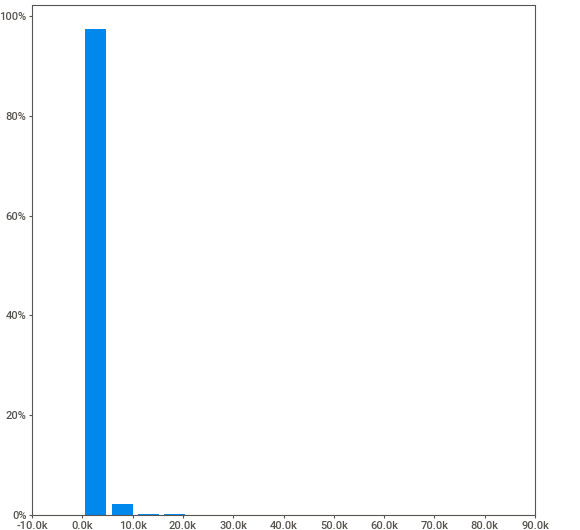
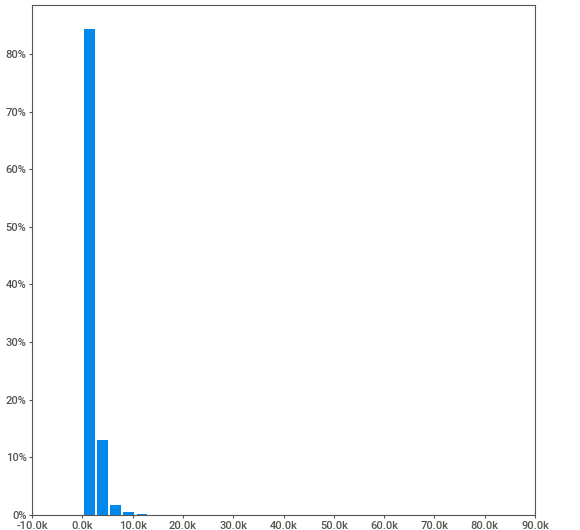
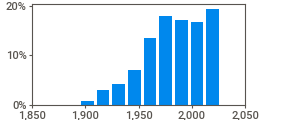
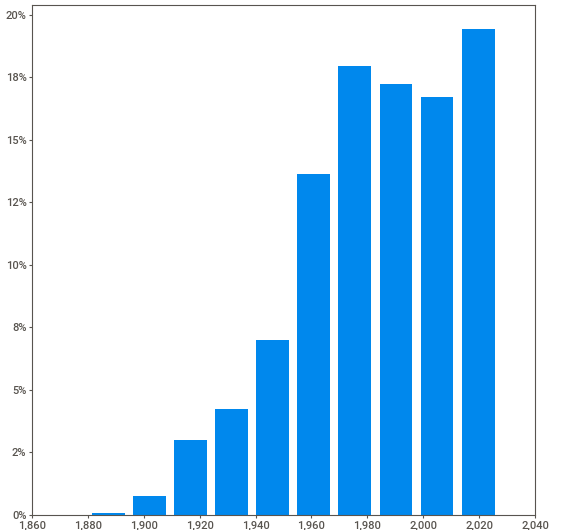
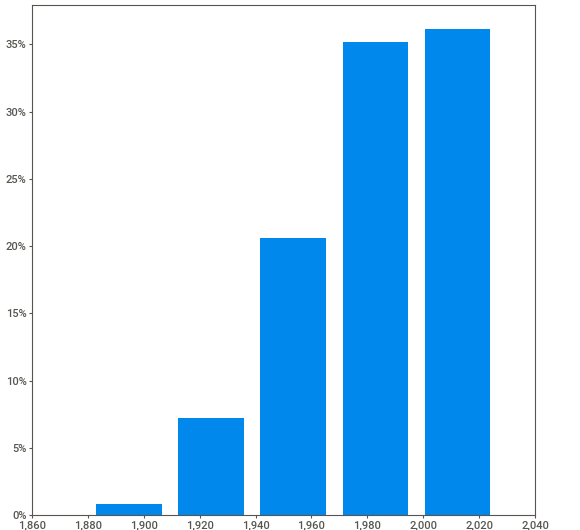
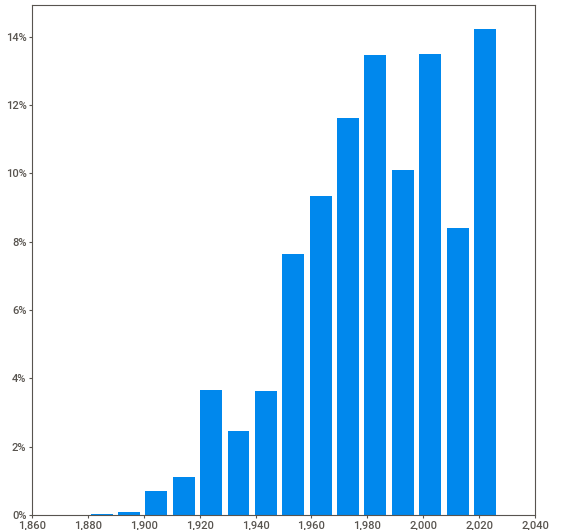
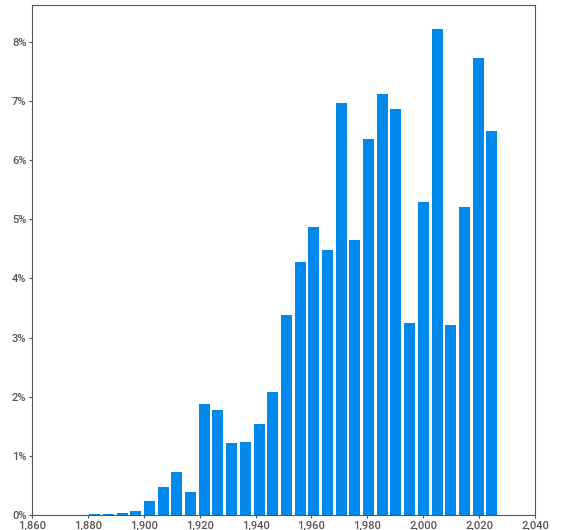
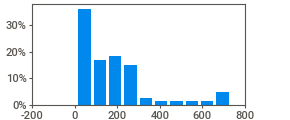
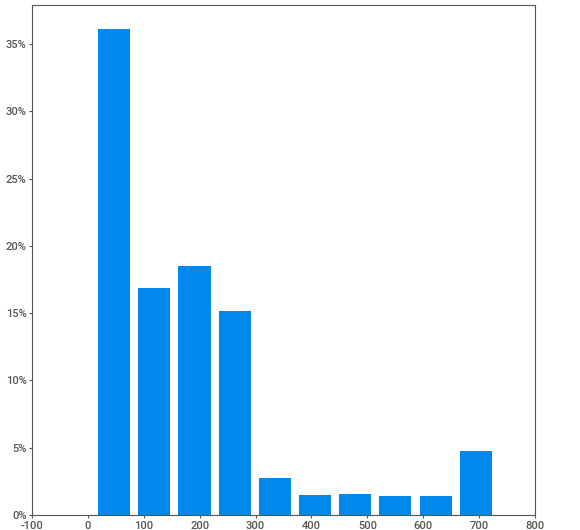
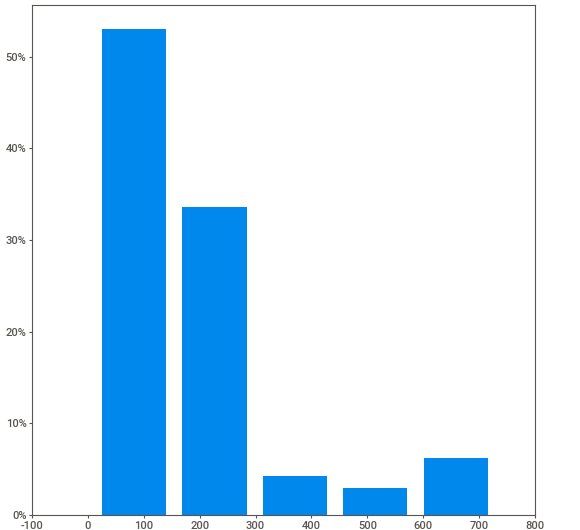
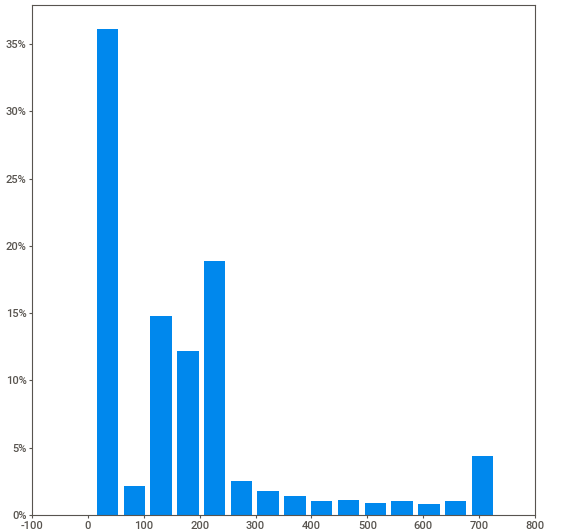
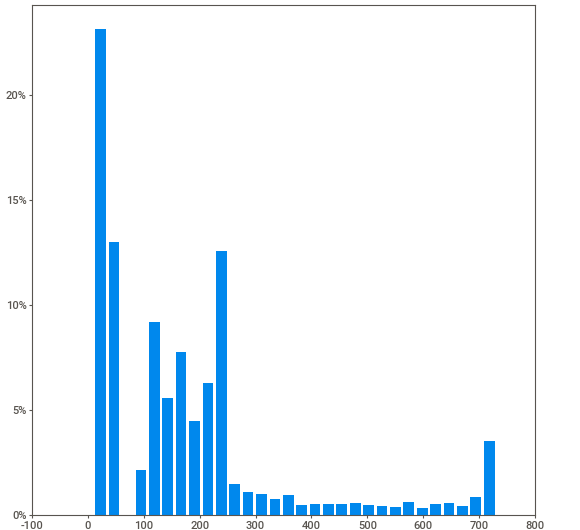
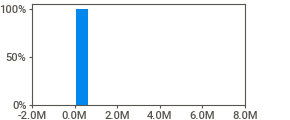
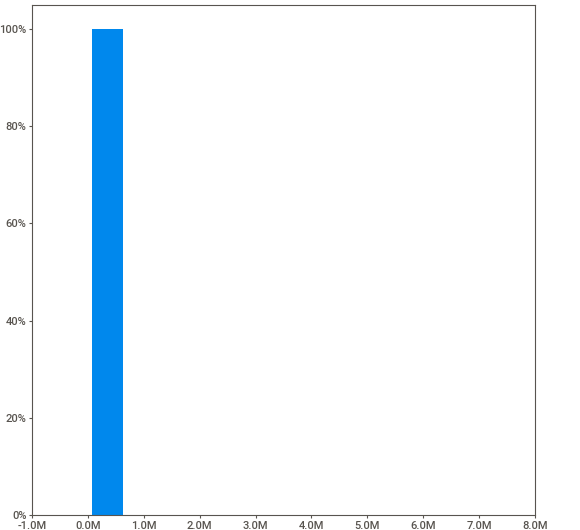
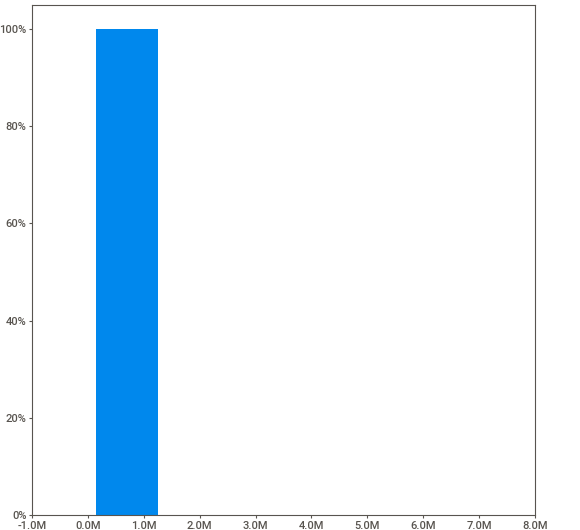
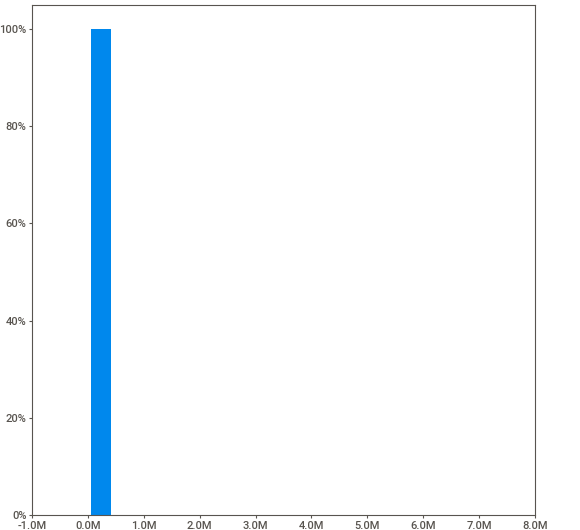
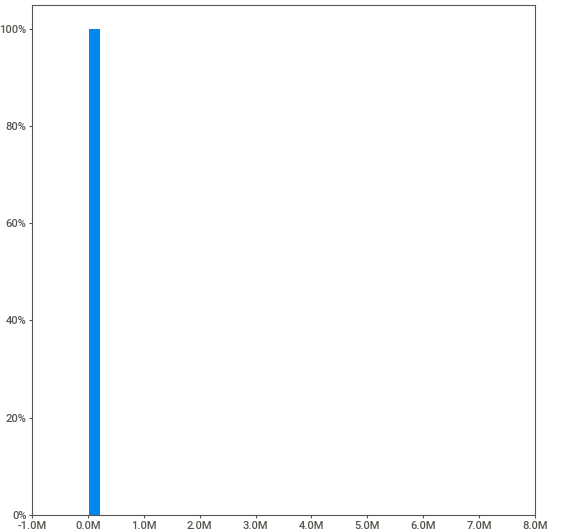
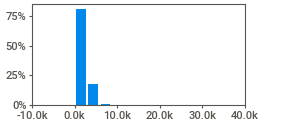
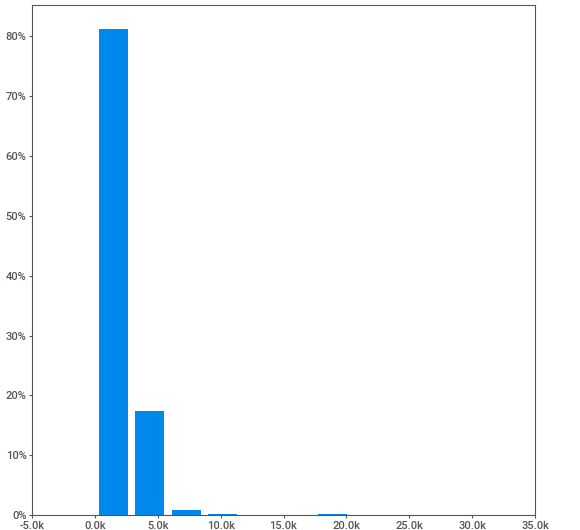
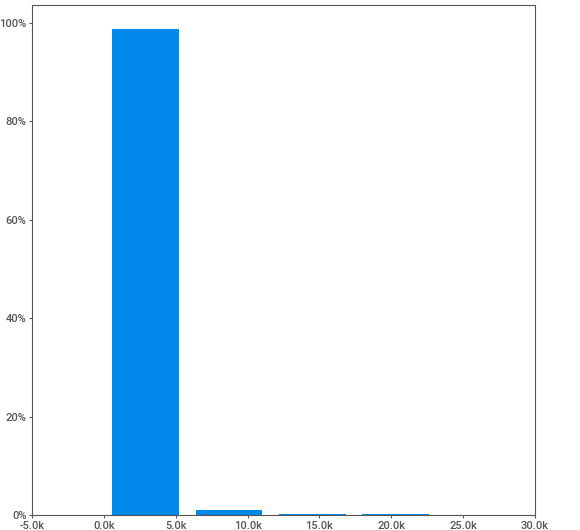
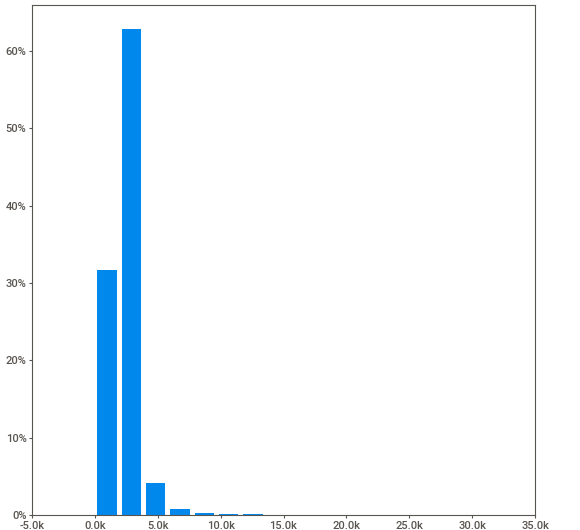
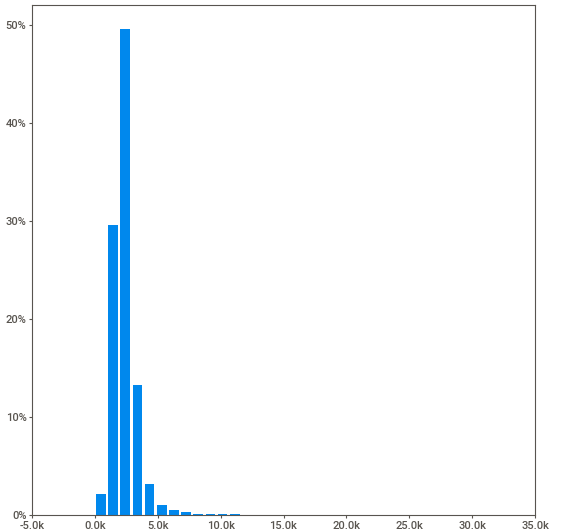
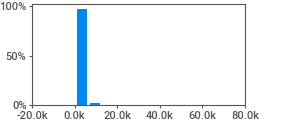
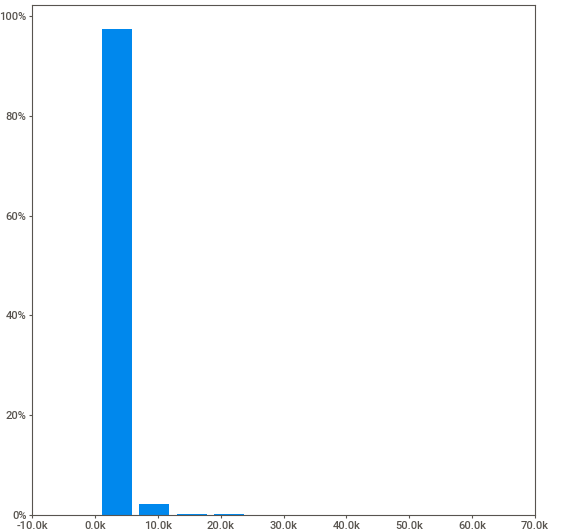
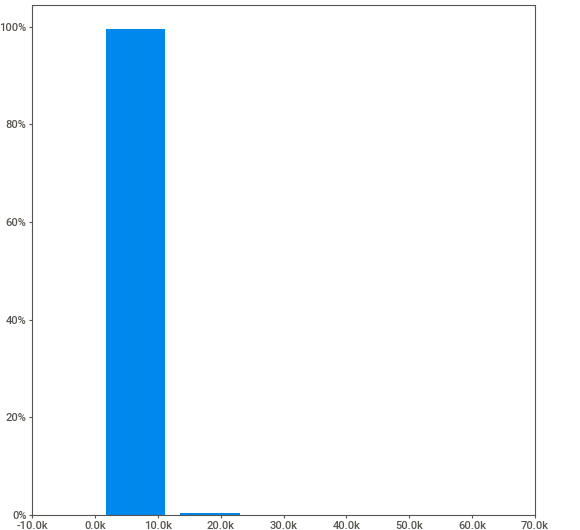
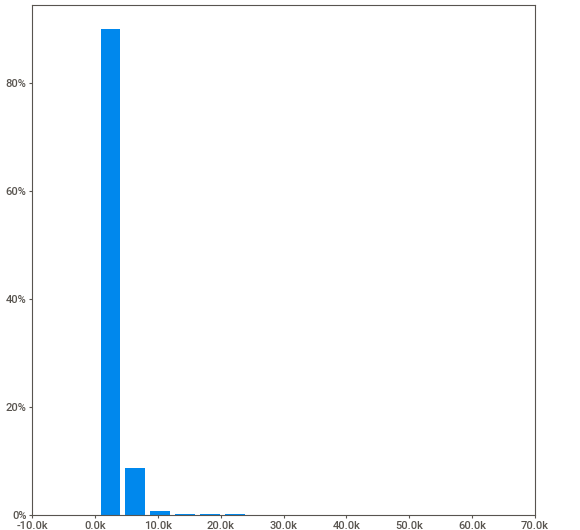
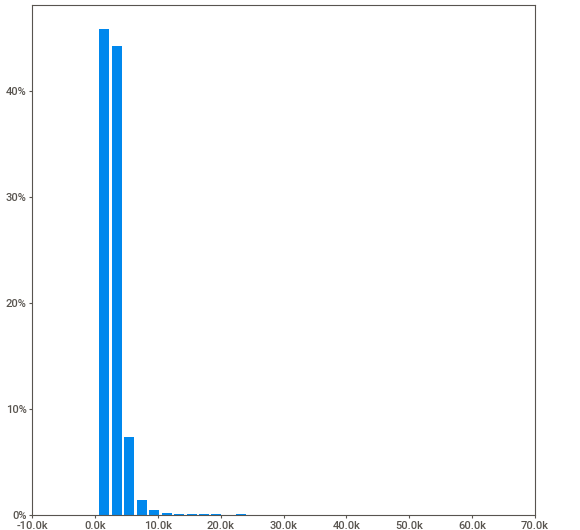
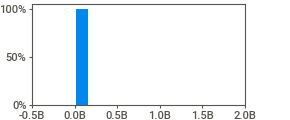
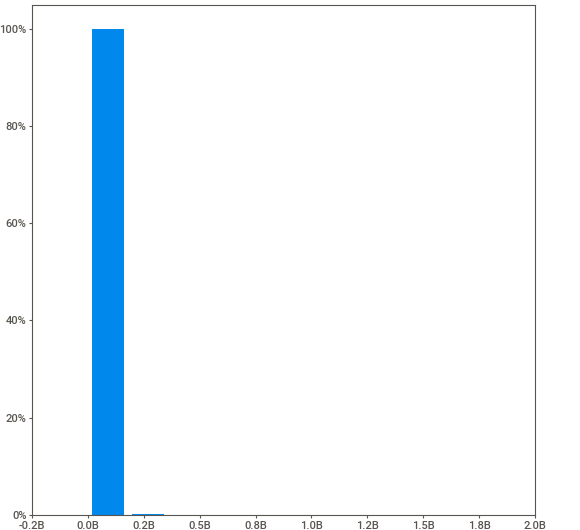
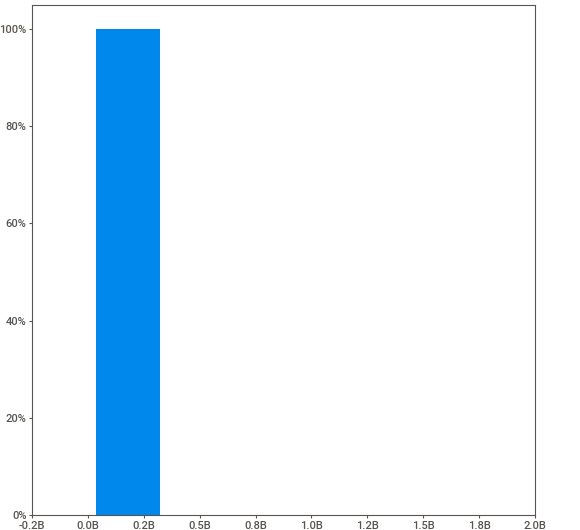
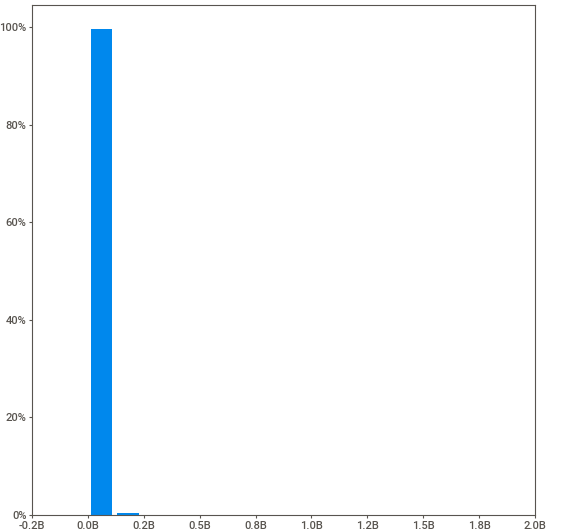
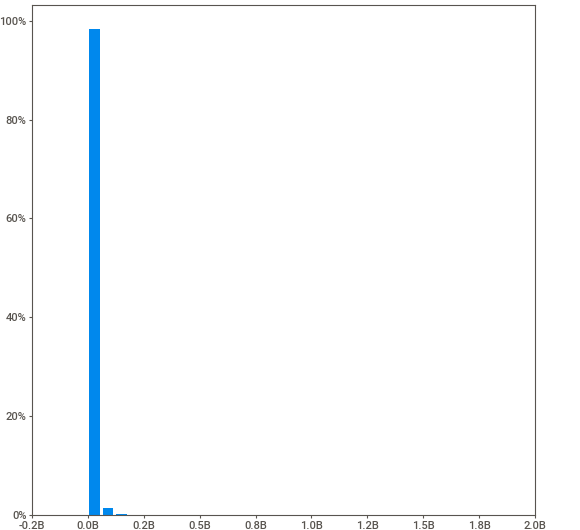
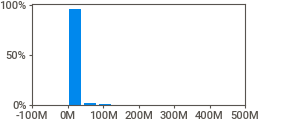
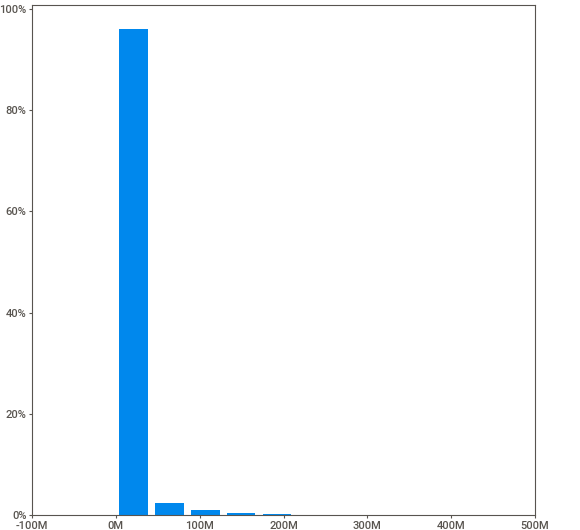
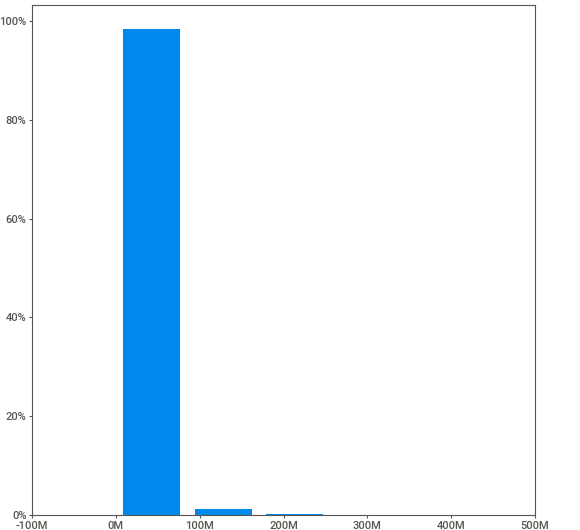
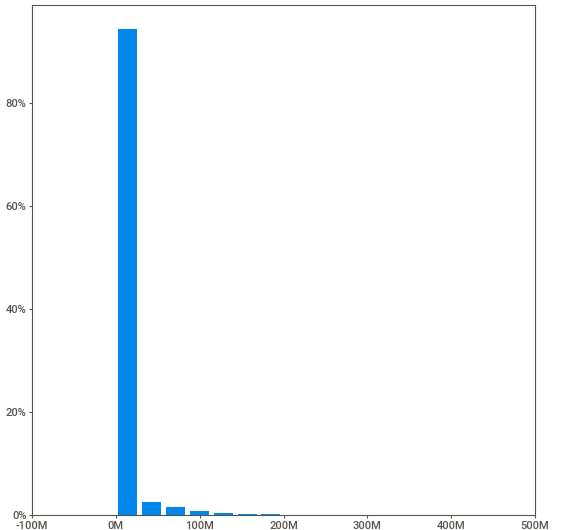
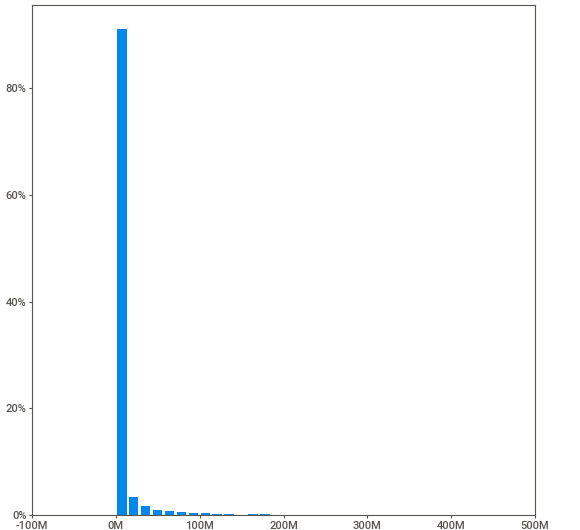
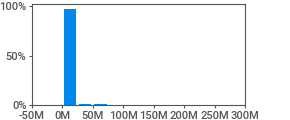
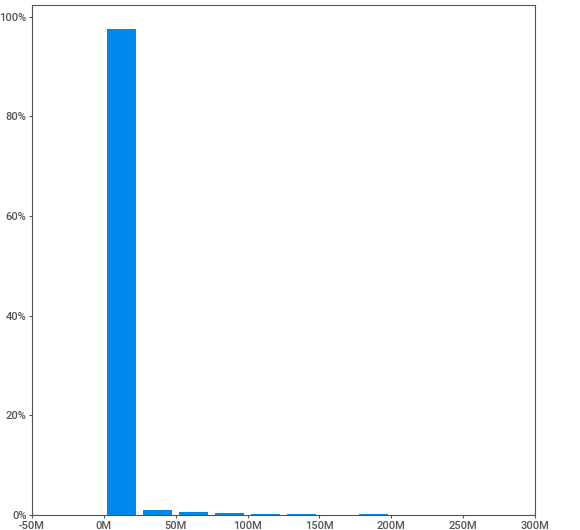
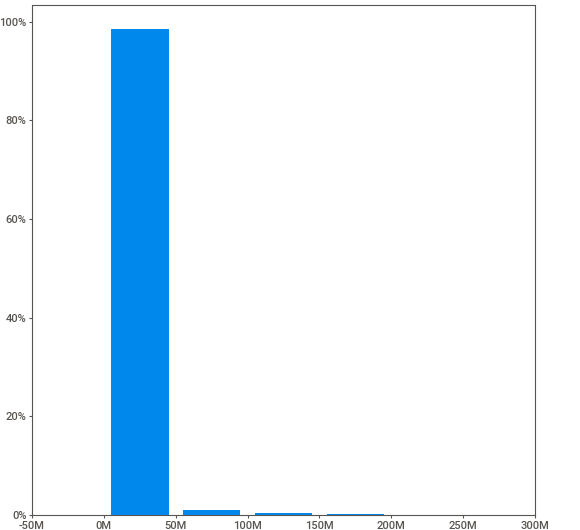
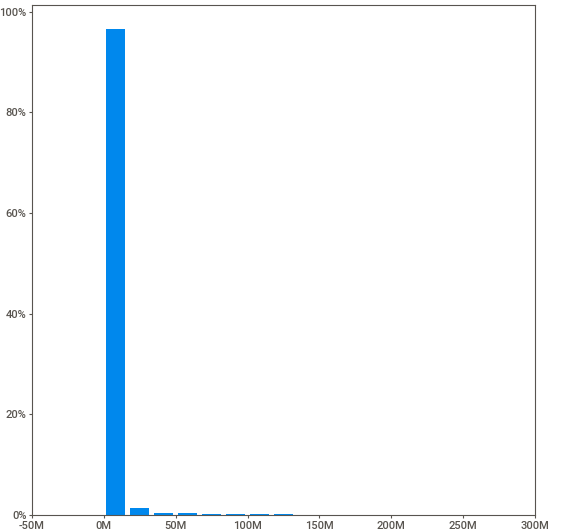
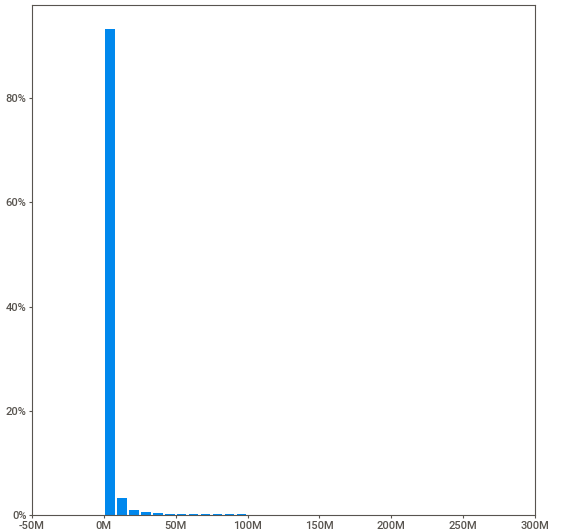
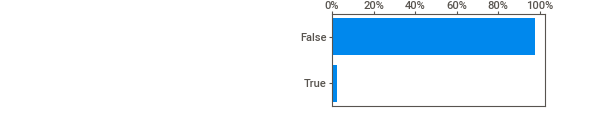
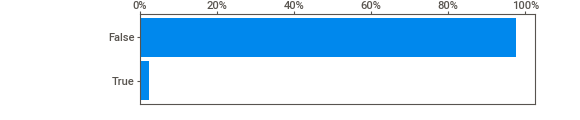
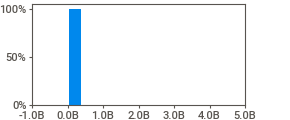
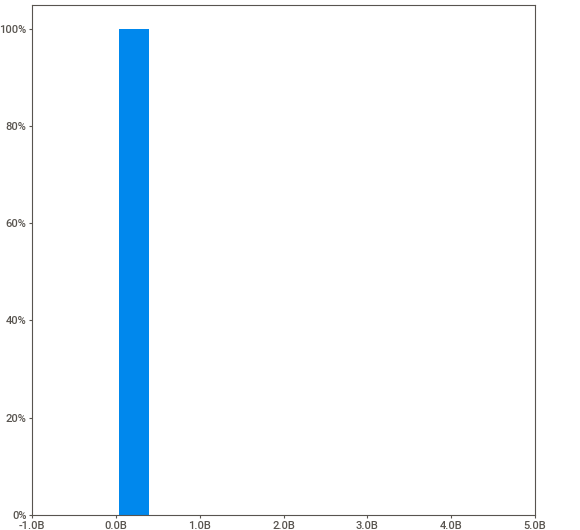
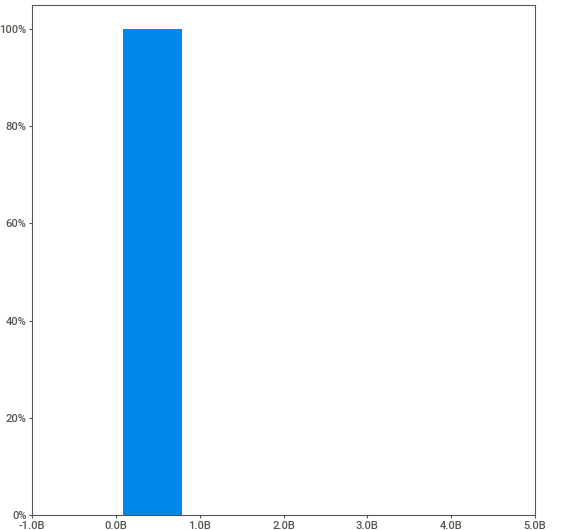
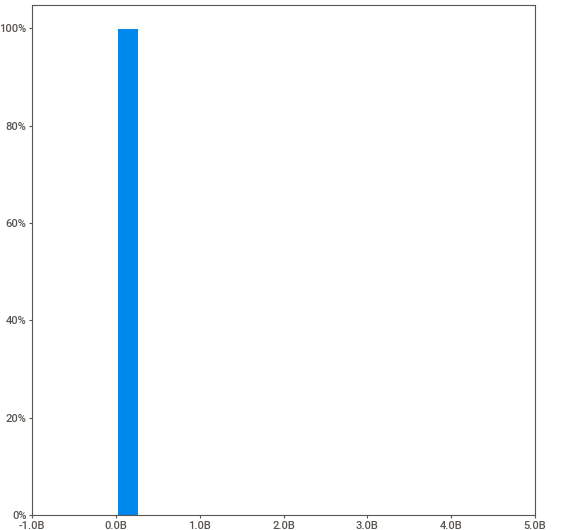
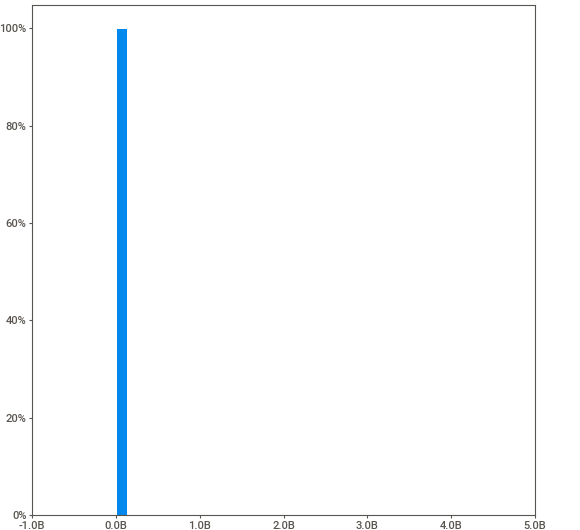
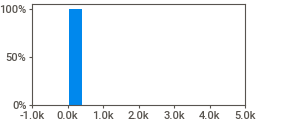
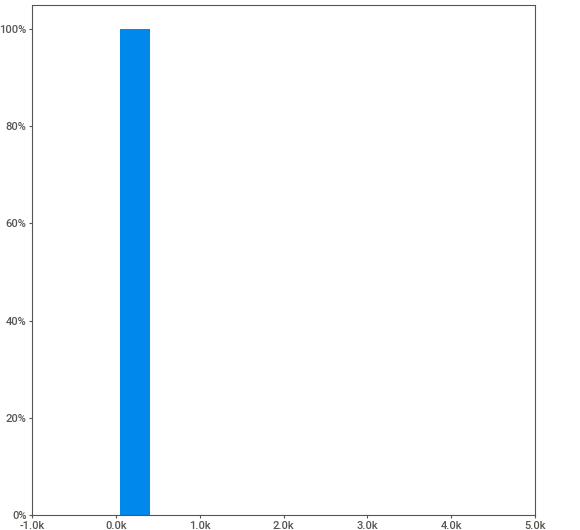
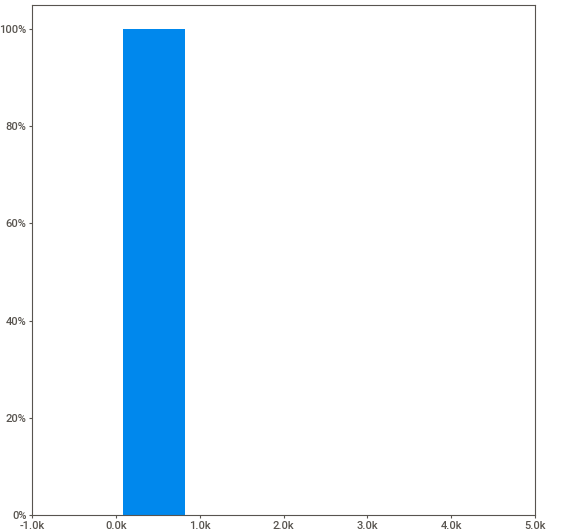
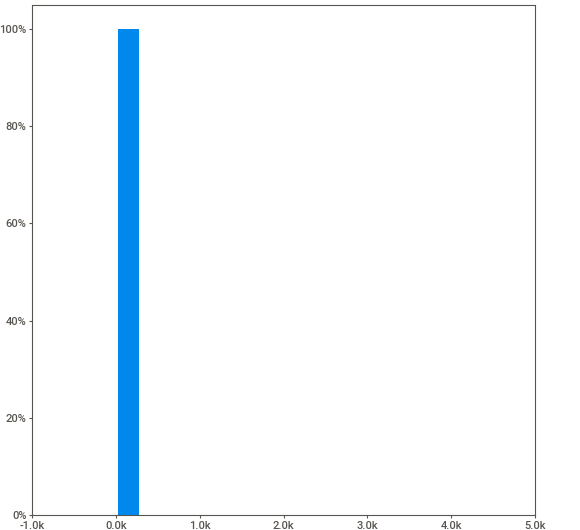
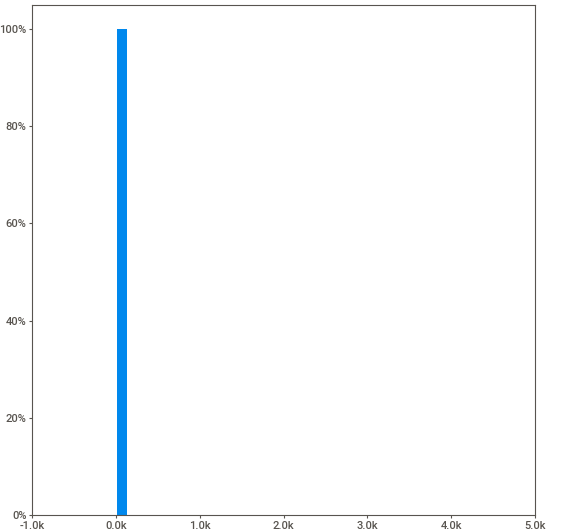
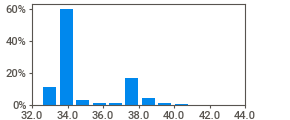
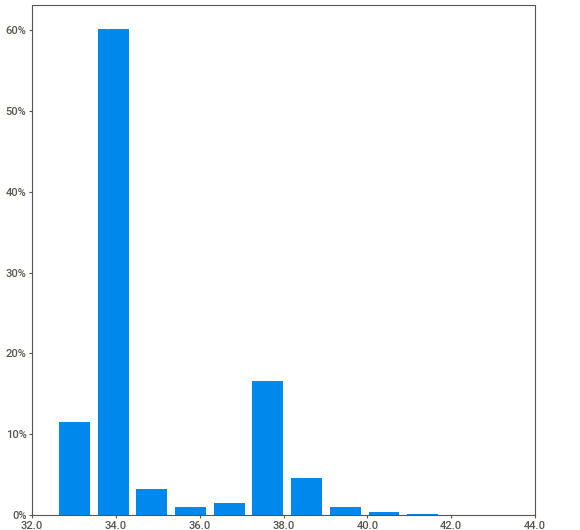
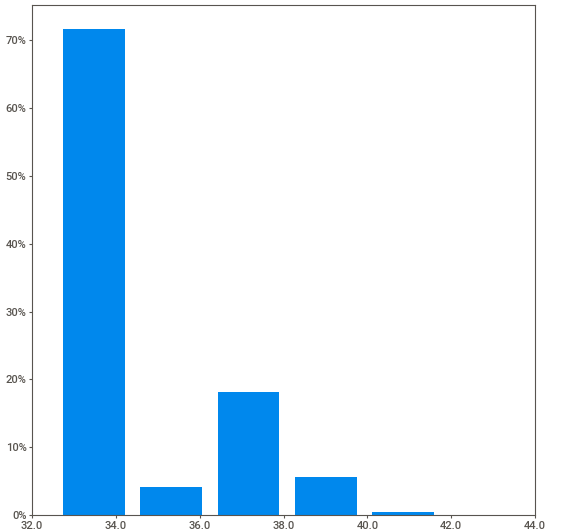
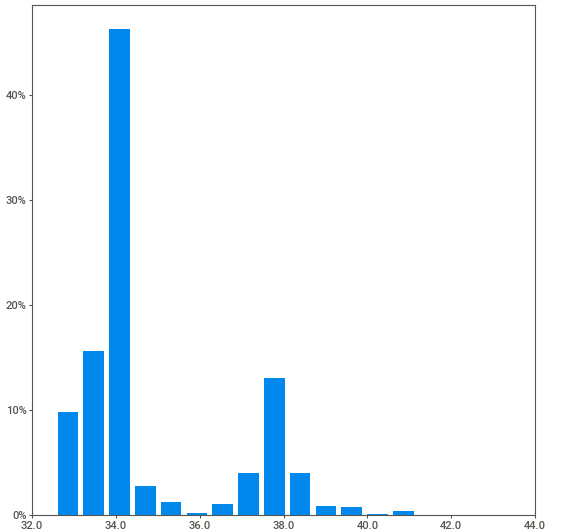
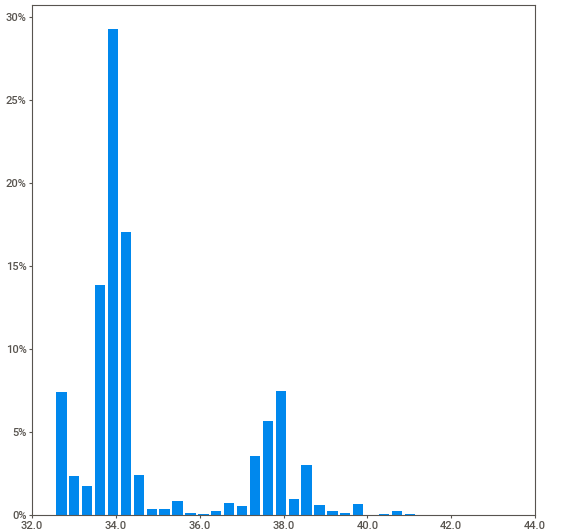
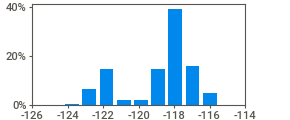
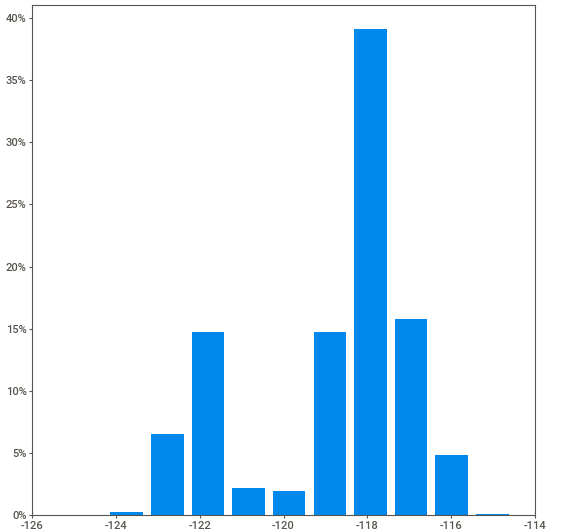
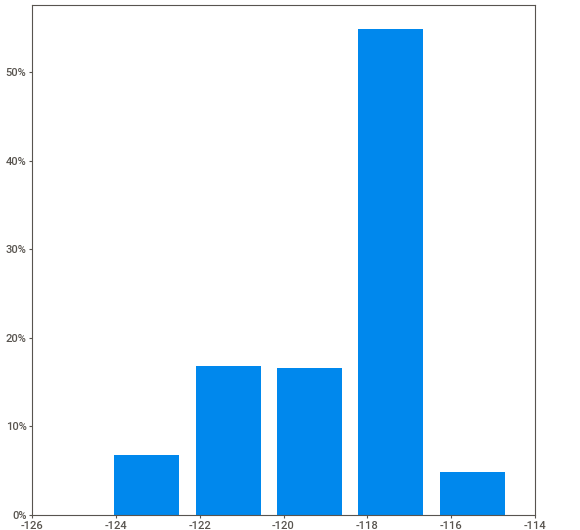
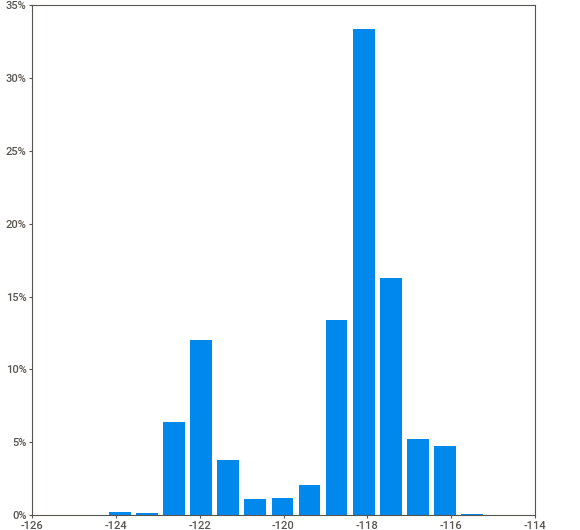
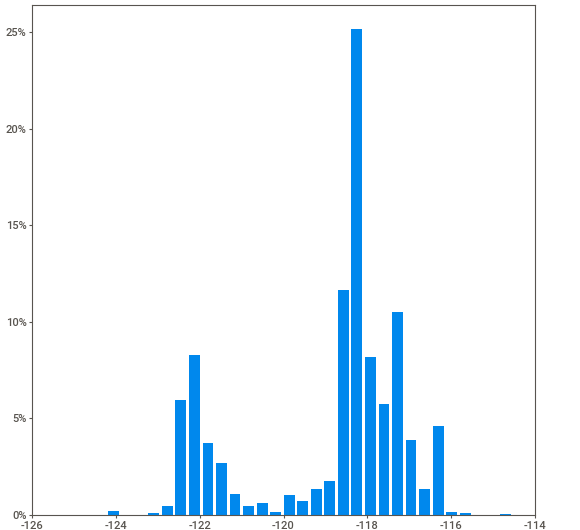
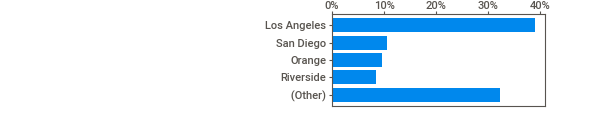
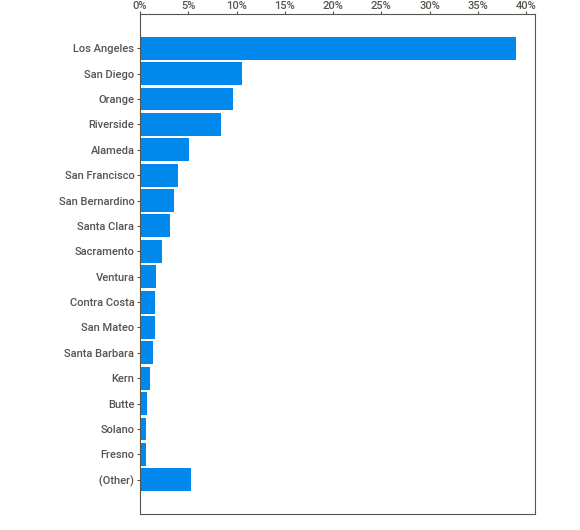
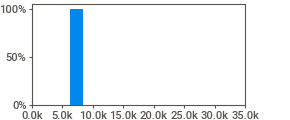
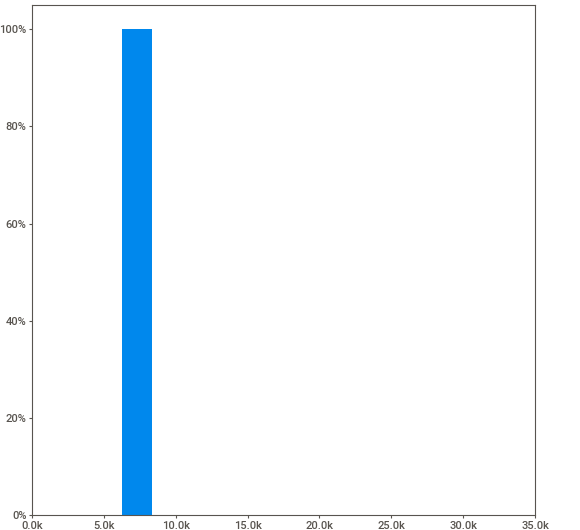
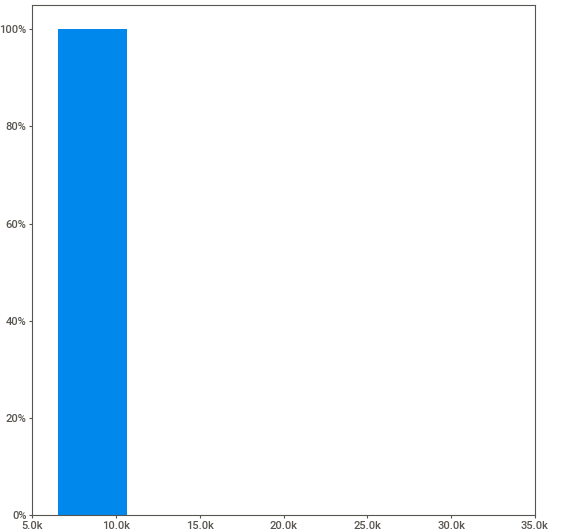
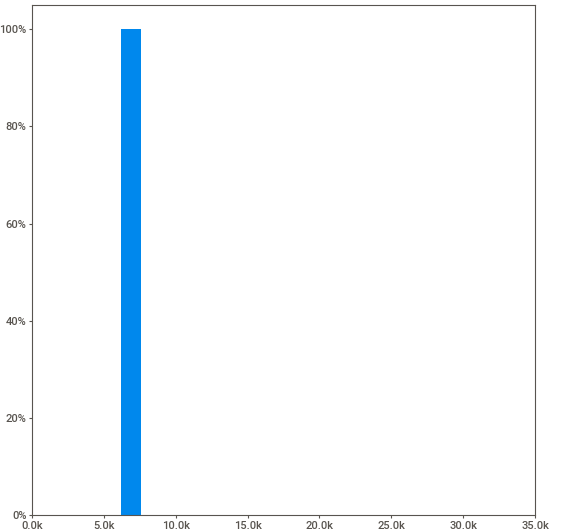
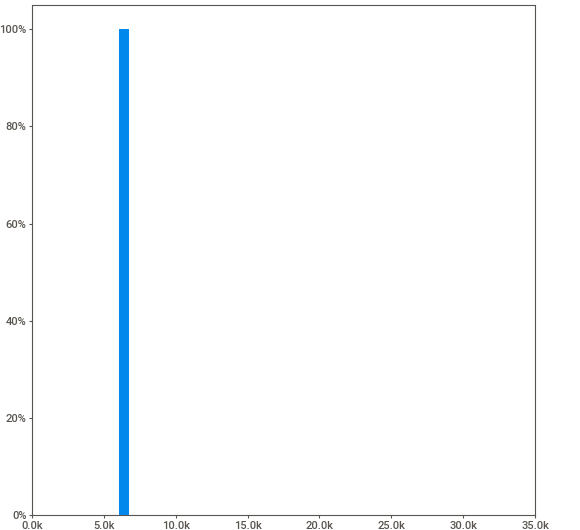
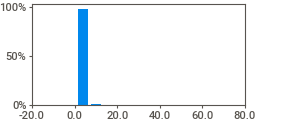
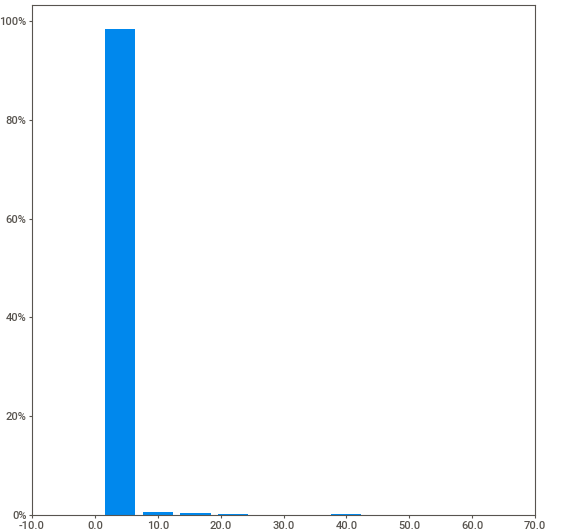
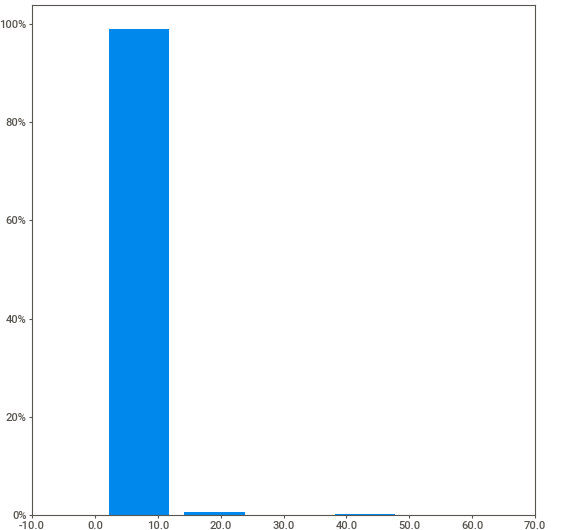
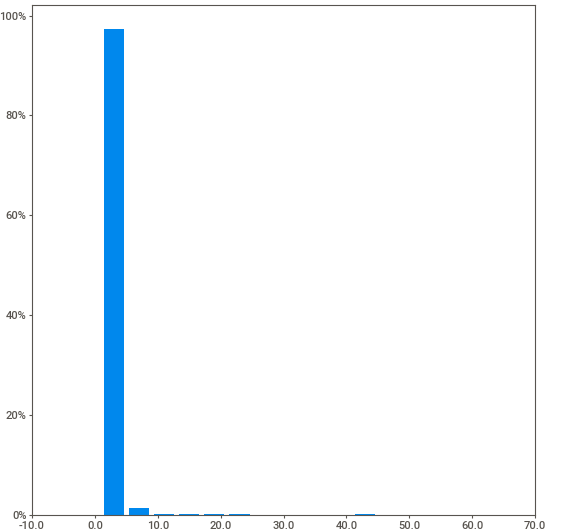
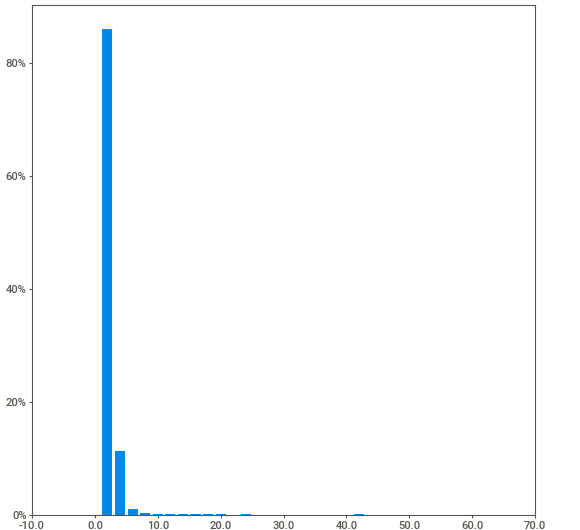
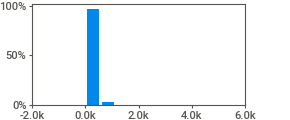
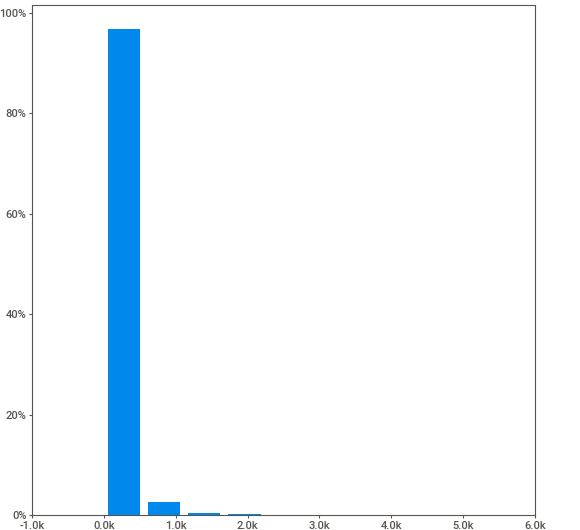
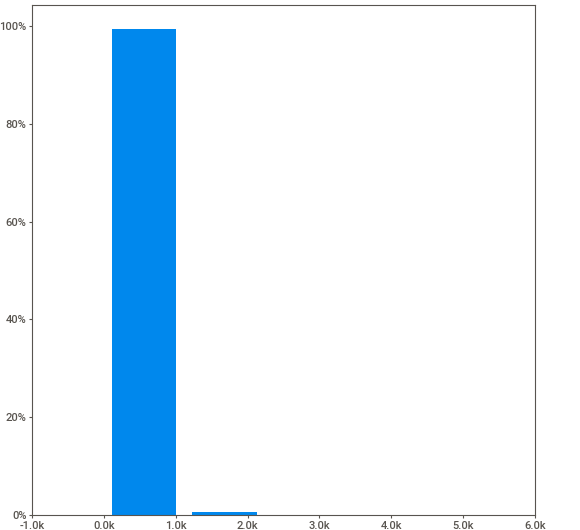
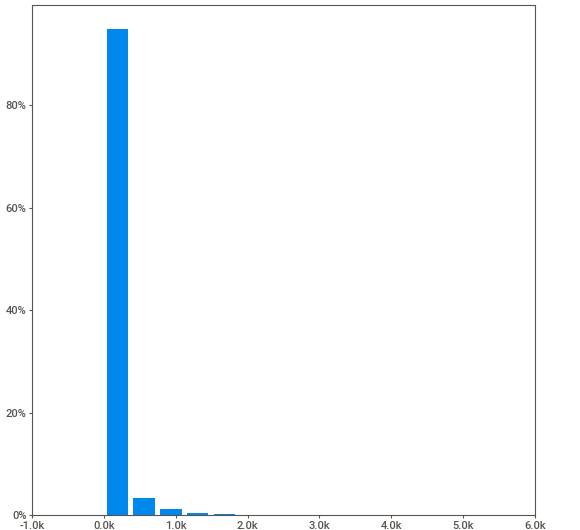
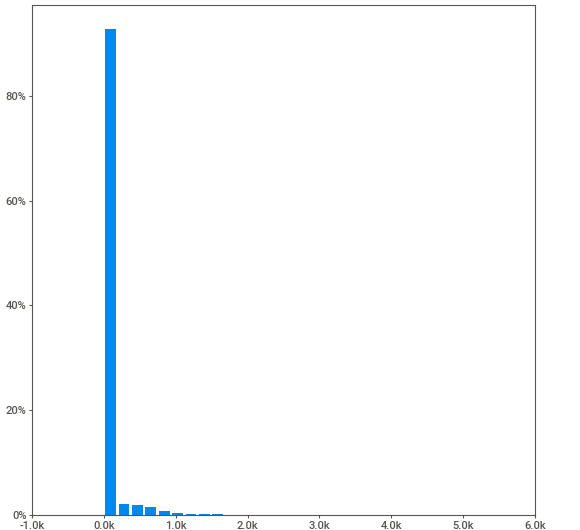
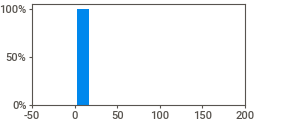
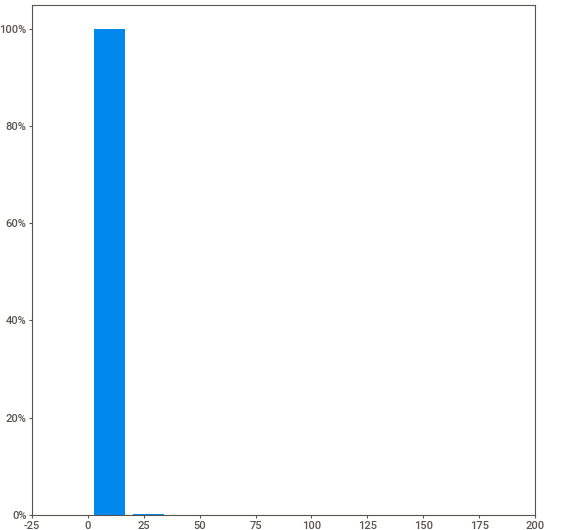
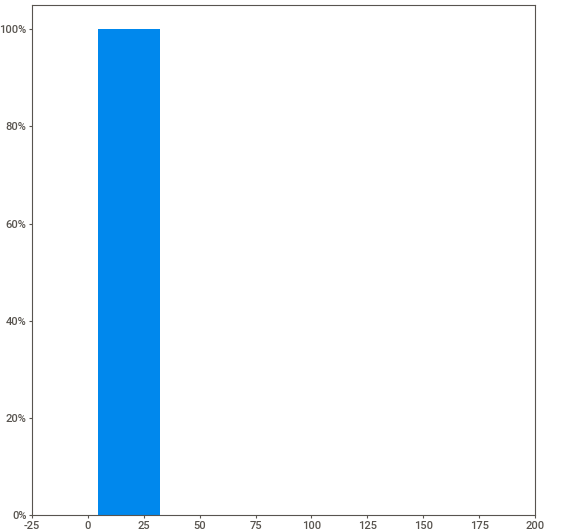
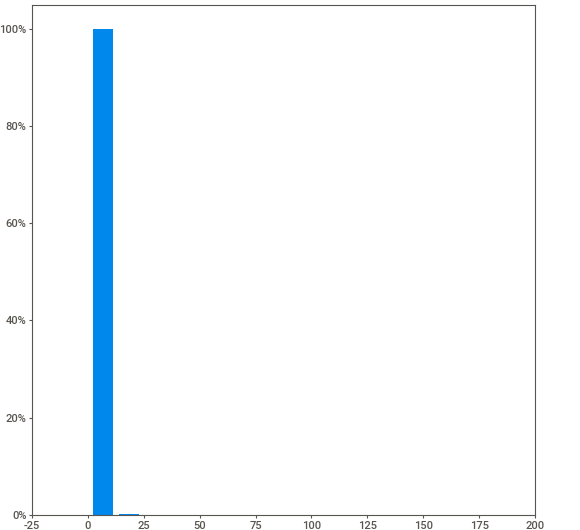
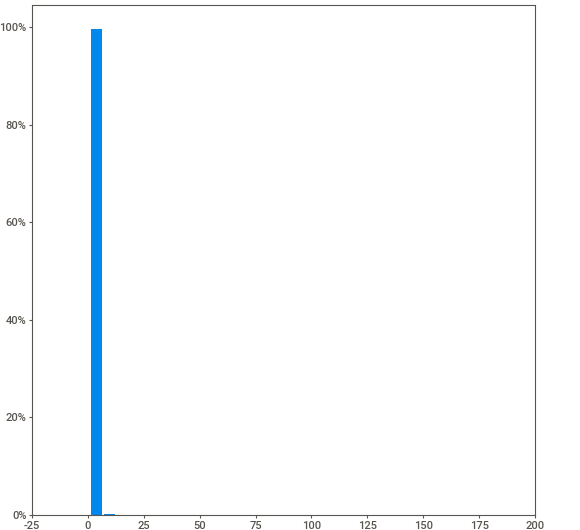
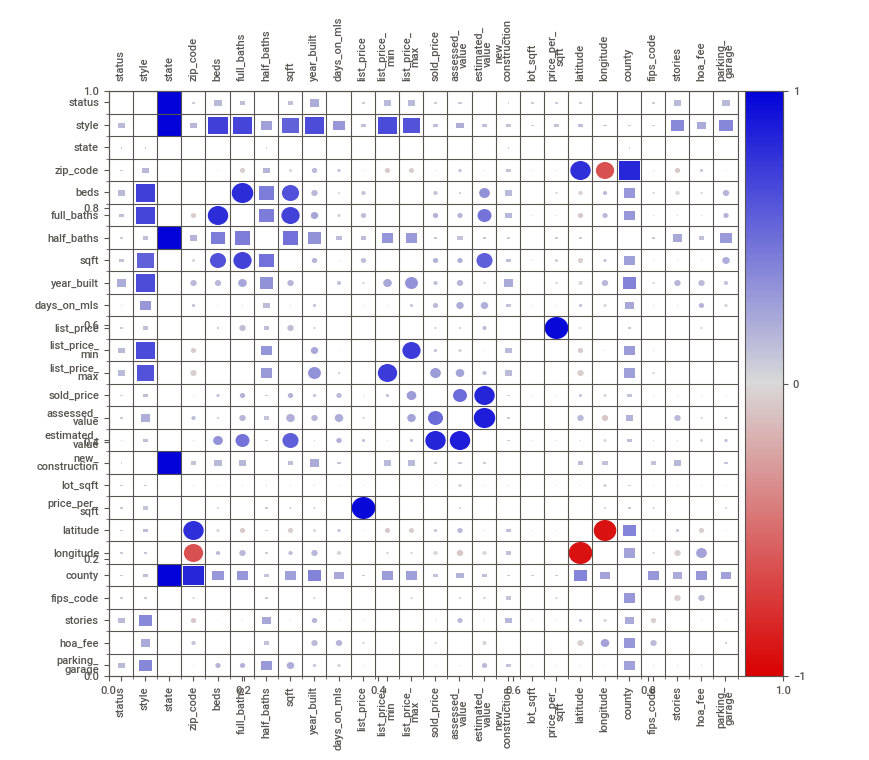
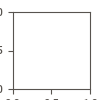

In [ ]:
import sweetviz

sweetviz_report = sweetviz.analyze(df)
sweetviz_report.show_notebook()

## **Data Cleaning**

1. Drop Duplicate Rows
2. Drop Irrelevant Columns
3. Type Conversion
4. Standardization
5. Imputation
6. Data Filtering
7. Drop Empty Columns


In [ ]:
df = original_data.copy()
df.shape

(22418, 57)

#### Drop Duplicate Columns

Some rows contain duplicated rows from our data collection process when properties were scraped multiple times.

In [ ]:
original_data.columns

Index(['property_url', 'property_id', 'listing_id', 'mls', 'mls_id', 'status',
       'text', 'style', 'full_street_line', 'street', 'unit', 'city', 'state',
       'zip_code', 'beds', 'full_baths', 'half_baths', 'sqft', 'year_built',
       'days_on_mls', 'list_price', 'list_price_min', 'list_price_max',
       'list_date', 'sold_price', 'last_sold_date', 'assessed_value',
       'estimated_value', 'new_construction', 'lot_sqft', 'price_per_sqft',
       'latitude', 'longitude', 'neighborhoods', 'county', 'fips_code',
       'stories', 'hoa_fee', 'parking_garage', 'agent_id', 'agent_name',
       'agent_email', 'agent_phones', 'agent_mls_set', 'agent_nrds_id',
       'broker_id', 'broker_name', 'builder_id', 'builder_name', 'office_id',
       'office_mls_set', 'office_name', 'office_email', 'office_phones',
       'nearby_schools', 'primary_photo', 'alt_photos'],
      dtype='object')

In [ ]:
df.columns

Index(['property_url', 'property_id', 'listing_id', 'mls', 'mls_id', 'status',
       'text', 'style', 'full_street_line', 'street', 'unit', 'city', 'state',
       'zip_code', 'beds', 'full_baths', 'half_baths', 'sqft', 'year_built',
       'days_on_mls', 'list_price', 'list_price_min', 'list_price_max',
       'list_date', 'sold_price', 'last_sold_date', 'assessed_value',
       'estimated_value', 'new_construction', 'lot_sqft', 'price_per_sqft',
       'latitude', 'longitude', 'neighborhoods', 'county', 'fips_code',
       'stories', 'hoa_fee', 'parking_garage', 'agent_id', 'agent_name',
       'agent_email', 'agent_phones', 'agent_mls_set', 'agent_nrds_id',
       'broker_id', 'broker_name', 'builder_id', 'builder_name', 'office_id',
       'office_mls_set', 'office_name', 'office_email', 'office_phones',
       'nearby_schools', 'primary_photo', 'alt_photos'],
      dtype='object')

In [ ]:
duplicate_counts = df['property_id'].value_counts()
duplicate_counts = duplicate_counts[duplicate_counts > 1]
print(duplicate_counts)

property_id
2173739168    8
1015478089    6
2371849748    5
9241934913    5
9971262585    4
             ..
2043207179    2
1642494753    2
1669847218    2
2042434589    2
2526907126    2
Name: count, Length: 985, dtype: int64


In [ ]:
df = df.drop_duplicates(subset='property_id')
df = df.reset_index(drop=True)
df.shape

(21384, 57)

#### Drop Irrelevant Columns

1. The IDs do not contribute to the model
2. The Names do not contribute to the model
3. The Phone Numbers and Email Addresses do not contribute to the model

In [ ]:
columns_to_remove = [
    # IDs
    'agent_id',
    'agent_mls_set',
    'agent_nrds_id',
    'broker_id',
    'builder_id',
    'mls',
    'mls_id',
    'office_id',
    'office_mls_set',
    'property_id',
    'listing_id',

    # Names
    'agent_name',
    'broker_name',
    'builder_name',
    'office_name',

    # Phones, Emails
    'agent_email',
    'agent_phones',
    'office_email',
    'office_phones',

    # URLs
    'alt_photos',
    'primary_photo',
    'property_url',
]

df = df.drop(columns=columns_to_remove, errors='ignore')
df.shape

(21384, 35)

**Analyze Remaining Columns using Sweetviz**

1. `status` = 'FOR_RENT', 'PENDING', or 'CONTINGENT' and not relevant
2. `full_street_line` and `street` are > 93%+ distinct
3. `unit` is missing 76%+ values and can be inferred from the property type being an 'APARTMENT'
4. `state` is the same for all values (all properties located in California)
5. `zip_code` is highly correlated with both `latitude` and `longitude` and missing very few values compared to the other two
6. `beds` is missing 43% of values, but at least 1 bedroom is required, for a rental, this can be set to 1
6. `full_baths` is missing 43% of values, but at least 1 bedroom is required, for a rental, this can also be set to 1
8. `half_baths` is missing 87% of values, but can be set to 0 if missing
9. `list_price`, `list_price_min`, and `list_price_max` are all columns but min & max have more empty values. The min and max columns can be dropped
10. `fips_code` is another way to represent `zip_code` and can be dropped
11. `sqft`, `lot_sqft`, `price_per_sqft`, `sold_price`, `assessed_value`, and `estimated_value` all have ~40-60% missing values but may be imputable using MICE from other columns
12. `neighborhoods` and `nearby_schools` are highly correlated with `county` and can be dropped
13. `stories`, `parking_garage`, and `hoa_fee` have 60-70% missing values but can be imputed to 1 for story, 0 for parking_garage, and 0 for hoa_fee
14. `days_on_mls` can be computed from `list_date` and thus can be dropped

#### Drop Low Information Columns as per above Sweetviz Analysis




In [ ]:
columns_to_remove = [
    # Status = 'FOR_RENT', 'PENDING', and 'CONTINGENT', but we'll assume all are FOR_RENT
    'status',
    # These all mostly all distinct values (70-90%+)
    'street',
    'full_street_line',
    'unit',
    # These are highly correlated with zip_code
    'fips_code',
    'latitude',
    'longitude',
    # These are highly correlated with country
    'neighborhoods',
    'nearby_schools',
    # These are highly correlated with list_price
    'list_price_min',
    'list_price_max',
    # This can be computed directly from list_date
    'days_on_mls',
    # There is only 1 value for state (California)
    'state',
]

df = df.drop(columns=columns_to_remove, errors='ignore')
df.shape

(21384, 22)

#### Standardization

Standardizing text fields to remove redundant whitespaces and standardize the case.

In [ ]:
string_columns = ['city', 'county']
for col in string_columns:
    if col in df.columns:
        df[col] = df[col].str.strip().str.lower()

#### Type Conversion

Casting date, numerical and categorical fields into relevant data types.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21384 entries, 0 to 21383
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   text              17043 non-null  object 
 1   style             21384 non-null  object 
 2   city              21382 non-null  object 
 3   zip_code          21381 non-null  float64
 4   beds              12277 non-null  float64
 5   full_baths        12137 non-null  float64
 6   half_baths        2879 non-null   float64
 7   sqft              11380 non-null  float64
 8   year_built        9972 non-null   float64
 9   list_price        12287 non-null  float64
 10  list_date         21384 non-null  object 
 11  sold_price        11115 non-null  float64
 12  last_sold_date    11117 non-null  object 
 13  assessed_value    12572 non-null  float64
 14  estimated_value   11129 non-null  float64
 15  new_construction  21384 non-null  bool   
 16  lot_sqft          7561 non-null   float6

In [ ]:
# Date
date_columns = ['list_date', 'last_sold_date']
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

In [ ]:
# Numeric
numeric_columns = ['beds', 'full_baths', 'half_baths', 'lot_sqft', 'sqft', 'zip_code',
                   'list_price', 'sold_price', 'year_built', 'hoa_fee', 'parking_garage',
                   'price_per_sqft', 'new_construction', 'assessed_value', 'estimated_value', 'stories']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [ ]:
# Categorical
categorical_columns = ['style', 'city', 'county']
for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21384 entries, 0 to 21383
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   text              17043 non-null  object        
 1   style             21384 non-null  category      
 2   city              21382 non-null  category      
 3   zip_code          21381 non-null  float64       
 4   beds              12277 non-null  float64       
 5   full_baths        12137 non-null  float64       
 6   half_baths        2879 non-null   float64       
 7   sqft              11380 non-null  float64       
 8   year_built        9972 non-null   float64       
 9   list_price        12287 non-null  float64       
 10  list_date         21384 non-null  datetime64[ns]
 11  sold_price        11115 non-null  float64       
 12  last_sold_date    11117 non-null  datetime64[ns]
 13  assessed_value    12572 non-null  float64       
 14  estimated_value   1112

#### Imputation

Imputation to handle missing or irregular data.

In [ ]:
### Imputation for Missing Values

# Impute `beds` with 1 for missing and zeroed values.
df['beds'] = df['beds'].fillna(1)
df.loc[df['beds'] == 0.0, 'beds'] = 1.0

# Impute `full_baths` with 1 for missing values.
df['full_baths'] = df['full_baths'].fillna(1)

# Impute `half_baths` with 0 for missing values.
df['half_baths'] = df['half_baths'].fillna(0)

# Impute `full_baths` with 1 if both `full_baths` and `half_baths` are 0
df.loc[(df['full_baths'] == 0.0) & (df['half_baths'] == 0.0), 'full_baths'] = 1.0

# Impute `hoa_fee` with 0 for missing values.
df['hoa_fee'] = df['hoa_fee'].fillna(0)

# Impute `stories` with 1 for missing values.
df['stories'] = df['stories'].fillna(1)

# Impute `parking_garage` with 0 for missing values.
df['parking_garage'] = df['parking_garage'].fillna(0)

# Impute `year_built` using last_sold_date
df['year_built'] = df['year_built'].fillna(df['last_sold_date'].dt.year)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21384 entries, 0 to 21383
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   text              17043 non-null  object        
 1   style             21384 non-null  category      
 2   city              21382 non-null  category      
 3   zip_code          21381 non-null  float64       
 4   beds              21384 non-null  float64       
 5   full_baths        21384 non-null  float64       
 6   half_baths        21384 non-null  float64       
 7   sqft              11380 non-null  float64       
 8   year_built        14408 non-null  float64       
 9   list_price        12287 non-null  float64       
 10  list_date         21384 non-null  datetime64[ns]
 11  sold_price        11115 non-null  float64       
 12  last_sold_date    11117 non-null  datetime64[ns]
 13  assessed_value    12572 non-null  float64       
 14  estimated_value   1112

### Outliers Removal

Filtering data to eliminate outliers by flagging data that needs to removed.

This needs to occur before MICE Imptuation below otherwise imputed values will be wildly wrong.

In [ ]:
invalid_flags = [
    'is_invalid_beds',
    'is_invalid_full_baths',
    'is_invalid_half_baths',
    'is_invalid_year_built',
    'is_invalid_sqft',
    'is_invalid_lot_sqft',
    'is_invalid_list_date',
]

def detect_outliers(df):
    # Flagging invalid Bedrooms and Bathrooms
    df['is_invalid_beds'] = ~df['beds'].between(0, 10, inclusive="both")
    df['is_invalid_full_baths'] = ~df['full_baths'].between(0, 10, inclusive="both")
    df['is_invalid_half_baths'] = ~df['half_baths'].between(0, 10, inclusive="both")

    # Flagging invalid Year Built
    current_year = datetime.now().year
    df['is_invalid_year_built'] = ~(df['year_built'].between(1800, current_year, inclusive="both")  | df['year_built'].isna())

    # Flagging invalid Lot Size
    df['is_invalid_sqft'] = ~(df['sqft'].between(0, 20_000, inclusive="both") | df['sqft'].isna())
    df['is_invalid_lot_sqft'] = ~(df['lot_sqft'].between(0, 20_000, inclusive="both") | df['lot_sqft'].isna())

    # Flagging invalid lisitng dates
    current_date = datetime.now()
    df['is_invalid_list_date'] = df['list_date'] > current_date

    df['is_invalid_row'] = df[invalid_flags].any(axis=1)

    print(f"Invalid beds: {df['is_invalid_beds'].sum()}")
    print(f"Invalid full_baths: {df['is_invalid_full_baths'].sum()}")
    print(f"Invalid half_baths: {df['is_invalid_half_baths'].sum()}")
    print(f"Invalid year_built: {df['is_invalid_year_built'].sum()}")
    print(f"Invalid sqft: {df['is_invalid_sqft'].sum()}")
    print(f"Invalid lot_sqft: {df['is_invalid_lot_sqft'].sum()}")
    print(f"Invalid list_date: {df['is_invalid_list_date'].sum()}")

    return df

In [ ]:
df['list_date'] = pd.to_datetime(df['list_date'], errors='coerce')
df = detect_outliers(df)
df = df[~df['is_invalid_row']].copy()
df = df.drop(columns=['is_invalid_row'] + invalid_flags, errors='ignore')
df = df.reset_index(drop=True)
df.shape

Invalid beds: 14
Invalid full_baths: 26
Invalid half_baths: 0
Invalid year_built: 1
Invalid sqft: 10
Invalid lot_sqft: 1457
Invalid list_date: 0


(19910, 22)

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
### MICE imputation

imputer = IterativeImputer(max_iter=10, random_state=0)

df_numerics_only = df.select_dtypes(include=['number'])

df_imputed = pd.DataFrame(imputer.fit_transform(df_numerics_only), columns=df_numerics_only.columns)

df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19910 entries, 0 to 19909
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   zip_code         19910 non-null  float64
 1   beds             19910 non-null  float64
 2   full_baths       19910 non-null  float64
 3   half_baths       19910 non-null  float64
 4   sqft             19910 non-null  float64
 5   year_built       19910 non-null  float64
 6   list_price       19910 non-null  float64
 7   sold_price       19910 non-null  float64
 8   assessed_value   19910 non-null  float64
 9   estimated_value  19910 non-null  float64
 10  lot_sqft         19910 non-null  float64
 11  price_per_sqft   19910 non-null  float64
 12  stories          19910 non-null  float64
 13  hoa_fee          19910 non-null  float64
 14  parking_garage   19910 non-null  float64
dtypes: float64(15)
memory usage: 2.3 MB


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



In [ ]:
df.loc[:, df_imputed.columns] = df_imputed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19910 entries, 0 to 19909
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   text              15600 non-null  object        
 1   style             19910 non-null  category      
 2   city              19908 non-null  category      
 3   zip_code          19910 non-null  float64       
 4   beds              19910 non-null  float64       
 5   full_baths        19910 non-null  float64       
 6   half_baths        19910 non-null  float64       
 7   sqft              19910 non-null  float64       
 8   year_built        19910 non-null  float64       
 9   list_price        19910 non-null  float64       
 10  list_date         19910 non-null  datetime64[ns]
 11  sold_price        19910 non-null  float64       
 12  last_sold_date    10128 non-null  datetime64[ns]
 13  assessed_value    19910 non-null  float64       
 14  estimated_value   1991

In [ ]:
df['last_sold_date'] = pd.to_datetime(df['year_built'].astype(int).astype(str) + '-01-01')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19910 entries, 0 to 19909
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   text              15600 non-null  object        
 1   style             19910 non-null  category      
 2   city              19908 non-null  category      
 3   zip_code          19910 non-null  float64       
 4   beds              19910 non-null  float64       
 5   full_baths        19910 non-null  float64       
 6   half_baths        19910 non-null  float64       
 7   sqft              19910 non-null  float64       
 8   year_built        19910 non-null  float64       
 9   list_price        19910 non-null  float64       
 10  list_date         19910 non-null  datetime64[ns]
 11  sold_price        19910 non-null  float64       
 12  last_sold_date    19910 non-null  datetime64[ns]
 13  assessed_value    19910 non-null  float64       
 14  estimated_value   1991

In [ ]:
df = detect_outliers(df)
df = df[~df['is_invalid_row']].copy()
df = df.drop(columns=['is_invalid_row'] + invalid_flags, errors='ignore')
df = df.reset_index(drop=True)
df.shape

Invalid beds: 0
Invalid full_baths: 0
Invalid half_baths: 0
Invalid year_built: 8
Invalid sqft: 314
Invalid lot_sqft: 597
Invalid list_date: 0


(19120, 22)

#### Drop Rows with Empty Columns

`county` and `city` have very few missing values, these rows can be dropped

`text` will be dropped later once used in feature engineering below

In [ ]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)
print("Missing Value Percentages:")
print(missing_percentage_sorted[missing_percentage_sorted > 0])

Missing Value Percentages:
text      22.254184
county     0.026151
city       0.010460
dtype: float64


In [ ]:
df = df.dropna(subset=['county', 'city'])
df = df.reset_index(drop=True)
df.shape

(19114, 22)

# Feature Engineering

(Feature creation) Ceating new feature: **total_bath**

In [ ]:
print(df.columns)  # Print all column names

Index(['text', 'style', 'city', 'zip_code', 'beds', 'full_baths', 'half_baths',
       'sqft', 'year_built', 'list_price', 'list_date', 'sold_price',
       'last_sold_date', 'assessed_value', 'estimated_value',
       'new_construction', 'lot_sqft', 'price_per_sqft', 'county', 'stories',
       'hoa_fee', 'parking_garage'],
      dtype='object')


In [ ]:
df['total_baths'] = df['full_baths'] + (df['half_baths'] * 0.5)  # half_baths contribute less
df = df.drop(columns=['full_baths', 'half_baths'], errors='ignore')

In [ ]:
df.columns

Index(['text', 'style', 'city', 'zip_code', 'beds', 'sqft', 'year_built',
       'list_price', 'list_date', 'sold_price', 'last_sold_date',
       'assessed_value', 'estimated_value', 'new_construction', 'lot_sqft',
       'price_per_sqft', 'county', 'stories', 'hoa_fee', 'parking_garage',
       'total_baths'],
      dtype='object')

(Binning) Creating new Category: **year_built_category_encoded**

In [ ]:
from sklearn.preprocessing import LabelEncoder

bins = [0, 1950, 1980, 2000, float('inf')]
labels = ['pre-1950', '1950-1980', '1980-2000', '2000-present']
df['year_built_category'] = pd.cut(df['year_built'], bins=bins, labels=labels)

label_encoder = LabelEncoder()
df['year_built_category_encoded'] = label_encoder.fit_transform(df['year_built_category'])

df = df.drop(columns=['year_built', 'year_built_category'], errors='ignore')

In [ ]:
df.columns

Index(['text', 'style', 'city', 'zip_code', 'beds', 'sqft', 'list_price',
       'list_date', 'sold_price', 'last_sold_date', 'assessed_value',
       'estimated_value', 'new_construction', 'lot_sqft', 'price_per_sqft',
       'county', 'stories', 'hoa_fee', 'parking_garage', 'total_baths',
       'year_built_category_encoded'],
      dtype='object')

Convert datetime fields into integer fields: **list_date and last_sold_date**

In [ ]:
df['list_date_year'] = df['list_date'].dt.year
df['list_date_month'] = df['list_date'].dt.month
df['list_date_day'] = df['list_date'].dt.day

df['last_sold_date_year'] = df['last_sold_date'].dt.year
df['last_sold_date_month'] = df['last_sold_date'].dt.month
df['last_sold_date_day'] = df['last_sold_date'].dt.day

df = df.drop(columns=['list_date', 'last_sold_date'], errors='ignore')

Using NLP to extract new features from description

In [ ]:
import re

def extract_amenities(descriptions):
  """
  Extracts amenities from property descriptions using regular expressions.
  """
  amenities_list = []
  for description in descriptions:
    amenities = []
    if isinstance(description, str):
      # Regex patterns for amenities
      patterns = [
          r"pool",
          r"fireplace",
          r"air conditioning",
          # TODO: add more patterns
      ]
      for pattern in patterns:
        if re.search(pattern, description, re.IGNORECASE):
          amenities.append(pattern.strip())
    amenities_list.append(amenities)
  return pd.Series(amenities_list)

amenities = extract_amenities(df['text'])

print("Amenities:")
print(amenities)
print("\n")

df['has_pool'] = amenities.apply(lambda x: 1 if 'pool' in x else 0)
df['has_fireplace'] = amenities.apply(lambda x: 1 if 'fireplace' in x else 0)
df['has_air_conditioning'] = amenities.apply(lambda x: 1 if 'air conditioning' in x else 0)

print("New Columns:")
df[['has_pool', 'has_fireplace', 'has_air_conditioning']].tail()

Amenities:
0                                   []
1                                   []
2                                   []
3                   [air conditioning]
4                                   []
                     ...              
19109                               []
19110                               []
19111                               []
19112    [fireplace, air conditioning]
19113               [air conditioning]
Length: 19114, dtype: object


New Columns:


has_pool  has_fireplace  has_air_conditioning
19109         0              0                     0
19110         0              0                     0
19111         0              0                     0
19112         0              1                     1
19113         0              0                     1

**Encoding Categorical Features**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19114 entries, 0 to 19113
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   text                         14860 non-null  object  
 1   style                        19114 non-null  category
 2   city                         19114 non-null  category
 3   zip_code                     19114 non-null  float64 
 4   beds                         19114 non-null  float64 
 5   sqft                         19114 non-null  float64 
 6   list_price                   19114 non-null  float64 
 7   sold_price                   19114 non-null  float64 
 8   assessed_value               19114 non-null  float64 
 9   estimated_value              19114 non-null  float64 
 10  new_construction             19114 non-null  bool    
 11  lot_sqft                     19114 non-null  float64 
 12  price_per_sqft               19114 non-null  float64 
 13  c

In [ ]:
# One-hot encoding:
categorical_columns = ['style', 'county']
encoded_df = pd.get_dummies(df, columns=categorical_columns, prefix=categorical_columns, drop_first=True)
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19114 entries, 0 to 19113
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   text                         14860 non-null  object  
 1   city                         19114 non-null  category
 2   zip_code                     19114 non-null  float64 
 3   beds                         19114 non-null  float64 
 4   sqft                         19114 non-null  float64 
 5   list_price                   19114 non-null  float64 
 6   sold_price                   19114 non-null  float64 
 7   assessed_value               19114 non-null  float64 
 8   estimated_value              19114 non-null  float64 
 9   new_construction             19114 non-null  bool    
 10  lot_sqft                     19114 non-null  float64 
 11  price_per_sqft               19114 non-null  float64 
 12  stories                      19114 non-null  float64 
 13  h

In [ ]:
encoded_df = encoded_df.drop(columns=['text', 'city'])
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19114 entries, 0 to 19113
Data columns (total 87 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   zip_code                     19114 non-null  float64
 1   beds                         19114 non-null  float64
 2   sqft                         19114 non-null  float64
 3   list_price                   19114 non-null  float64
 4   sold_price                   19114 non-null  float64
 5   assessed_value               19114 non-null  float64
 6   estimated_value              19114 non-null  float64
 7   new_construction             19114 non-null  bool   
 8   lot_sqft                     19114 non-null  float64
 9   price_per_sqft               19114 non-null  float64
 10  stories                      19114 non-null  float64
 11  hoa_fee                      19114 non-null  float64
 12  parking_garage               19114 non-null  float64
 13  total_baths     

**Scaling Numerical Features**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit(encoded_df)

scaled_df = scaler.transform(encoded_df)

**Dimensionality Reduction using PCA**

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

n_components = 25
pca = PCA(n_components=n_components)

pca.fit(scaled_df)
principal_components = pca.transform(scaled_df)

principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])

principal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19114 entries, 0 to 19113
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     19114 non-null  float64
 1   PC2     19114 non-null  float64
 2   PC3     19114 non-null  float64
 3   PC4     19114 non-null  float64
 4   PC5     19114 non-null  float64
 5   PC6     19114 non-null  float64
 6   PC7     19114 non-null  float64
 7   PC8     19114 non-null  float64
 8   PC9     19114 non-null  float64
 9   PC10    19114 non-null  float64
 10  PC11    19114 non-null  float64
 11  PC12    19114 non-null  float64
 12  PC13    19114 non-null  float64
 13  PC14    19114 non-null  float64
 14  PC15    19114 non-null  float64
 15  PC16    19114 non-null  float64
 16  PC17    19114 non-null  float64
 17  PC18    19114 non-null  float64
 18  PC19    19114 non-null  float64
 19  PC20    19114 non-null  float64
 20  PC21    19114 non-null  float64
 21  PC22    19114 non-null  float64
 22

**Plot Explained Variance**

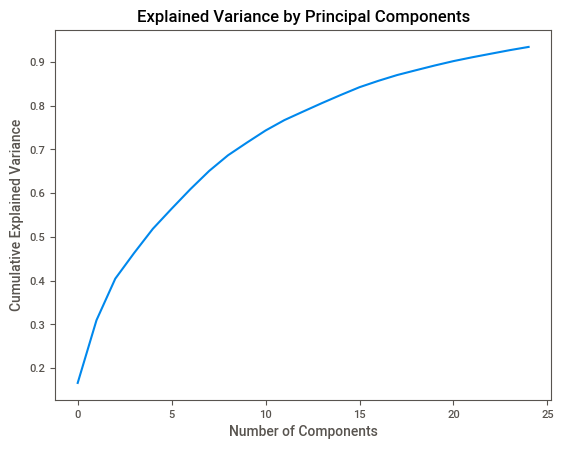

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

PCA does not handle non-linear data as well such as the boolean columns from one-hot encoding.. we need a different strategy for dimensionality reduction.

**Dimensionality Reduction using UMAP to Visualize Data**

In [ ]:
from umap import UMAP

umap_reducer = None

def umap_reduce(df, n_components, dimensionality_reduction_method, **hyperparameters):
    global umap_reducer
    umap_reducer = dimensionality_reduction_method(n_components=n_components, **hyperparameters)
    return umap_reducer.fit_transform(df)


def update_plot(df, n_components, dimensionality_reduction_method, **hyperparameters):
    df_reduced = umap_reduce(df, n_components, dimensionality_reduction_method, **hyperparameters)

    if n_components == 2:
      plotter_method = px.scatter
      components = {"x": 0, "y": 1}
    elif n_components == 3:
      plotter_method = px.scatter_3d
      components = {"x": 0, "y": 1, "z": 2}
    else:
      raise Exception("Only 2 or 3 n_components supported")

    # Create an interactive scatter plot
    fig = plotter_method(df_reduced, **components,
                    #  labels={'x': 'Component 1', 'y': 'Component 2', 'z': 'Component 3'},
                     title=f'{dimensionality_reduction_method.__name__} - {str(hyperparameters)}')
    fig.show()

from functools import partial

def make_partial_function(*args):
  partial_function = partial(update_plot, *args)
  partial_function.__name__ = update_plot.__name__
  return partial_function

In [ ]:
# Create sliders for interactive control of hyperparameters
n_neighbors_slider = widgets.IntSlider(value=25, min=5, max=50, step=1, description='n_neighbors')
min_dist_slider = widgets.FloatSlider(value=0.3, min=0.0, max=0.9, step=0.05, description='min_dist')

# Link sliders to the update function
widgets.interactive(make_partial_function(scaled_df[:1000], 3, UMAP), n_neighbors=n_neighbors_slider, min_dist=min_dist_slider)

interactive(children=(IntSlider(value=25, description='n_neighbors', max=50, min=5), FloatSlider(value=0.3, de…

**Dimensionity Reduction using Trained Autoencoder**

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam

input_dim = scaled_df.shape[1]
autoencoder_dim = 10

input_layer = Input(shape=(input_dim,))
encoded = Dense(autoencoder_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

full_autoencoder = Model(input_layer, decoded)

full_autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')
full_autoencoder.fit(scaled_df, scaled_df, epochs=50, batch_size=256, shuffle=True)

encoder_only = Model(input_layer, encoded)

autoencoded_df = pd.DataFrame(encoder_only.predict(scaled_df))
autoencoded_df.shape

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2165
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1008
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0313
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0246
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0219
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0201
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0189
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0179
Epoch 9/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0169
Epoch 10/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0159
Epoch 11/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0152
Epoch 12/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0144
Epoch 13/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0137
Epoch 14/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0131
Epoch 15/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0126
Epoch 16/50
75/75 ━

(19114, 10)

In [ ]:
autoencoded_df.head()

0         1         2         3         4         5         6  \
0  4.082221  1.924845  0.000000  2.194934  2.093600  0.000000  2.427533   
1  2.308973  1.766056  1.468828  1.038937  1.479708  3.418290  1.682952   
2  2.250215  1.521533  1.454024  2.422480  2.394534  1.739524  2.463829   
3  2.044874  1.135927  1.016549  2.335029  2.416598  1.506937  3.549768   
4  3.969829  1.847767  0.000000  2.116194  2.122893  0.000000  2.363594   

          7         8         9  
0  1.105650  1.326539  2.117138  
1  2.102741  3.330157  4.116569  
2  0.413724  3.241182  0.000000  
3  0.526019  0.862798  0.000000  
4  1.064205  1.166373  2.124217

In [ ]:
plotter_method = px.scatter_3d
components = {"x": 0, "y": 1, "z": 2}

# Create an interactive scatter plot
fig = plotter_method(autoencoded_df, **components, title=f'AutoEncoder')
fig.show()

**Dimensionality Reduction using UMAP**

In [ ]:
umap_reduced_df = pd.DataFrame(umap_reduce(scaled_df, 10, UMAP, n_neighbors=50, min_dist=0.2))

**Save dataframes to disk**

In [ ]:
autoencoded_df.to_csv('autoencoded.csv')
umap_reduced_df.to_csv('umap_reduced.csv')

# **Create Models: Hyperparameter Optimization**

The algorithms that we have finalised upon are:

*   K-Means
*   Hiearchical
*   Birch
*   MeanShift
*   DBSCAN
*   HDBSCAN

Decision based on the following factors:

**K-Means** : K-Means is well-suited for clustering numeric data because it uses Euclidean distance to measure similarity. K-means can handle large datasets, like the one we have, with ease. And rental houses are likely to group naturally into clusters based on size, price, and location, making K-means the go-to choice

**Hierarchical clustering**: For houses, there may be nested groupings and hierarchical clustering can easily figure those out.  It uses distance metrics like Euclidean or Manhattan, making it flexible for housing features and thus making it our one of the top choices

**Density-Based Spatial Clustering of Applications with Noise**: DBSCAN excels in clustering based on spatial data, such as latitude and longitude, which represent rental property locations. It groups data points based on density, making it ideal for identifying clusters of houses in neighborhoods or cities.

In [ ]:
import hdbscan
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import Birch, DBSCAN, KMeans, MeanShift, MiniBatchKMeans, SpectralClustering
from sklearn.mixture import GaussianMixture


def birch_clustering(data, n_clusters=5):
    birch_model = Birch(n_clusters=n_clusters)
    labels = birch_model.fit_predict(data)
    return birch_model, labels


def kmeans_clustering(data, n_clusters=5):
    kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans_model.fit_predict(data)
    return kmeans_model, labels


def meanshift_clustering(data, n_clusters=5):
    meanshift_model = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
    labels = meanshift_model.fit_predict(data)
    return meanshift_model, labels


def minibatch_kmeans_clustering(data, n_clusters=5):
    minibatch_kmeans_model = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
    labels = minibatch_kmeans_model.fit_predict(data)
    return minibatch_kmeans_model, labels


def dbscan_clustering(data, min_samples=15, eps=0.1):
    dbscan_model = DBSCAN(min_samples=min_samples, eps=eps)
    labels = dbscan_model.fit_predict(data)
    return dbscan_model, labels


def hdbscan_clustering(data, min_samples=15, min_cluster_size=15, prediction_data=False):
    hdbscan_model = hdbscan.HDBSCAN(min_samples=min_samples, min_cluster_size=min_cluster_size, prediction_data=prediction_data)
    labels = hdbscan_model.fit_predict(data)
    return hdbscan_model, labels


def hierarchical_clustering(data, method='ward', n_clusters=5):
    Z = linkage(data, method=method)
    labels = fcluster(Z, t=n_clusters, criterion='maxclust')
    return Z, labels


#
# Not used due taking forever to train models
#
def spectral_clustering(data, n_clusters=5):
    spectral_model = SpectralClustering(n_clusters=n_clusters, random_state=42)
    labels = spectral_model.fit_predict(data)
    return spectral_model, labels


#
# Not used due to error:
#
#   FloatingPointError: underflow encountered in exp
#
def gaussian_mixture_clustering(data, n_clusters=5):
    gmm_model = GaussianMixture(n_components=n_clusters, random_state=42)
    labels = gmm_model.fit_predict(data)
    return gmm_model, labels



In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score, calinski_harabasz_score

def compute_clustering_metrics(df,
                               cluster_function,
                               compute_inertia_scores=False,
                               compute_silhouette_scores=True,
                               compute_davies_bouldin_scores=True,
                               compute_calinski_harabasz_scores=True):
    inertia_scores = []
    silhouette_scores = []
    davies_bouldin_scores = []
    calinski_harabasz_scores = []

    for num_clusters in range(2, 20):
        print(f"Computing Metrics for num_clusters={num_clusters}")

        model, labels = cluster_function(df, n_clusters=num_clusters)

        if compute_inertia_scores:
            inertia_scores.append(model.inertia_)
        if compute_silhouette_scores:
            silhouette_scores.append(silhouette_score(df, labels))
        if compute_davies_bouldin_scores:
            davies_bouldin_scores.append(davies_bouldin_score(df, labels))
        if compute_calinski_harabasz_scores:
            calinski_harabasz_scores.append(calinski_harabasz_score(df, labels))

    return inertia_scores, silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores


def compute_dbscan_clustering_metrics(df,
                                      cluster_function,
                                      compute_silhouette_scores=True,
                                      compute_davies_bouldin_scores=True,
                                      compute_calinski_harabasz_scores=True):
    # min_samples_range = range(5, 51, 5)        # 5, 10, 15, 20, 25, 30, 35, 40, 45, 50
    # min_cluster_size_range = range(5, 51, 5)   # 5, 10, 15, 20, 25, 30, 35, 40, 45, 50

    eps_range = [x / 10.0 for x in range(1, 10, 2)]        # 0.1, 0.3, 0.5, 0.7, 0.9
    min_samples_range = range(10, 51, 10)   # 10, 20, 30, 40, 50

    silhouette_scores = np.zeros((len(min_samples_range), len(eps_range)))
    davies_bouldin_scores = np.zeros((len(min_samples_range), len(eps_range)))
    calinski_harabasz_scores = np.zeros((len(min_samples_range), len(eps_range)))

    for i, min_samples in enumerate(min_samples_range):
        for j, eps in enumerate(eps_range):
            print(f"Computing Metrics for min_samples={min_samples}, eps={eps}")

            model, labels = cluster_function(df, min_samples=min_samples, eps=eps)
            valid_labels = labels != -1 # -1 is noise point

            silhouette_scores[i, j] = silhouette_score(df[valid_labels], labels[valid_labels])
            davies_bouldin_scores[i, j] = davies_bouldin_score(df[valid_labels], labels[valid_labels])
            calinski_harabasz_scores[i, j] = calinski_harabasz_score(df[valid_labels], labels[valid_labels])

    return eps_range, min_samples_range, silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores


def compute_hdbscan_clustering_metrics(df,
                                      cluster_function,
                                      compute_silhouette_scores=True,
                                      compute_davies_bouldin_scores=True,
                                      compute_calinski_harabasz_scores=True):
    # min_samples_range = range(5, 51, 5)        # 5, 10, 15, 20, 25, 30, 35, 40, 45, 50
    # min_cluster_size_range = range(5, 51, 5)   # 5, 10, 15, 20, 25, 30, 35, 40, 45, 50

    min_samples_range = range(10, 51, 10)        # 10, 20, 30, 40, 50
    min_cluster_size_range = range(10, 51, 10)   # 10, 20, 30, 40, 50

    silhouette_scores = np.zeros((len(min_samples_range), len(min_cluster_size_range)))
    davies_bouldin_scores = np.zeros((len(min_samples_range), len(min_cluster_size_range)))
    calinski_harabasz_scores = np.zeros((len(min_samples_range), len(min_cluster_size_range)))

    for i, min_samples in enumerate(min_samples_range):
        for j, min_cluster_size in enumerate(min_cluster_size_range):
            print(f"Computing Metrics for min_samples={min_samples}, min_cluster_size={min_cluster_size}")

            model, labels = cluster_function(df, min_samples=min_samples, min_cluster_size=min_cluster_size)
            valid_labels = labels != -1 # -1 is noise point

            silhouette_scores[i, j] = silhouette_score(df[valid_labels], labels[valid_labels])
            davies_bouldin_scores[i, j] = davies_bouldin_score(df[valid_labels], labels[valid_labels])
            calinski_harabasz_scores[i, j] = calinski_harabasz_score(df[valid_labels], labels[valid_labels])

    return min_cluster_size_range, min_samples_range, silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores

In [ ]:
def show_clustering_plots(inertia_scores, silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores, cluster_function_name):
    if inertia_scores:
        print("Elbow Plot (Lower is better)")
        plt.figure(figsize=(8,6))
        plt.plot(range(2, 20), inertia_scores)
        plt.xlabel(f"Number of {cluster_function_name} Clusters")
        plt.ylabel("Inertia of Cluster")
        plt.grid(True)
        plt.title("KMeans Elbow Plot")
        plt.show()
        print("\n")

    if silhouette_scores:
        print("Silhouette Plot (Higher is better)")
        plt.figure(figsize=(8,6))
        plt.plot(range(2, 20), silhouette_scores)
        plt.xlabel(f"Number of {cluster_function_name} Clusters")
        plt.ylabel("Silhouette Score of Cluster")
        plt.grid(True)
        plt.title("Silhouette Score vs. Num Clusters Plot")
        plt.show()
        print("\n")

    if davies_bouldin_scores:
        print("Davies Bouldin Plot (Lower is better)")
        plt.figure(figsize=(8,6))
        plt.plot(range(2, 20), davies_bouldin_scores)
        plt.xlabel(f"Number of {cluster_function_name} Clusters")
        plt.ylabel("Davies Bouldin Score of Cluster")
        plt.grid(True)
        plt.title("Davies Bouldin vs. Num Clusters Plot")
        plt.show()
        print("\n")

    if calinski_harabasz_scores:
        print("Calinski Harabasz Plot (Higher is better)")
        plt.figure(figsize=(8,6))
        plt.plot(range(2, 20), calinski_harabasz_scores)
        plt.xlabel(f"Number of {cluster_function_name} Clusters")
        plt.ylabel("Calinski Harabasz Score of Cluster")
        plt.grid(True)
        plt.title("Calinski Harabasz Score vs. Num Clusters Plot")
        plt.show()


def show_dbscan_clustering_plots(silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores, cluster_function_name, min_samples_range, eps_range):
    if silhouette_scores.any():
        print("Silhouette Plot (Higher is better)")
        plt.figure(figsize=(8,6))
        sns.heatmap(silhouette_scores, xticklabels=min_samples_range, yticklabels=eps_range, cmap='coolwarm', fmt='.3f')
        plt.xlabel("min_samples hyperparameter")
        plt.ylabel("eps hyperparameter")
        plt.title("Silhouette Scores for varying min_samples and min_cluster_size")
        plt.show()
        print("\n")

    if davies_bouldin_scores.any():
        print("Davies Bouldin Plot (Lower is better)")
        plt.figure(figsize=(8,6))
        sns.heatmap(davies_bouldin_scores, xticklabels=min_samples_range, yticklabels=eps_range, cmap='coolwarm', fmt='.3f')
        plt.xlabel("min_samples hyperparameter")
        plt.ylabel("eps hyperparameter")
        plt.title("Davis Bouldin Scores for varying min_samples and eps")
        plt.show()
        print("\n")

    if calinski_harabasz_scores.any():
        print("Calinski Harabasz Plot (Higher is better)")
        plt.figure(figsize=(8,6))
        sns.heatmap(calinski_harabasz_scores, xticklabels=min_samples_range, yticklabels=eps_range, cmap='coolwarm', fmt='.3f')
        plt.xlabel("min_samples hyperparameter")
        plt.ylabel("eps hyperparameter")
        plt.title("Calinski Harabasz Scores for varying min_samples and eps")
        plt.show()


def show_hdbscan_clustering_plots(silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores, cluster_function_name, min_samples_range, min_cluster_size_range):
    if silhouette_scores.any():
        print("Silhouette Plot (Higher is better)")
        plt.figure(figsize=(8,6))
        sns.heatmap(silhouette_scores, xticklabels=min_cluster_size_range, yticklabels=min_samples_range, cmap='coolwarm', fmt='.3f')
        plt.xlabel("min_cluster_size hyperparameter")
        plt.ylabel("min_samples hyperparameter")
        plt.title("Silhouette Scores for varying min_samples and min_cluster_size")
        plt.show()
        print("\n")

    if davies_bouldin_scores.any():
        print("Davies Bouldin Plot (Lower is better)")
        plt.figure(figsize=(8,6))
        sns.heatmap(davies_bouldin_scores, xticklabels=min_cluster_size_range, yticklabels=min_samples_range, cmap='coolwarm', fmt='.3f')
        plt.xlabel("min_cluster_size hyperparameter")
        plt.ylabel("min_samples hyperparameter")
        plt.title("Davis Bouldin Scores for varying min_samples and min_cluster_size")
        plt.show()
        print("\n")

    if calinski_harabasz_scores.any():
        print("Calinski Harabasz Plot (Higher is better)")
        plt.figure(figsize=(8,6))
        sns.heatmap(calinski_harabasz_scores, xticklabels=min_cluster_size_range, yticklabels=min_samples_range, cmap='coolwarm', fmt='.3f')
        plt.xlabel("min_cluster_size hyperparameter")
        plt.ylabel("min_samples hyperparameter")
        plt.title("Calinski Harabasz Scores for varying min_samples and min_cluster_size")
        plt.show()

# **Minibatch KMeans**

In [ ]:
clustering_function = minibatch_kmeans_clustering

**Compute and Plot Scores for Autoencoded Data**

Computing Metrics for num_clusters=2
Computing Metrics for num_clusters=3
Computing Metrics for num_clusters=4
Computing Metrics for num_clusters=5
Computing Metrics for num_clusters=6
Computing Metrics for num_clusters=7
Computing Metrics for num_clusters=8
Computing Metrics for num_clusters=9
Computing Metrics for num_clusters=10
Computing Metrics for num_clusters=11
Computing Metrics for num_clusters=12
Computing Metrics for num_clusters=13
Computing Metrics for num_clusters=14
Computing Metrics for num_clusters=15
Computing Metrics for num_clusters=16
Computing Metrics for num_clusters=17
Computing Metrics for num_clusters=18
Computing Metrics for num_clusters=19
Elbow Plot (Lower is better)


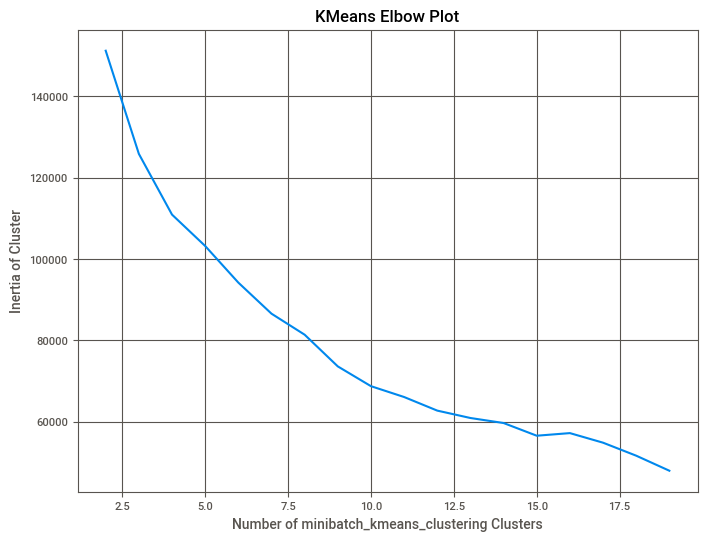



Silhouette Plot (Higher is better)


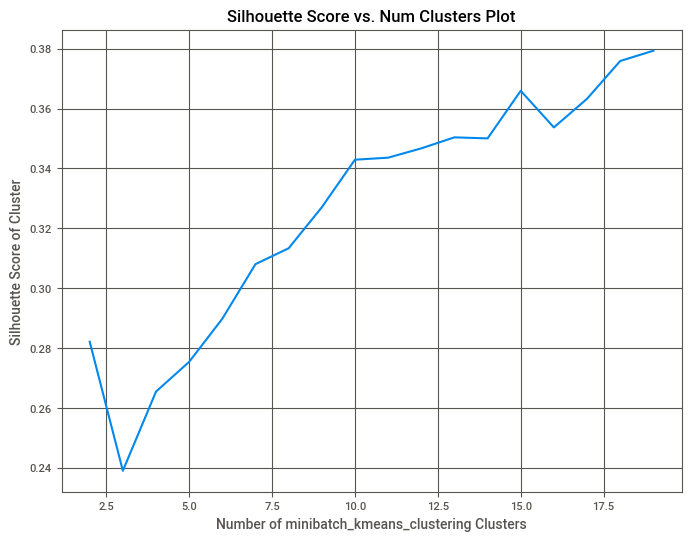



Davies Bouldin Plot (Lower is better)


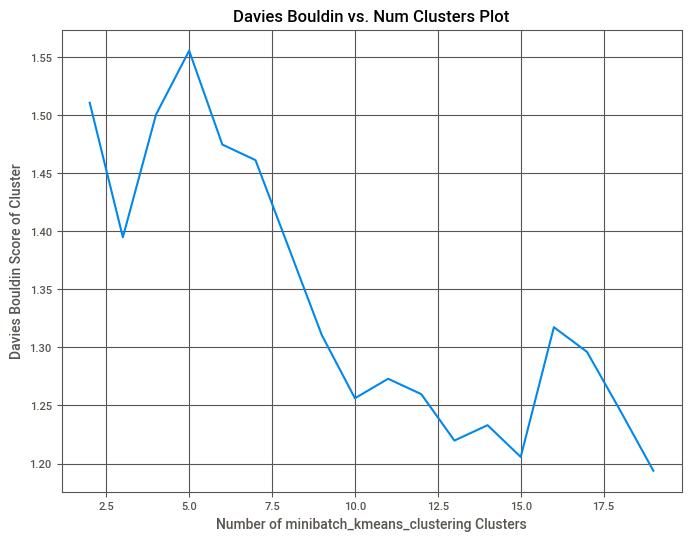



Calinski Harabasz Plot (Higher is better)


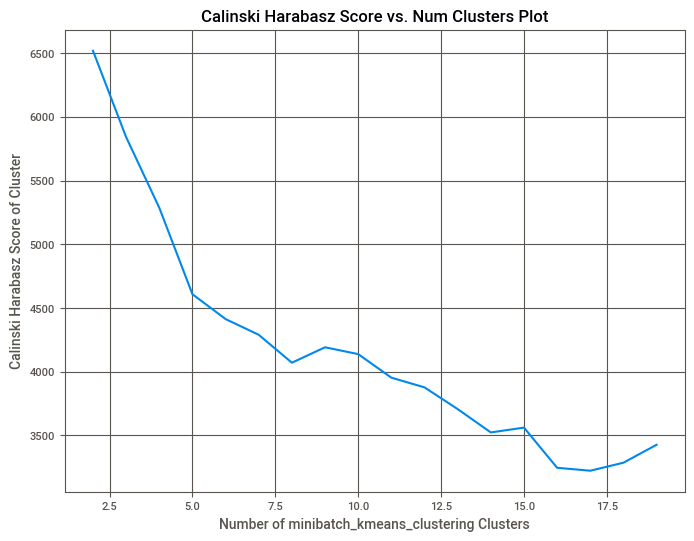

In [ ]:
inertia_scores, silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores = compute_clustering_metrics(autoencoded_df, clustering_function, compute_inertia_scores=True)
show_clustering_plots(inertia_scores, silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores, clustering_function.__name__)

**Compute and Plot Scores for UMAP Reduced Data**

Computing Metrics for num_clusters=2
Computing Metrics for num_clusters=3
Computing Metrics for num_clusters=4
Computing Metrics for num_clusters=5
Computing Metrics for num_clusters=6
Computing Metrics for num_clusters=7
Computing Metrics for num_clusters=8
Computing Metrics for num_clusters=9
Computing Metrics for num_clusters=10
Computing Metrics for num_clusters=11
Computing Metrics for num_clusters=12
Computing Metrics for num_clusters=13
Computing Metrics for num_clusters=14
Computing Metrics for num_clusters=15
Computing Metrics for num_clusters=16
Computing Metrics for num_clusters=17
Computing Metrics for num_clusters=18
Computing Metrics for num_clusters=19
Elbow Plot (Lower is better)


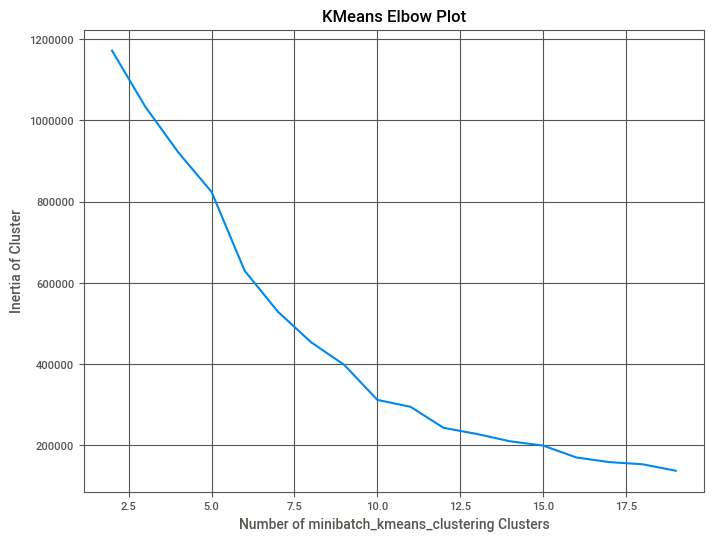



Silhouette Plot (Higher is better)


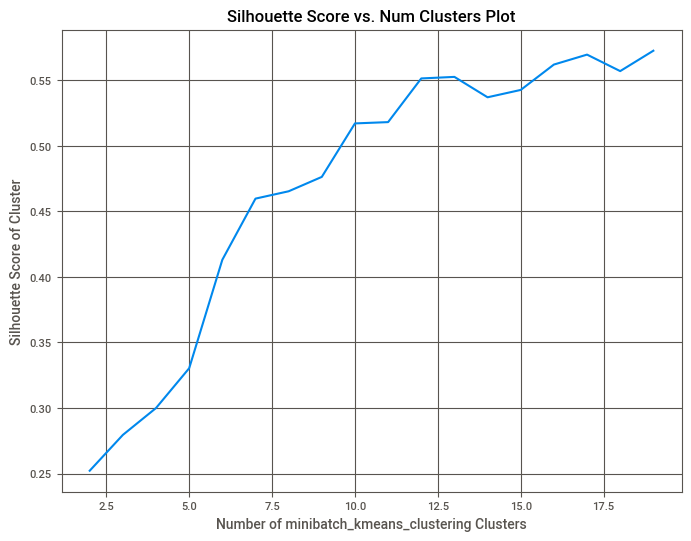



Davies Bouldin Plot (Lower is better)


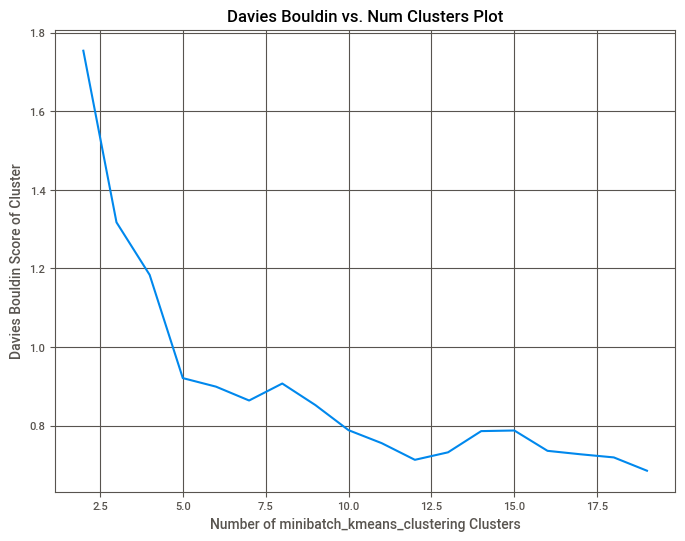



Calinski Harabasz Plot (Higher is better)


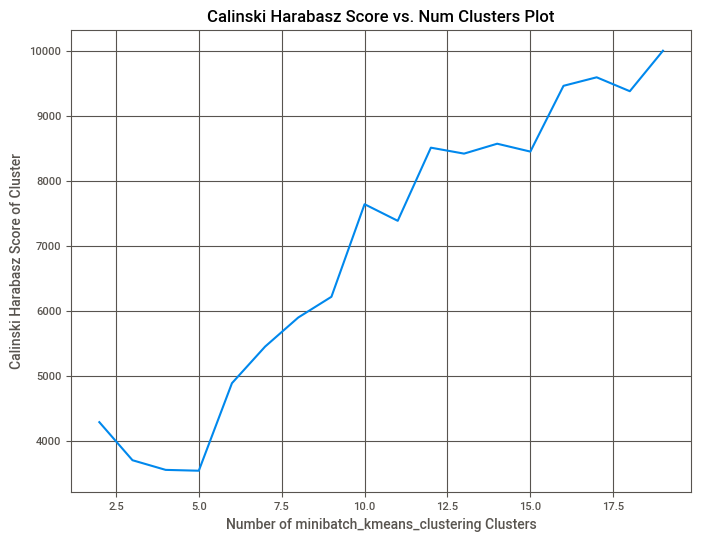

In [ ]:
inertia_scores, silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores = compute_clustering_metrics(umap_reduced_df, clustering_function, compute_inertia_scores=True)
show_clustering_plots(inertia_scores, silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores, clustering_function.__name__)

# **Conclusions from KMeans Analysis**

Autoencoded Data:
* n_clusters = 13 has low inertia, high silhouette, and low davies bouldin, however, calinski harabasz score is not maximized

UMAP Reduced Data:
* n_clusters = 15 has very low inertia, is the max peak of silhouette, is the min trough of davies bouldin, and has very high calinski harabasz scores

Final Selection: n_clusters=15 with UMAP

# **Agglomerative (Hierarchical Clustering)**

In [ ]:
clustering_function = hierarchical_clustering

**Compute and Plot Scores for Autoencoded Data**

Computing Metrics for num_clusters=2
Computing Metrics for num_clusters=3
Computing Metrics for num_clusters=4
Computing Metrics for num_clusters=5
Computing Metrics for num_clusters=6
Computing Metrics for num_clusters=7
Computing Metrics for num_clusters=8
Computing Metrics for num_clusters=9
Computing Metrics for num_clusters=10
Computing Metrics for num_clusters=11
Computing Metrics for num_clusters=12
Computing Metrics for num_clusters=13
Computing Metrics for num_clusters=14
Computing Metrics for num_clusters=15
Computing Metrics for num_clusters=16
Computing Metrics for num_clusters=17
Computing Metrics for num_clusters=18
Computing Metrics for num_clusters=19
Silhouette Plot (Higher is better)


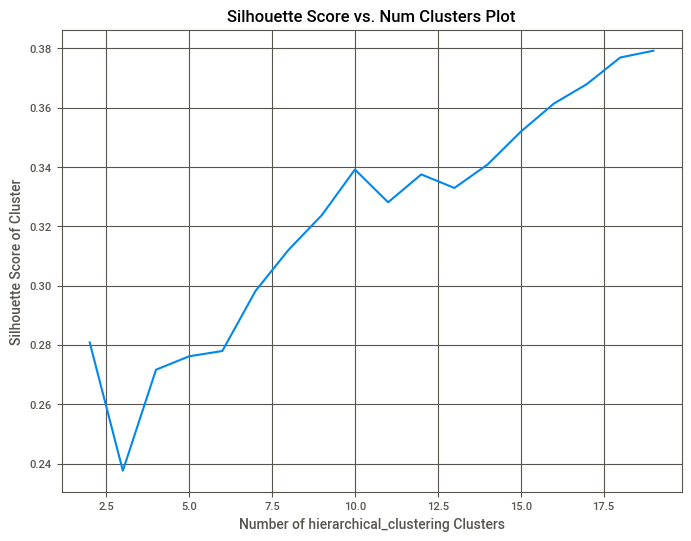



Davies Bouldin Plot (Lower is better)


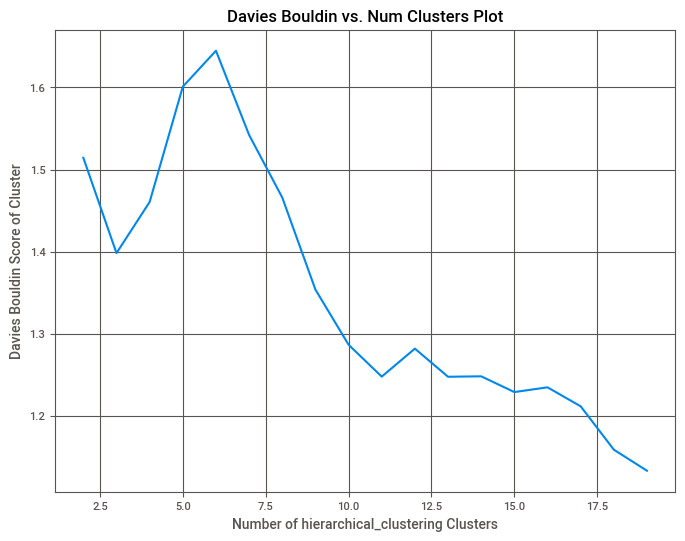



Calinski Harabasz Plot (Higher is better)


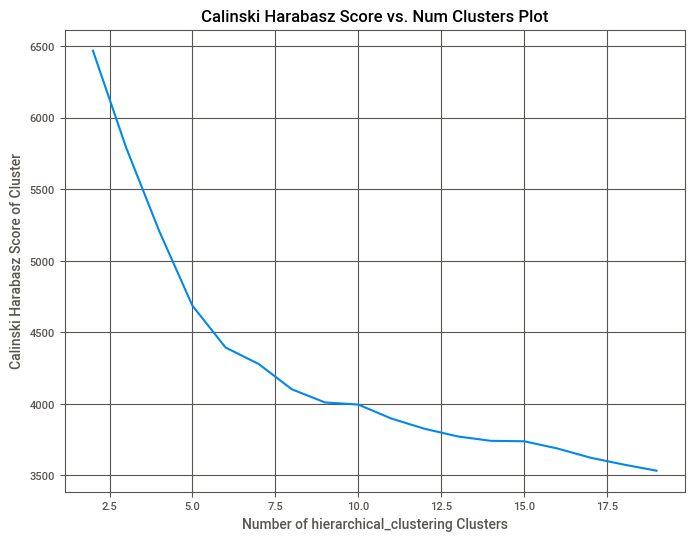

In [ ]:
_, silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores = compute_clustering_metrics(autoencoded_df, clustering_function)
show_clustering_plots([], silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores, clustering_function.__name__)

**Compute and Plot Scores for UMAP Reduced Data**

Computing Metrics for num_clusters=2
Computing Metrics for num_clusters=3
Computing Metrics for num_clusters=4
Computing Metrics for num_clusters=5
Computing Metrics for num_clusters=6
Computing Metrics for num_clusters=7
Computing Metrics for num_clusters=8
Computing Metrics for num_clusters=9
Computing Metrics for num_clusters=10
Computing Metrics for num_clusters=11
Computing Metrics for num_clusters=12
Computing Metrics for num_clusters=13
Computing Metrics for num_clusters=14
Computing Metrics for num_clusters=15
Computing Metrics for num_clusters=16
Computing Metrics for num_clusters=17
Computing Metrics for num_clusters=18
Computing Metrics for num_clusters=19
Silhouette Plot (Higher is better)


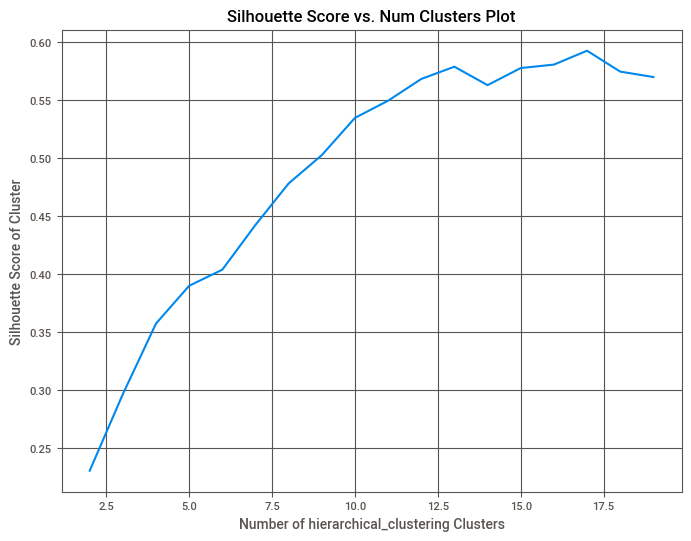



Davies Bouldin Plot (Lower is better)


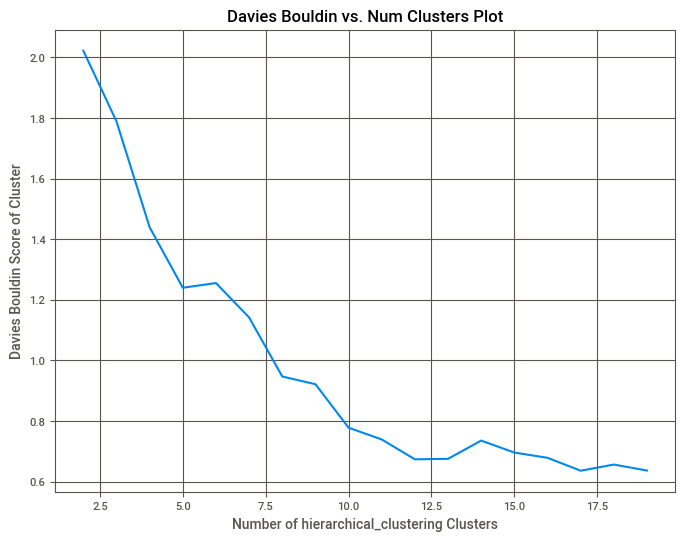



Calinski Harabasz Plot (Higher is better)


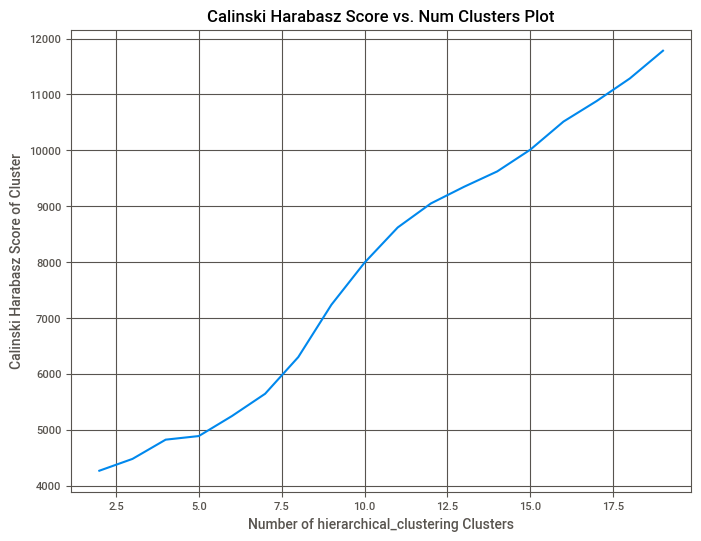

In [ ]:
_, silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores = compute_clustering_metrics(umap_reduced_df, clustering_function)
show_clustering_plots([], silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores, clustering_function.__name__)

# **Conclusions from Hierarchical Analysis**

Autoencoded Data:
* n_clusters = 14 has high silhouette, and low davies bouldin, however, calinski harabasz score is not maximized

UMAP Reduced Data:
* n_clusters = 14 is the max peak of silhouette, is the min trough of davies bouldin, and has very high calinski harabasz scores

Final Selection: n_clusters=14 with UMAP

# **Birch**

In [ ]:
clustering_function = birch_clustering

**Compute and Plot Scores for Autoencoded Data**

Computing Metrics for num_clusters=2
Computing Metrics for num_clusters=3
Computing Metrics for num_clusters=4
Computing Metrics for num_clusters=5
Computing Metrics for num_clusters=6
Computing Metrics for num_clusters=7
Computing Metrics for num_clusters=8
Computing Metrics for num_clusters=9
Computing Metrics for num_clusters=10
Computing Metrics for num_clusters=11
Computing Metrics for num_clusters=12
Computing Metrics for num_clusters=13
Computing Metrics for num_clusters=14
Computing Metrics for num_clusters=15
Computing Metrics for num_clusters=16
Computing Metrics for num_clusters=17
Computing Metrics for num_clusters=18
Computing Metrics for num_clusters=19
Silhouette Plot (Higher is better)


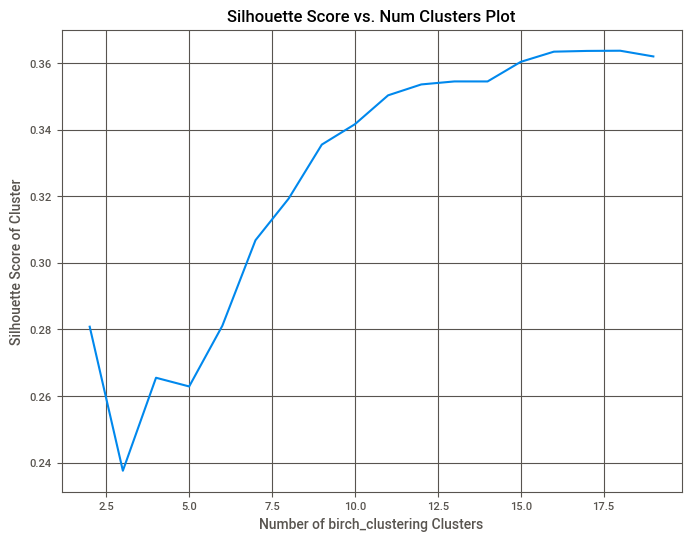



Davies Bouldin Plot (Lower is better)


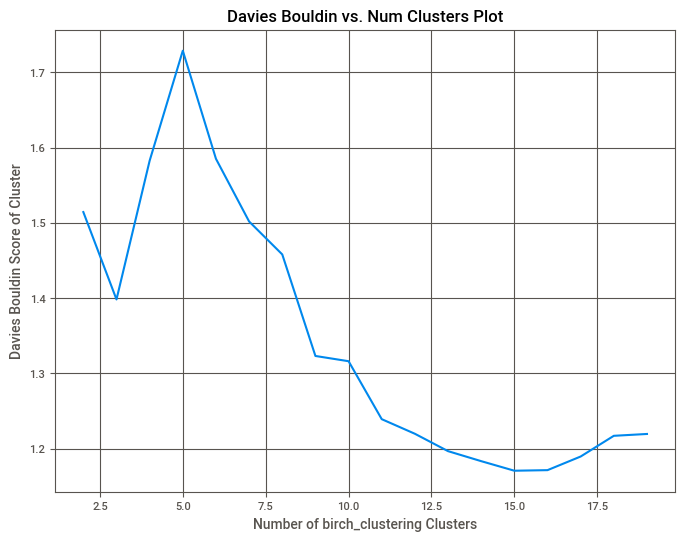



Calinski Harabasz Plot (Higher is better)


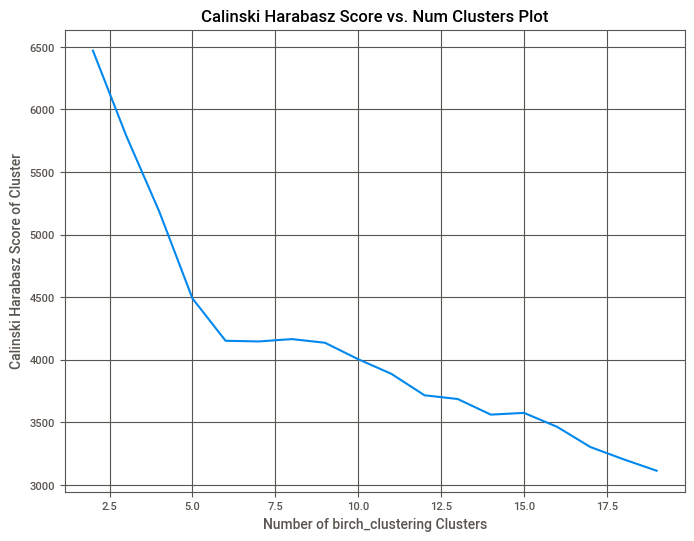

In [ ]:
_, silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores = compute_clustering_metrics(autoencoded_df, clustering_function)
show_clustering_plots([], silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores, clustering_function.__name__)

**Compute and Plot Scores for UMAP Reduced Data**

Computing Metrics for num_clusters=2
Computing Metrics for num_clusters=3
Computing Metrics for num_clusters=4
Computing Metrics for num_clusters=5
Computing Metrics for num_clusters=6
Computing Metrics for num_clusters=7
Computing Metrics for num_clusters=8
Computing Metrics for num_clusters=9
Computing Metrics for num_clusters=10
Computing Metrics for num_clusters=11
Computing Metrics for num_clusters=12
Computing Metrics for num_clusters=13
Computing Metrics for num_clusters=14
Computing Metrics for num_clusters=15
Computing Metrics for num_clusters=16
Computing Metrics for num_clusters=17
Computing Metrics for num_clusters=18
Computing Metrics for num_clusters=19
Silhouette Plot (Higher is better)


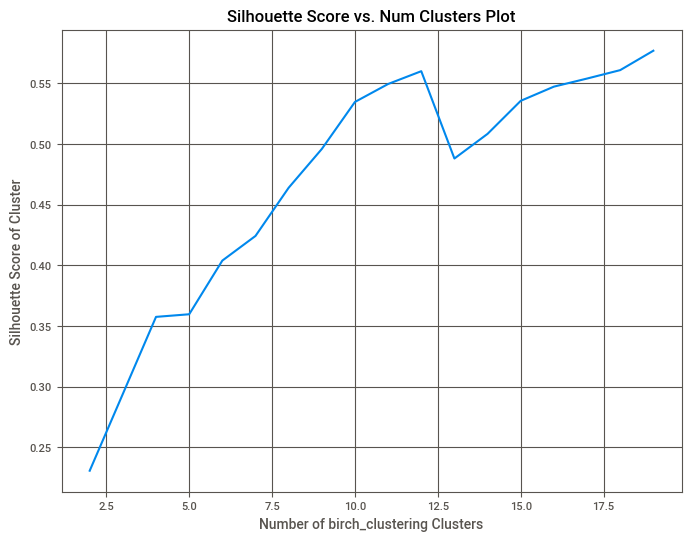



Davies Bouldin Plot (Lower is better)


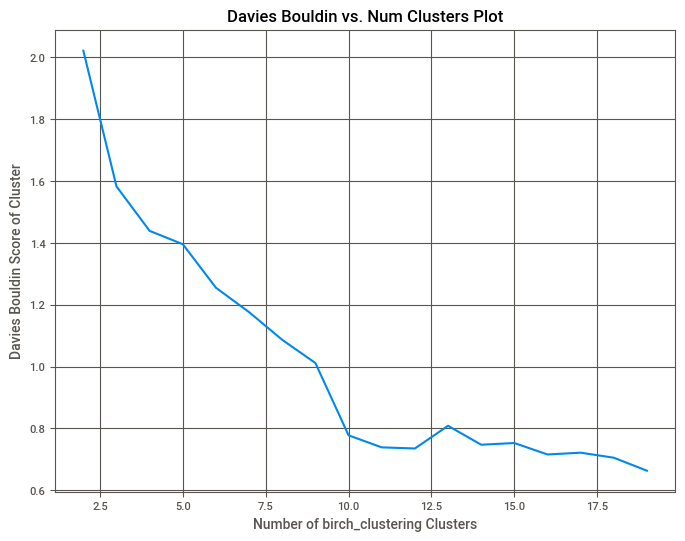



Calinski Harabasz Plot (Higher is better)


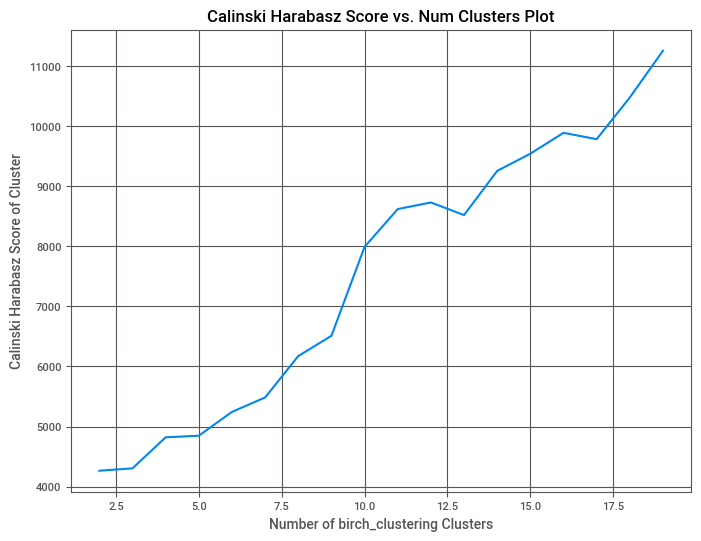

In [ ]:
_, silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores = compute_clustering_metrics(umap_reduced_df, clustering_function)
show_clustering_plots([], silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores, clustering_function.__name__)

# **Conclusions from Birch Analysis**

Autoencoded Data:
* n_clusters = 17 has high silhouette, and is the minimum trough of davies bouldin, however, calinski harabasz score is not maximized

UMAP Reduced Data:
* n_clusters = 19 is the max peak of silhouette, is the min trough of davies bouldin, and is the max peak of calinski harabasz scores

Final Selection: n_clusters=19 with UMAP

# **Meanshift**

In [ ]:
clustering_function = meanshift_clustering

**Compute and Plot Scores for Autoencoded Data**

Computing Metrics for num_clusters=2
Computing Metrics for num_clusters=3
Computing Metrics for num_clusters=4
Computing Metrics for num_clusters=5
Computing Metrics for num_clusters=6
Computing Metrics for num_clusters=7
Computing Metrics for num_clusters=8
Computing Metrics for num_clusters=9
Computing Metrics for num_clusters=10
Computing Metrics for num_clusters=11
Computing Metrics for num_clusters=12
Computing Metrics for num_clusters=13
Computing Metrics for num_clusters=14
Computing Metrics for num_clusters=15
Computing Metrics for num_clusters=16
Computing Metrics for num_clusters=17
Computing Metrics for num_clusters=18
Computing Metrics for num_clusters=19
Silhouette Plot (Higher is better)


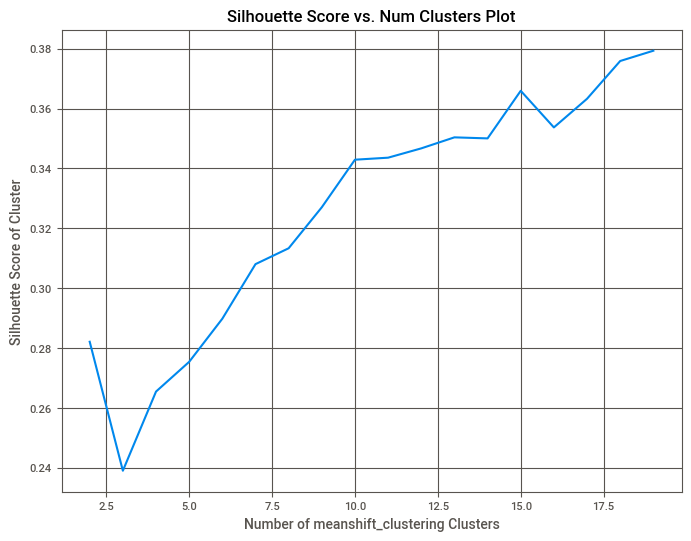



Davies Bouldin Plot (Lower is better)


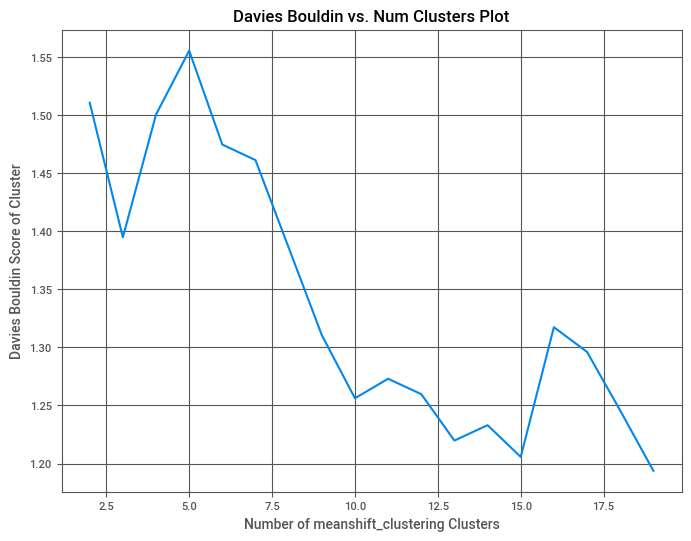



Calinski Harabasz Plot (Higher is better)


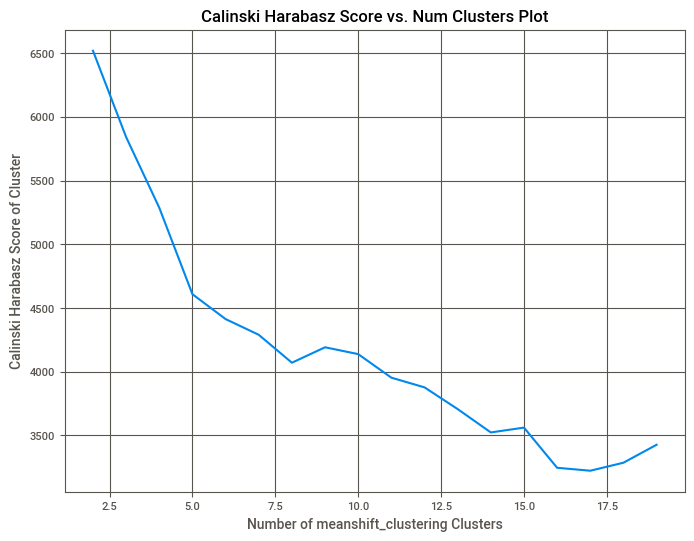

In [ ]:
_, silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores = compute_clustering_metrics(autoencoded_df, clustering_function)
show_clustering_plots([], silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores, clustering_function.__name__)

**Compute and Plot Scores for UMAP Reduced Data**

Computing Metrics for num_clusters=2
Computing Metrics for num_clusters=3
Computing Metrics for num_clusters=4
Computing Metrics for num_clusters=5
Computing Metrics for num_clusters=6
Computing Metrics for num_clusters=7
Computing Metrics for num_clusters=8
Computing Metrics for num_clusters=9
Computing Metrics for num_clusters=10
Computing Metrics for num_clusters=11
Computing Metrics for num_clusters=12
Computing Metrics for num_clusters=13
Computing Metrics for num_clusters=14
Computing Metrics for num_clusters=15
Computing Metrics for num_clusters=16
Computing Metrics for num_clusters=17
Computing Metrics for num_clusters=18
Computing Metrics for num_clusters=19
Silhouette Plot (Higher is better)


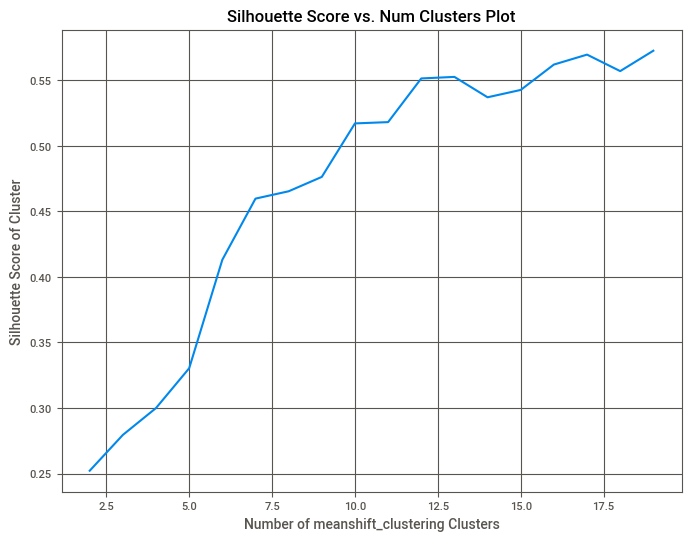



Davies Bouldin Plot (Lower is better)


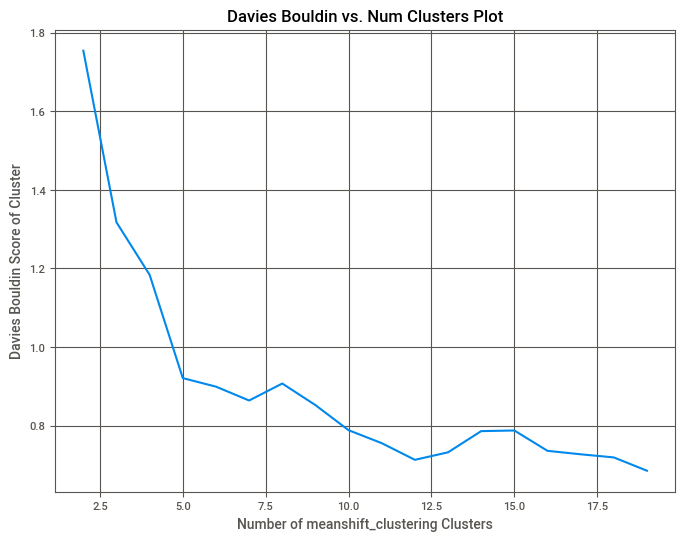



Calinski Harabasz Plot (Higher is better)


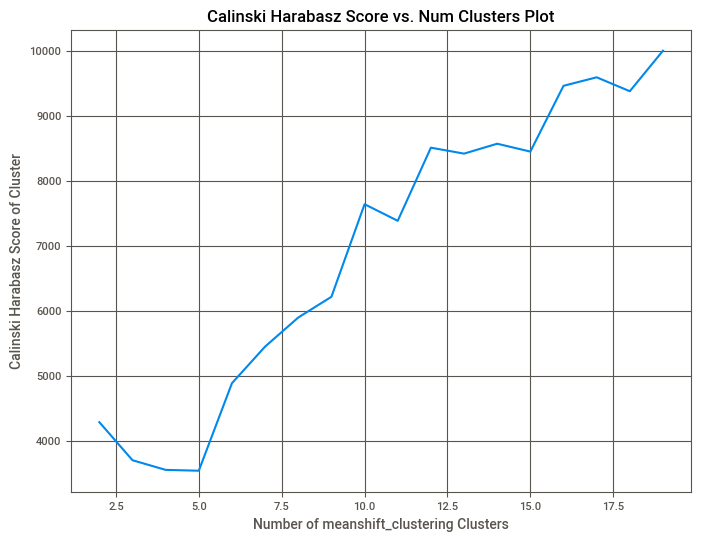

In [ ]:
_, silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores = compute_clustering_metrics(umap_reduced_df, clustering_function)
show_clustering_plots([], silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores, clustering_function.__name__)

# **Conclusions from Meanshift Analysis**

Autoencoded Data:
* n_clusters = 18 has high silhouette, low davies bouldin, however, calinski harabasz score is not maximized but it is small peak

UMAP Reduced Data:
* n_clusters = 15 is the max peak of silhouette, is the min trough of davies bouldin, and is high calinski harabasz score

Final Selection: n_clusters=15 with UMAP

# **DBSCAN**

In [ ]:
clustering_function = dbscan_clustering

**Compute and Plot Scores for Autoencoded Data**

Computing Metrics for min_samples=10, eps=0.1
Computing Metrics for min_samples=10, eps=0.3
Computing Metrics for min_samples=10, eps=0.5
Computing Metrics for min_samples=10, eps=0.7
Computing Metrics for min_samples=10, eps=0.9
Computing Metrics for min_samples=20, eps=0.1
Computing Metrics for min_samples=20, eps=0.3
Computing Metrics for min_samples=20, eps=0.5
Computing Metrics for min_samples=20, eps=0.7
Computing Metrics for min_samples=20, eps=0.9
Computing Metrics for min_samples=30, eps=0.1
Computing Metrics for min_samples=30, eps=0.3
Computing Metrics for min_samples=30, eps=0.5
Computing Metrics for min_samples=30, eps=0.7
Computing Metrics for min_samples=30, eps=0.9
Computing Metrics for min_samples=40, eps=0.1
Computing Metrics for min_samples=40, eps=0.3
Computing Metrics for min_samples=40, eps=0.5
Computing Metrics for min_samples=40, eps=0.7
Computing Metrics for min_samples=40, eps=0.9
Computing Metrics for min_samples=50, eps=0.1
Computing Metrics for min_samples=

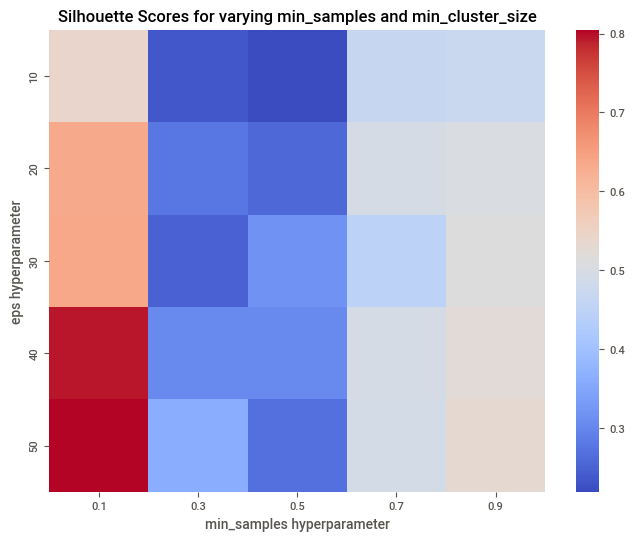



Davies Bouldin Plot (Lower is better)


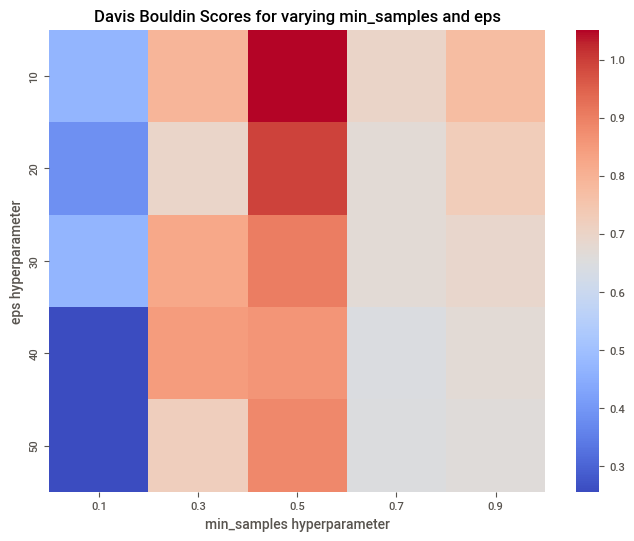



Calinski Harabasz Plot (Higher is better)


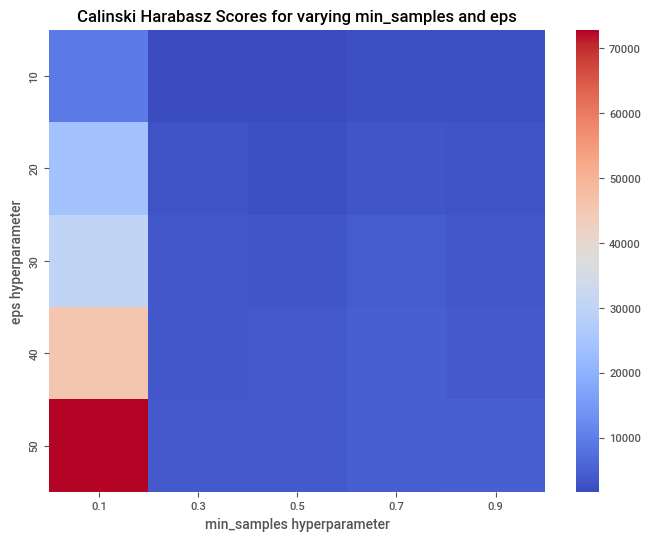

In [ ]:
eps_range, min_samples_range, silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores = compute_dbscan_clustering_metrics(autoencoded_df, clustering_function)
show_dbscan_clustering_plots(silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores, clustering_function.__name__, eps_range, min_samples_range)

**Compute and Plot Scores for UMAP Reduced Data**

Computing Metrics for min_samples=10, eps=0.1
Computing Metrics for min_samples=10, eps=0.3
Computing Metrics for min_samples=10, eps=0.5
Computing Metrics for min_samples=10, eps=0.7
Computing Metrics for min_samples=10, eps=0.9
Computing Metrics for min_samples=20, eps=0.1
Computing Metrics for min_samples=20, eps=0.3
Computing Metrics for min_samples=20, eps=0.5
Computing Metrics for min_samples=20, eps=0.7
Computing Metrics for min_samples=20, eps=0.9
Computing Metrics for min_samples=30, eps=0.1
Computing Metrics for min_samples=30, eps=0.3
Computing Metrics for min_samples=30, eps=0.5
Computing Metrics for min_samples=30, eps=0.7
Computing Metrics for min_samples=30, eps=0.9
Computing Metrics for min_samples=40, eps=0.1
Computing Metrics for min_samples=40, eps=0.3
Computing Metrics for min_samples=40, eps=0.5
Computing Metrics for min_samples=40, eps=0.7
Computing Metrics for min_samples=40, eps=0.9
Computing Metrics for min_samples=50, eps=0.1
Computing Metrics for min_samples=

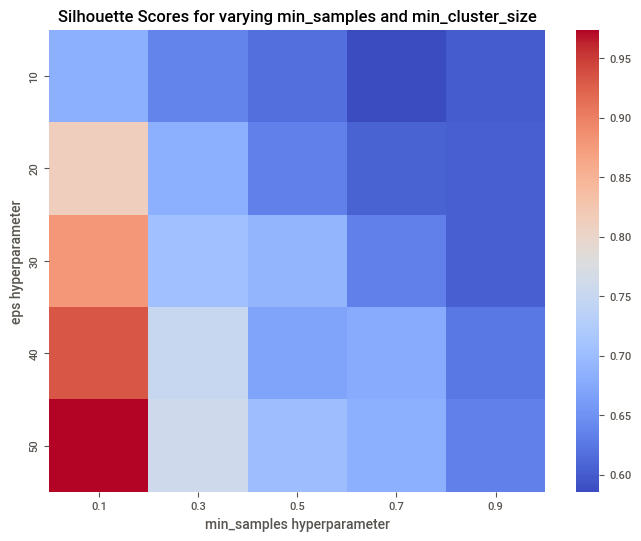



Davies Bouldin Plot (Lower is better)


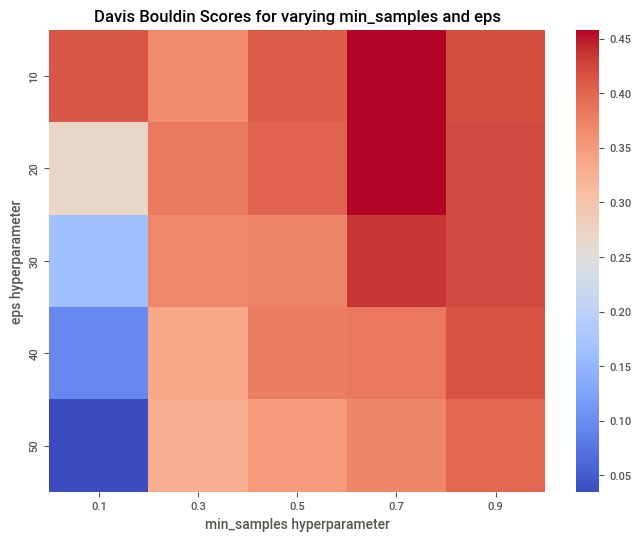



Calinski Harabasz Plot (Higher is better)


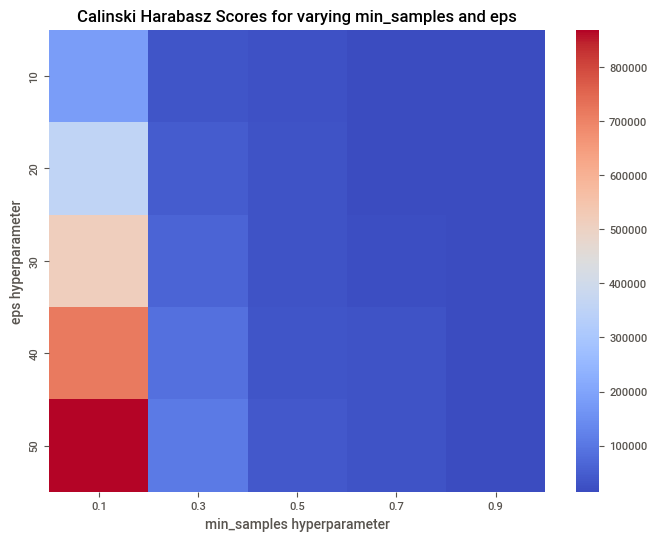

In [ ]:
eps_range, min_samples_range, silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores = compute_dbscan_clustering_metrics(umap_reduced_df, clustering_function)
show_dbscan_clustering_plots(silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores, clustering_function.__name__, eps_range, min_samples_range)

# **Conclusions from DBSCAN Analysis**

Autoencoded Data:
* min_samples=50 and eps=0.1 has max peak silhouette, min trough davies bouldin, and max peak calinski harabasz scores

UMAP Reduced Data:
* min_samples=50 and eps=0.1 has max peak silhouette, min trough davies bouldin, and max peak calinski harabasz scores

Final Selection: min_samples=50 and eps=0.1 with UMAP because UMAP has higher silhouette (0.9 vs. 0.8), lower davies bouldin (0.05 vs. 0.3) and higher calinski harabasz scores (800,000 vs. 70,000)

# **HDBSCAN**

In [ ]:
clustering_function = hdbscan_clustering

**Compute and Plot Scores for Autoencoded Data**

Computing Metrics for min_samples=10, min_cluster_size=10
Computing Metrics for min_samples=10, min_cluster_size=20
Computing Metrics for min_samples=10, min_cluster_size=30
Computing Metrics for min_samples=10, min_cluster_size=40
Computing Metrics for min_samples=10, min_cluster_size=50
Computing Metrics for min_samples=20, min_cluster_size=10
Computing Metrics for min_samples=20, min_cluster_size=20
Computing Metrics for min_samples=20, min_cluster_size=30
Computing Metrics for min_samples=20, min_cluster_size=40
Computing Metrics for min_samples=20, min_cluster_size=50
Computing Metrics for min_samples=30, min_cluster_size=10
Computing Metrics for min_samples=30, min_cluster_size=20
Computing Metrics for min_samples=30, min_cluster_size=30
Computing Metrics for min_samples=30, min_cluster_size=40
Computing Metrics for min_samples=30, min_cluster_size=50
Computing Metrics for min_samples=40, min_cluster_size=10
Computing Metrics for min_samples=40, min_cluster_size=20
Computing Metr

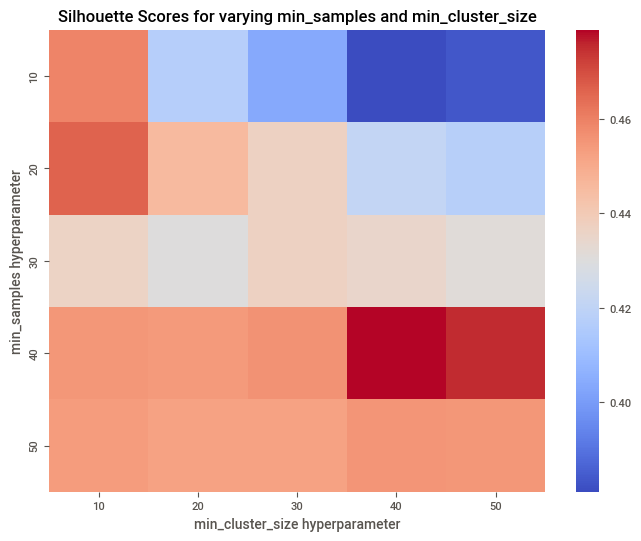



Davies Bouldin Plot (Lower is better)


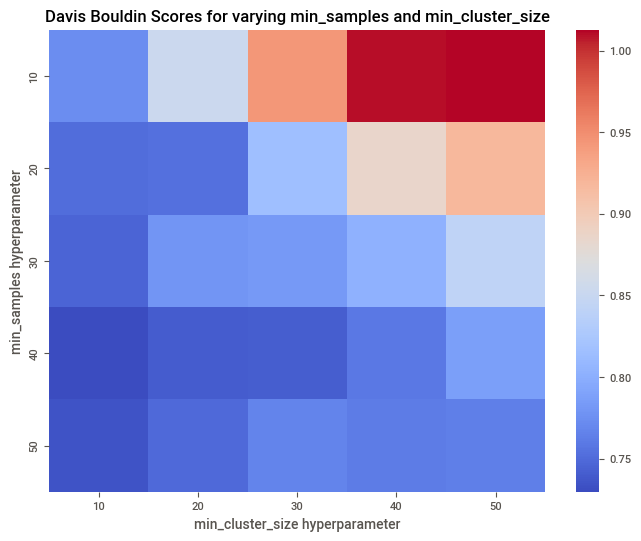



Calinski Harabasz Plot (Higher is better)


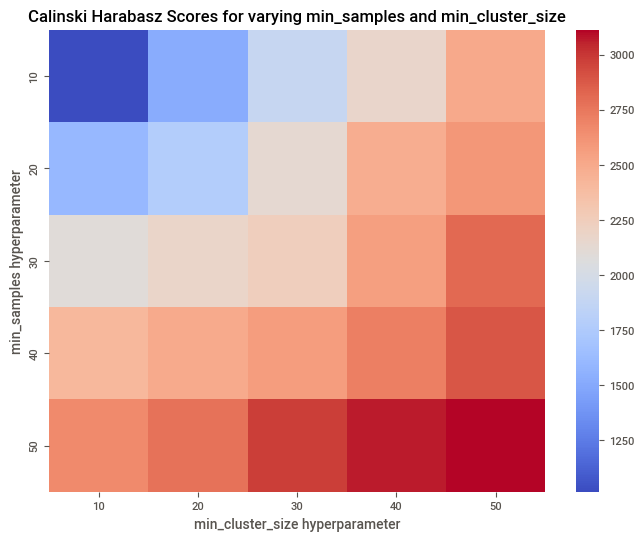

In [ ]:
min_cluster_size_range, min_samples_range, silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores = compute_hdbscan_clustering_metrics(autoencoded_df, clustering_function)
show_hdbscan_clustering_plots(silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores, clustering_function.__name__, min_cluster_size_range, min_samples_range)

**Compute and Plot Scores for UMAP Reduced Data**

Computing Metrics for min_samples=10, min_cluster_size=10
Computing Metrics for min_samples=10, min_cluster_size=20
Computing Metrics for min_samples=10, min_cluster_size=30
Computing Metrics for min_samples=10, min_cluster_size=40
Computing Metrics for min_samples=10, min_cluster_size=50
Computing Metrics for min_samples=20, min_cluster_size=10
Computing Metrics for min_samples=20, min_cluster_size=20
Computing Metrics for min_samples=20, min_cluster_size=30
Computing Metrics for min_samples=20, min_cluster_size=40
Computing Metrics for min_samples=20, min_cluster_size=50
Computing Metrics for min_samples=30, min_cluster_size=10
Computing Metrics for min_samples=30, min_cluster_size=20
Computing Metrics for min_samples=30, min_cluster_size=30
Computing Metrics for min_samples=30, min_cluster_size=40
Computing Metrics for min_samples=30, min_cluster_size=50
Computing Metrics for min_samples=40, min_cluster_size=10
Computing Metrics for min_samples=40, min_cluster_size=20
Computing Metr

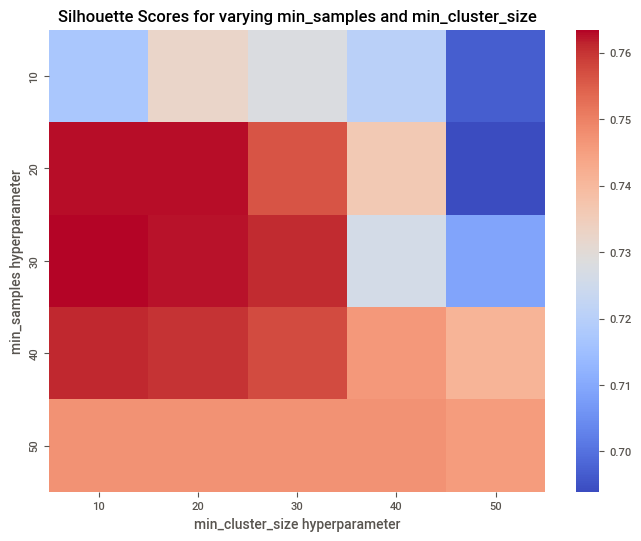



Davies Bouldin Plot (Lower is better)


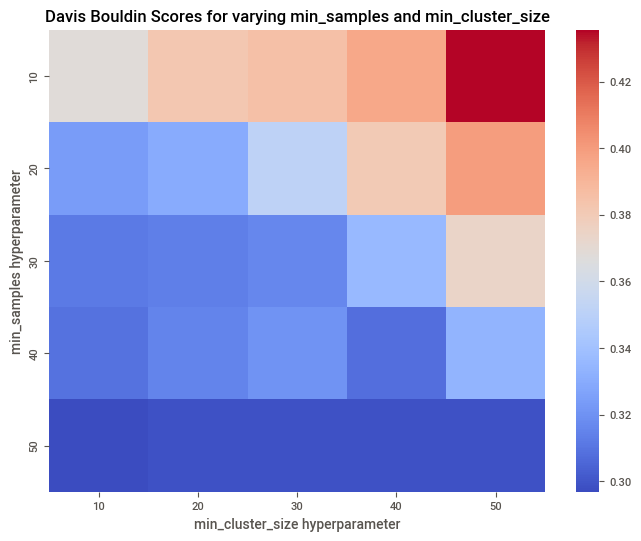



Calinski Harabasz Plot (Higher is better)


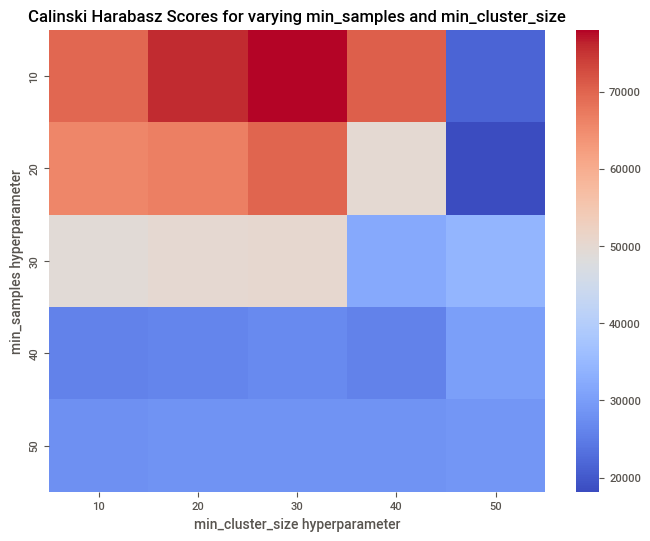

In [ ]:
min_cluster_size_range, min_samples_range, silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores = compute_hdbscan_clustering_metrics(umap_reduced_df, clustering_function)
show_hdbscan_clustering_plots(silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores, clustering_function.__name__, min_cluster_size_range, min_samples_range)

# **Conclusions from HDBScan Analysis**

Autoencoded Data:
* min_samples=30 and min_cluster_size=50 has max peak silhouette, low davies bouldin, and high calinski harabasz scores

UMAP Reduced Data:
* min_samples=20 and min_cluster_size=10 has high silhouette, low davies bouldin, and max peak calinski harabasz scores

Final Selection: min_samples=20 and min_cluster_size=10 with UMAP because UMAP has higher silhouette (0.76 vs. 0.48), lower davies bouldin (0.32 vs. 0.75) and higher calinski harabasz scores (70,000 vs. 3000)

# **Create Models with Chosen Hyperparameters**

In [ ]:
kmeans_model, kmeans_labels = kmeans_clustering(umap_reduced_df, n_clusters=15)
hierarchical_model, hierarchical_labels = hierarchical_clustering(umap_reduced_df, n_clusters=14)
birch_model, birch_labels = birch_clustering(umap_reduced_df, n_clusters=19)
meanshift_model, meanshift_labels = meanshift_clustering(umap_reduced_df, n_clusters=15)
dbscan_model, dbscan_labels = dbscan_clustering(umap_reduced_df, min_samples=50, eps=0.1)
hdbscan_model, hdbscan_labels = hdbscan_clustering(umap_reduced_df, min_samples=20, min_cluster_size=10, prediction_data=True)

In [ ]:
labels_by_style = {}

for idx, row in df.iterrows():
    style = row['style']
    label = hdbscan_labels[idx]

    if style not in labels_by_style:
        labels_by_style[style] = {}

    if label not in labels_by_style[style]:
        labels_by_style[style][label] = []

    labels_by_style[style][label].append(idx)


result = {}

for style, labels in labels_by_style.items():
    print(style)
    for label, label_list in labels.items():
        if label not in result:
            result[label] = {}

        if style not in result[label]:
            result[label][style] = {}

        result[label][style] = len(label_list)
        # print(f"Label: {label}, count: {len(label_list)}")

for label_det in result.items():
    print(label_det)

CONDOS
SINGLE_FAMILY
APARTMENT
DUPLEX_TRIPLEX
TOWNHOMES
OTHER
MOBILE
COOP
MULTI_FAMILY
CONDO_TOWNHOME
(11, {'CONDOS': 98})
(-1, {'CONDOS': 62, 'SINGLE_FAMILY': 249, 'APARTMENT': 1631, 'DUPLEX_TRIPLEX': 33, 'TOWNHOMES': 67, 'OTHER': 20, 'MOBILE': 1, 'COOP': 6, 'CONDO_TOWNHOME': 3})
(8, {'CONDOS': 240})
(35, {'CONDOS': 37})
(12, {'CONDOS': 53})
(18, {'CONDOS': 179})
(19, {'CONDOS': 156})
(36, {'CONDOS': 119})
(179, {'CONDOS': 78})
(32, {'CONDOS': 156})
(68, {'CONDOS': 81})
(56, {'CONDOS': 7, 'APARTMENT': 52, 'TOWNHOMES': 2, 'OTHER': 1})
(112, {'CONDOS': 58, 'APARTMENT': 3})
(115, {'CONDOS': 61})
(1, {'CONDOS': 2, 'APARTMENT': 42})
(46, {'CONDOS': 206})
(49, {'CONDOS': 27})
(95, {'CONDOS': 31})
(45, {'CONDOS': 22})
(67, {'CONDOS': 57})
(118, {'CONDOS': 34})
(138, {'CONDOS': 2, 'APARTMENT': 33})
(38, {'CONDOS': 5, 'APARTMENT': 152, 'DUPLEX_TRIPLEX': 1, 'MOBILE': 2, 'MULTI_FAMILY': 1})
(57, {'CONDOS': 7, 'APARTMENT': 257, 'DUPLEX_TRIPLEX': 3, 'TOWNHOMES': 2, 'OTHER': 2, 'MULTI_FAMILY': 1, '

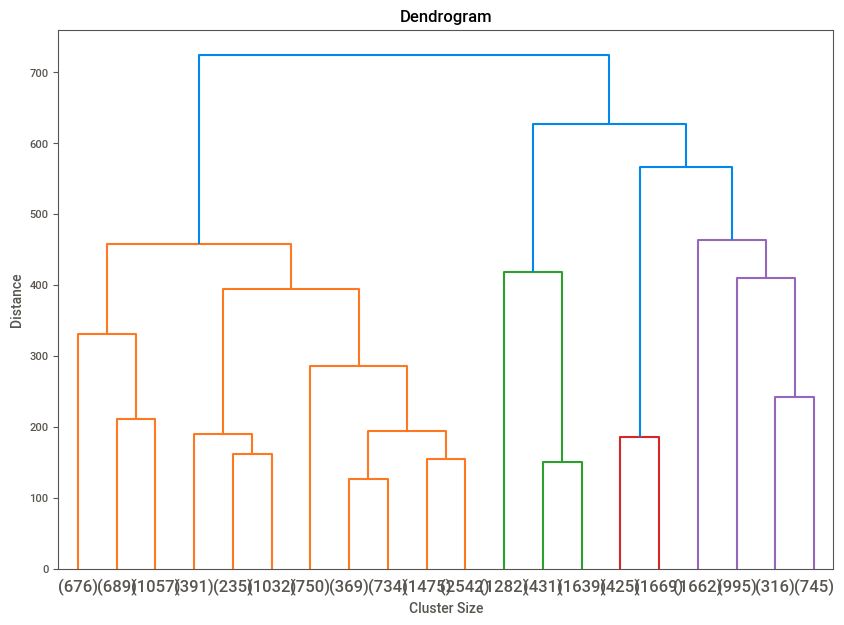

In [ ]:
plt.figure(figsize=(10, 7))
dendrogram(hierarchical_model, truncate_mode='lastp', p=20)
plt.title("Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

In [ ]:
# KMeans
# =====================================================================
kmeans_silhouette_score = silhouette_score(umap_reduced_df, kmeans_labels)
kmeans_davies_bouldin_score = davies_bouldin_score(umap_reduced_df, kmeans_labels)
kmeans_calinski_harabasz_score = calinski_harabasz_score(umap_reduced_df, kmeans_labels)

print(f"KMeans Silhouette Score: {kmeans_silhouette_score}")
print(f"KMeans Davies Bouldin Score: {kmeans_davies_bouldin_score}")
print(f"KMeans Calinski Harabasz Score: {kmeans_calinski_harabasz_score}\n")
# =====================================================================


# Hierarchical
# =====================================================================
hierarchical_silhouette_score = silhouette_score(umap_reduced_df, hierarchical_labels)
hierarchical_davies_bouldin_score = davies_bouldin_score(umap_reduced_df, hierarchical_labels)
hierarchical_calinski_harabasz_score = calinski_harabasz_score(umap_reduced_df, hierarchical_labels)

print(f"Hierarchical Silhouette Score: {hierarchical_silhouette_score}")
print(f"Hierarchical Davies Bouldin Score: {hierarchical_davies_bouldin_score}")
print(f"Hierarchical Calinski Harabasz Score: {hierarchical_calinski_harabasz_score}\n")
# =====================================================================


# Birch
# =====================================================================
birch_silhouette_score = silhouette_score(umap_reduced_df, birch_labels)
birch_davies_bouldin_score = davies_bouldin_score(umap_reduced_df, birch_labels)
birch_calinski_harabasz_score = calinski_harabasz_score(umap_reduced_df, birch_labels)

print(f"Birch Silhouette Score: {birch_silhouette_score}")
print(f"Birch Davies Bouldin Score: {birch_davies_bouldin_score}")
print(f"Birch Calinski Harabasz Score: {birch_calinski_harabasz_score}\n")
# =====================================================================


# Meanshift
# =====================================================================
meanshift_silhouette_score = silhouette_score(umap_reduced_df, meanshift_labels)
meanshift_davies_bouldin_score = davies_bouldin_score(umap_reduced_df, meanshift_labels)
meanshift_calinski_harabasz_score = calinski_harabasz_score(umap_reduced_df, meanshift_labels)

print(f"Meanshift Silhouette Score: {meanshift_silhouette_score}")
print(f"Meanshift Davies Bouldin Score: {meanshift_davies_bouldin_score}")
print(f"Meanshift Calinski Harabasz Score: {meanshift_calinski_harabasz_score}\n")
# =====================================================================


# DBScan
# =====================================================================
valid_dbscan_labels = dbscan_labels != -1 # -1 is noise point
dbscan_silhouette_score = silhouette_score(umap_reduced_df[valid_dbscan_labels], dbscan_labels[valid_dbscan_labels])
dbscan_davies_bouldin_score = davies_bouldin_score(umap_reduced_df[valid_dbscan_labels], dbscan_labels[valid_dbscan_labels])
dbscan_calinski_harabasz_score = calinski_harabasz_score(umap_reduced_df[valid_dbscan_labels], dbscan_labels[valid_dbscan_labels])

print(f"DBScan Silhouette Score: {dbscan_silhouette_score}")
print(f"DBScan Davies Bouldin Score: {dbscan_davies_bouldin_score}")
print(f"DBScan Calinski Harabasz Score: {dbscan_calinski_harabasz_score}\n")
# =====================================================================

# HDBScan
# =====================================================================
valid_hdbscan_labels = hdbscan_labels != -1 # -1 is noise point
hdbscan_silhouette_score = silhouette_score(umap_reduced_df[valid_hdbscan_labels], hdbscan_labels[valid_hdbscan_labels])
hdbscan_davies_bouldin_score = davies_bouldin_score(umap_reduced_df[valid_hdbscan_labels], hdbscan_labels[valid_hdbscan_labels])
hdbscan_calinski_harabasz_score = calinski_harabasz_score(umap_reduced_df[valid_hdbscan_labels], hdbscan_labels[valid_hdbscan_labels])

print(f"HDBScan Silhouette Score: {hdbscan_silhouette_score}")
print(f"HDBScan Davies Bouldin Score: {hdbscan_davies_bouldin_score}")
print(f"HDBScan Calinski Harabasz Score: {hdbscan_calinski_harabasz_score}\n")
# =====================================================================

KMeans Silhouette Score: 0.5581706166267395
KMeans Davies Bouldin Score: 0.7075456560187127
KMeans Calinski Harabasz Score: 9588.820645494508

Hierarchical Silhouette Score: 0.5628666281700134
Hierarchical Davies Bouldin Score: 0.7351257664818753
Hierarchical Calinski Harabasz Score: 9621.420972684742

Birch Silhouette Score: 0.5769021511077881
Birch Davies Bouldin Score: 0.6632453582261539
Birch Calinski Harabasz Score: 11253.506997766957

Meanshift Silhouette Score: 0.5427340269088745
Meanshift Davies Bouldin Score: 0.7872911032522771
Meanshift Calinski Harabasz Score: 8446.639988794064

DBScan Silhouette Score: 0.9738858938217163
DBScan Davies Bouldin Score: 0.035011313525149336
DBScan Calinski Harabasz Score: 869732.2494710565

HDBScan Silhouette Score: 0.7627273797988892
HDBScan Davies Bouldin Score: 0.323617625840623
HDBScan Calinski Harabasz Score: 65703.30727987793



In [ ]:
print(f"Num KMeans clusters: {len(np.unique(kmeans_labels))}")
print(f"Num Hierarchical clusters: {len(np.unique(hierarchical_labels))}")
print(f"Num Birch clusters: {len(np.unique(birch_labels))}")
print(f"Num Meanshift clusters: {len(np.unique(meanshift_labels))}")
print(f"Num DBSCAN clusters: {len(np.unique(dbscan_labels[valid_dbscan_labels]))}")
print(f"Num HDBSCAN clusters: {len(np.unique(hdbscan_labels[valid_hdbscan_labels]))}")

Num KMeans clusters: 15
Num Hierarchical clusters: 14
Num Birch clusters: 19
Num Meanshift clusters: 15
Num DBSCAN clusters: 17
Num HDBSCAN clusters: 206


DBSCAN has significantly better internal metrics, but only because it found almost all data points to be noise.

HDBSCAN has the next best internal metrics and doesn't label so much noise.

In [ ]:
print(f"Num DBSCAN noise points: {len(dbscan_labels) - len(dbscan_labels[valid_dbscan_labels])}")
print(f"Num DBSCAN noise points: {len(hdbscan_labels) - len(hdbscan_labels[valid_hdbscan_labels])}")
print(f"Total data points: {len(hdbscan_labels)}")

Num DBSCAN noise points: 18100
Num DBSCAN noise points: 2072
Total data points: 19114


# **Conclusions from Final Analysis**

HDBSCAN has the best internal metrics:

*   Silhouette Score: 0.7627273797988892
*   Davies Bouldin Score: 0.323617625840623
*   Calinski Harabasz Score: 65703.30727987793

# K-Fold Experimentation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster
import numpy as np
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
silhouette_scores = []
for train_index, test_index in kf.split(umap_reduced_df):
    train_data, test_data = umap_reduced_df.iloc[train_index], umap_reduced_df.iloc[test_index]
    f_fold_kmeans_model, k_fold_kmeans_labels = kmeans_clustering(train_data, n_clusters=15)
    train_data_array = train_data.values
    centroids = np.array([train_data_array[k_fold_kmeans_labels == c].mean(axis=0) for c in np.unique(k_fold_kmeans_labels)])
    test_labels = np.argmin(np.linalg.norm(test_data.values[:, None] - centroids[None, :], axis=2), axis=1) + 1
    if len(np.unique(test_labels)) > 1:
        print(silhouette_score(test_data, test_labels))
        silhouette_scores.append(silhouette_score(test_data, test_labels))
    else:
        print("Skipping silhouette score computation due to only one cluster.")
mean_silhouette = np.mean(silhouette_scores) if silhouette_scores else None
print(f"Mean Silhouette Score: {mean_silhouette}" if mean_silhouette else "No valid silhouette score.")

0.4639026
0.49918705
0.5091016
0.49799776
0.4737843
Mean Silhouette Score: 0.4887946546077728


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster
import numpy as np
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
silhouette_scores = []
for train_index, test_index in kf.split(umap_reduced_df):
    train_data, test_data = umap_reduced_df.iloc[train_index], umap_reduced_df.iloc[test_index]
    linkage_matrix = linkage(train_data, method='ward')
    n_clusters = 14
    train_labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')
    train_data_array = train_data.values
    centroids = np.array([train_data_array[train_labels == c].mean(axis=0) for c in np.unique(train_labels)])
    test_labels = np.argmin(np.linalg.norm(test_data.values[:, None] - centroids[None, :], axis=2), axis=1) + 1
    if len(np.unique(test_labels)) > 1:
        print(silhouette_score(test_data, test_labels))
        silhouette_scores.append(silhouette_score(test_data, test_labels))
    else:
        print("Skipping silhouette score computation due to only one cluster.")
mean_silhouette = np.mean(silhouette_scores) if silhouette_scores else None
print(f"Mean Silhouette Score: {mean_silhouette}" if mean_silhouette else "No valid silhouette score.")

0.56624466
0.5633252
0.589557
0.558923
0.56252974
Mean Silhouette Score: 0.5681159496307373


# Save Model to Disk

In [ ]:
%%writefile predictor.py

class Predictor:
    def __init__(self, umap_reducer, trained_model):
        self.umap_reducer = umap_reducer
        self.trained_model = trained_model

Overwriting predictor.py


In [ ]:
import pickle

from predictor import Predictor

predictor = Predictor(umap_reducer, kmeans_model)

PREDICTOR_FILENAME = "clustering_predictor.pkl"

# Save model to disk in pickled format
with open(PREDICTOR_FILENAME, "wb") as f:
    pickle.dump(predictor, f)

# Upload Model to AWS s3 Storage

In [ ]:
from getpass import getpass

AWS_ACCESS_KEY_ID = getpass()
AWS_SECRET_ACCESS_KEY = getpass()
AWS_DEFAULT_REGION = "us-east-1"

··········
··········


In [ ]:
import boto3

BUCKET_NAME = "rentalrecommender"

s3 = boto3.client(
         's3',
         aws_access_key_id=AWS_ACCESS_KEY_ID,
         aws_secret_access_key=AWS_SECRET_ACCESS_KEY,
         region_name=AWS_DEFAULT_REGION,
     )

try:
    s3.upload_file(PREDICTOR_FILENAME, BUCKET_NAME, PREDICTOR_FILENAME)
    print(f"File {PREDICTOR_FILENAME} uploaded to {BUCKET_NAME}/{PREDICTOR_FILENAME}")
except Exception as e:
    print(f"Error uploading file: {e}")

File clustering_predictor.pkl uploaded to rentalrecommender/clustering_predictor.pkl
